In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import Asso, AssoTrans, AssoOpt, AssoExIterate
import pandas as pd
from utils import show_matrix

### Generate Boolean matrix

In [2]:
# generate arbitrary Boolean matrix (X)
from generators import BlockDiagonalMatrixGenerator, BlockMatrixGenerator

n_row=1000
n_col=500
k=5
overlap_flag=True
noise=[0.5, 0.2]
size_range=[0.25, 0.75, 0.25, 1.0]

X = BlockMatrixGenerator(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
X.generate(seed=1234) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
# X.show_matrix(scaling=0.2, title='arbitrary boolean matrix X')

[I] m            : 1000
[I] n            : 500
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 1234
[I] noise        : [0.5 0.2]
[I] seed         : 1024
[I] Using RandomState.


### Load MovieLens data

[<943x1682 sparse matrix of type '<class 'numpy.int32'>'
 	with 100000 stored elements in Compressed Sparse Row format>,
 <943x81 sparse matrix of type '<class 'numpy.float64'>'
 	with 3499 stored elements in Compressed Sparse Row format>,
 <26x1682 sparse matrix of type '<class 'numpy.float64'>'
 	with 4031 stored elements in Compressed Sparse Row format>,
 <4708x1682 sparse matrix of type '<class 'numpy.float64'>'
 	with 8306 stored elements in Compressed Sparse Row format>]

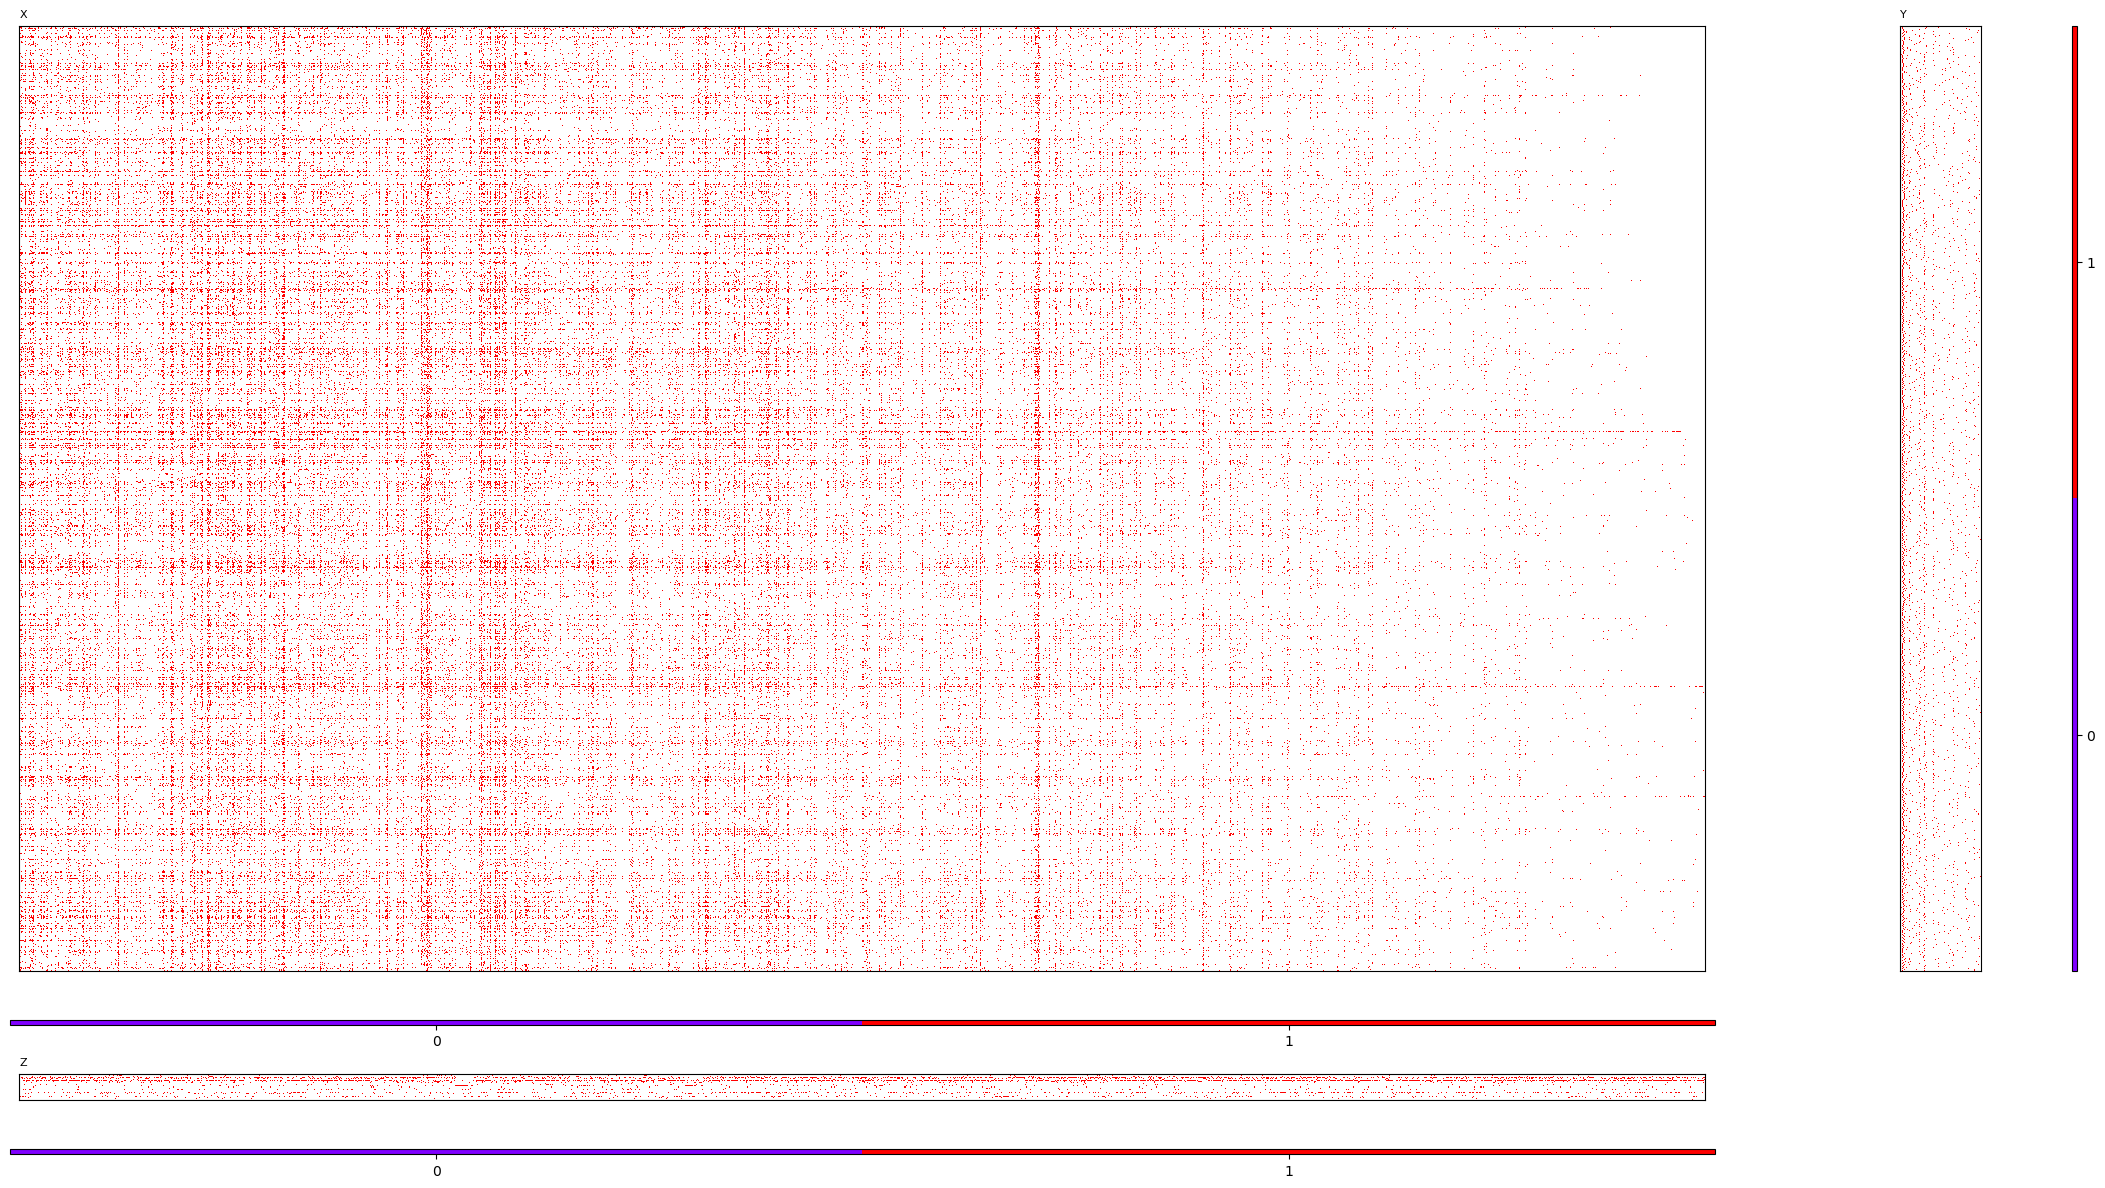

In [2]:
from datasets import MovieLensData, MovieLensGenreCastUserData

data = MovieLensGenreCastUserData(size='100k')

data.load()

# data.sample(factor_id=0, n_samples=100)
# data.sample(factor_id=1, n_samples=100)

display(data.Xs)

X, Y, Z, _ = data.Xs

show_matrix([(X, [0, 0], 'X'), 
             (Y, [0, 1], 'Y'), 
             (Z, [1, 0], 'Z'), 
             ], colorbar=True, keep_nan=True, discrete=True, center=True, clim=[0, 1])

In [3]:
from datasets import NoSplit, RatioSplit

split = RatioSplit(X=X, val_size=0.1, test_size=0.2, seed=1000)
split.negative_sample(train_size=split.pos_train_size, 
                      val_size=split.pos_val_size, 
                      test_size=split.pos_test_size, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] RatioSplit, sampling positives
[I]   seed         : 1000
[I]   train_size   : 70000
[I]   val_size     : 10000
[I]   test_size    : 20000
[I]   seed         : 1000
[I] RatioSplit, sampling negatives
[I]   all_negatives: 1486126
[I]   n_negatives  : 100000
[I]   train_size   : 70000
[I]   val_size     : 10000
[I]   test_size    : 20000
[I]   seed         : 1000


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


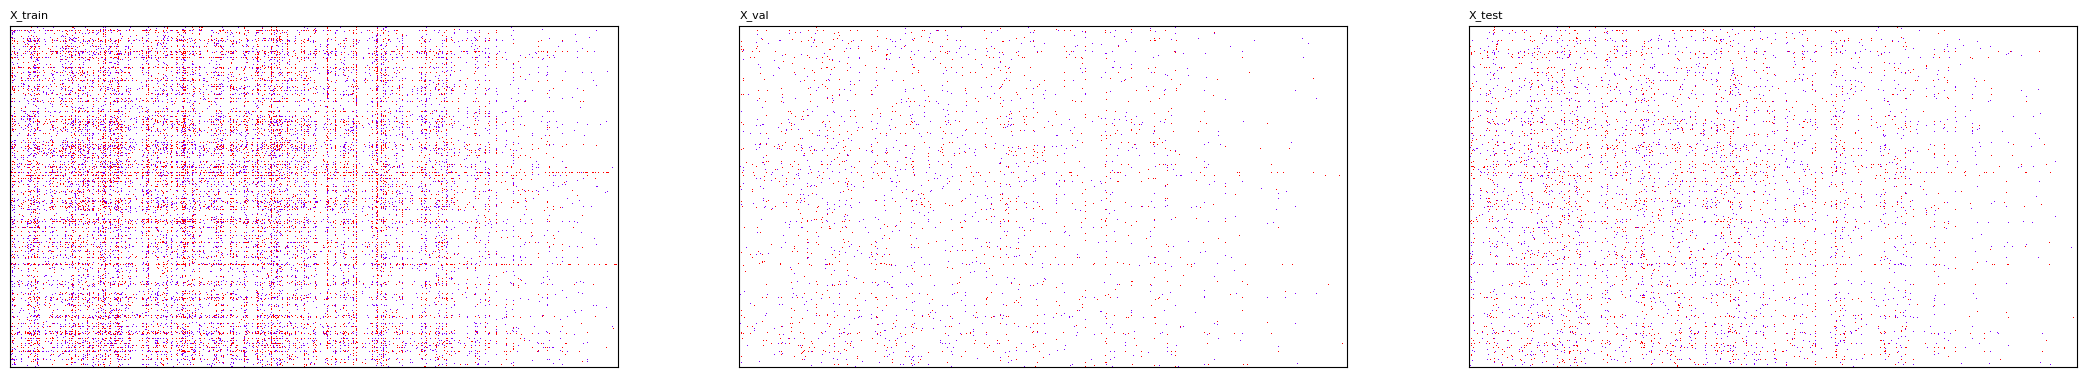

In [4]:
show_matrix(settings=[(X_train, [0, 0], 'X_train'), 
                      (X_val, [0, 1], 'X_val'), 
                      (X_test, [0, 2], 'X_test'), 
                      ], keep_nan=True, clim=[0, 1], discrete=True, center=True)

# Asso

In [12]:
k = 5
tau = 0.05
w = 0.25

asso = Asso(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, task='prediction', verbose=True, display=False)

[I] k            : 5
[I] verbose      : False
[I] display      : False
[I] tau          : 0.05
[I] weights      : [0.75, 0.25]
[I] verbose      : True
[I] task         : prediction


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60719.75it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 02:38:41       4026.0  0.242814   0.658875   0.55855  0.354855

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59611.80it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 02:38:44       4026.0  0.2375    0.65122   0.55515  0.348062

[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59493.63it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 02:38:41       4026.0  0.242814   0.658875  0.558550  0.354855
1  28/01/24 02:40:00       4728.5  0.292043   0.665549  0.572643  0.405953

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 55782.59it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 02:38:44       4026.0  0.2375   0.651220   0.55515  0.348062
1  28/01/24 02:40:03       4728.5  0.2777   0.653719   0.56530  0.389809

[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59357.23it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 02:38:41       4026.0  0.242814   0.658875  0.558550  0.354855
1  28/01/24 02:40:00       4728.5  0.292043   0.665549  0.572643  0.405953
2  28/01/24 02:41:23       5130.5  0.317543   0.671926  0.581250  0.431272

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 60631.61it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 02:38:44       4026.0  0.2375   0.651220   0.55515  0.348062
1  28/01/24 02:40:03       4728.5  0.2777   0.653719   0.56530  0.389809
2  28/01/24 02:41:25       5130.5  0.2996   0.657306   0.57170  0.411595

[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60355.79it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 02:38:41       4026.0  0.242814   0.658875  0.558550  0.354855
1  28/01/24 02:40:00       4728.5  0.292043   0.665549  0.572643  0.405953
2  28/01/24 02:41:23       5130.5  0.317543   0.671926  0.581250  0.431272
3  28/01/24 02:42:46       5481.5  0.338157   0.679069  0.589171  0.451487

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58687.16it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 02:38:44       4026.0  0.2375   0.651220   0.55515  0.348062
1  28/01/24 02:40:03       4728.5  0.2777   0.653719   0.56530  0.389809
2  28/01/24 02:41:25       5130.5  0.2996   0.657306   0.57170  0.411595
3  28/01/24 02:42:48       5481.5  0.3174   0.663462   0.57820  0.429383

[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59774.55it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 02:38:41       4026.0  0.242814   0.658875  0.558550  0.354855
1  28/01/24 02:40:00       4728.5  0.292043   0.665549  0.572643  0.405953
2  28/01/24 02:41:23       5130.5  0.317543   0.671926  0.581250  0.431272
3  28/01/24 02:42:46       5481.5  0.338157   0.679069  0.589171  0.451487
4  28/01/24 02:44:06       5805.0  0.346371   0.683332  0.592929  0.459718

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 60094.79it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 02:38:44       4026.0  0.2375   0.651220   0.55515  0.348062
1  28/01/24 02:40:03       4728.5  0.2777   0.653719   0.56530  0.389809
2  28/01/24 02:41:25       5130.5  0.2996   0.657306   0.57170  0.411595
3  28/01/24 02:42:48       5481.5  0.3174   0.663462   0.57820  0.429383
4  28/01/24 02:44:08       5805.0  0.3197   0.664243   0.57905  0.431648

100%|██████████| 5/5 [06:37<00:00, 79.54s/it]


In [13]:
# empty table
from utils import add_log

# metrics from sklearn is included for checking
metrics = ['Recall', 'Precision', 'Accuracy', 'F1', 
           'recall_score', 'precision_score', 'accuracy_score', 'f1_score']
columns = ['time', 'k', 'tau', 'p_pos', 'p_neg', 'X_train_cover'] + metrics
# df_prediction = pd.DataFrame(columns=columns)
df_reconstruction = pd.DataFrame(columns=columns)

results = asso.eval(X_val, metrics=metrics, task='prediction')
add_log(df_reconstruction, [pd.Timestamp.now(), k, tau, asso.w[0], asso.w[1], asso.cover()] + results, verbose=True)

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58679.73it/s]


time  k   tau  p_pos  p_neg  X_train_cover  Recall  \
0 2024-01-28 02:44:09.657910  5  0.05   0.75   0.25         5805.0  0.3197   

   Precision  Accuracy        F1  recall_score  precision_score  \
0   0.664243   0.57905  0.431648        0.3197         0.664243   

   accuracy_score  f1_score  
0         0.57905  0.431648

In [14]:
results = asso.eval(X_train, metrics=metrics, task='prediction')
add_log(df_reconstruction, [pd.Timestamp.now(), k, tau, asso.w[0], asso.w[1], asso.cover()] + results, verbose=True)

[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 58988.49it/s]


time  k   tau  p_pos  p_neg  X_train_cover    Recall  \
0 2024-01-28 02:44:09.657910  5  0.05   0.75   0.25         5805.0  0.319700   
1 2024-01-28 02:44:12.362655  5  0.05   0.75   0.25         5805.0  0.346371   

   Precision  Accuracy        F1  recall_score  precision_score  \
0   0.664243  0.579050  0.431648      0.319700         0.664243   
1   0.683332  0.592929  0.459718      0.346371         0.683332   

   accuracy_score  f1_score  
0        0.579050  0.431648  
1        0.592929  0.459718

In [15]:
results = asso.eval(X_test, metrics=metrics, task='prediction')
add_log(df_reconstruction, [pd.Timestamp.now(), k, tau, asso.w[0], asso.w[1], asso.cover()] + results, verbose=True)

[I] Making predictions: 100%|██████████| 40000/40000 [00:00<00:00, 60539.18it/s]


time  k   tau  p_pos  p_neg  X_train_cover    Recall  \
0 2024-01-28 02:44:09.657910  5  0.05   0.75   0.25         5805.0  0.319700   
1 2024-01-28 02:44:12.362655  5  0.05   0.75   0.25         5805.0  0.346371   
2 2024-01-28 02:44:13.229245  5  0.05   0.75   0.25         5805.0  0.319850   

   Precision  Accuracy        F1  recall_score  precision_score  \
0   0.664243  0.579050  0.431648      0.319700         0.664243   
1   0.683332  0.592929  0.459718      0.346371         0.683332   
2   0.666424  0.579875  0.432244      0.319850         0.666424   

   accuracy_score  f1_score  
0        0.579050  0.431648  
1        0.592929  0.459718  
2        0.579875  0.432244

In [16]:
from utils import matmul, fill_nan

U, V = asso.U, asso.V
X_pd = matmul(U, V.T, sparse=True, boolean=True)

X_train_pd = fill_nan(X_pd, X_train)
X_val_pd = fill_nan(X_pd, X_val)
X_test_pd = fill_nan(X_pd, X_test)

rng = [200, 200]
settings = [(X_train[:rng[0], :rng[1]],     [0, 0], 'X_train'), 
            (X_train_pd[:rng[0], :rng[1]],  [0, 1], 'X_train_pd'), 
            (X_val[:rng[0], :rng[1]],       [1, 0], 'X_val'), 
            (X_val_pd[:rng[0], :rng[1]],    [1, 1], 'X_val_pd'), 
            (X_test[:rng[0], :rng[1]],      [2, 0], 'X_test'), 
            (X_test_pd[:rng[0], :rng[1]],   [2, 1], 'X_test_pd'), 
            (X_pd[:rng[0], :rng[1]],        [1, 2], 'X_pd'), 
            ]

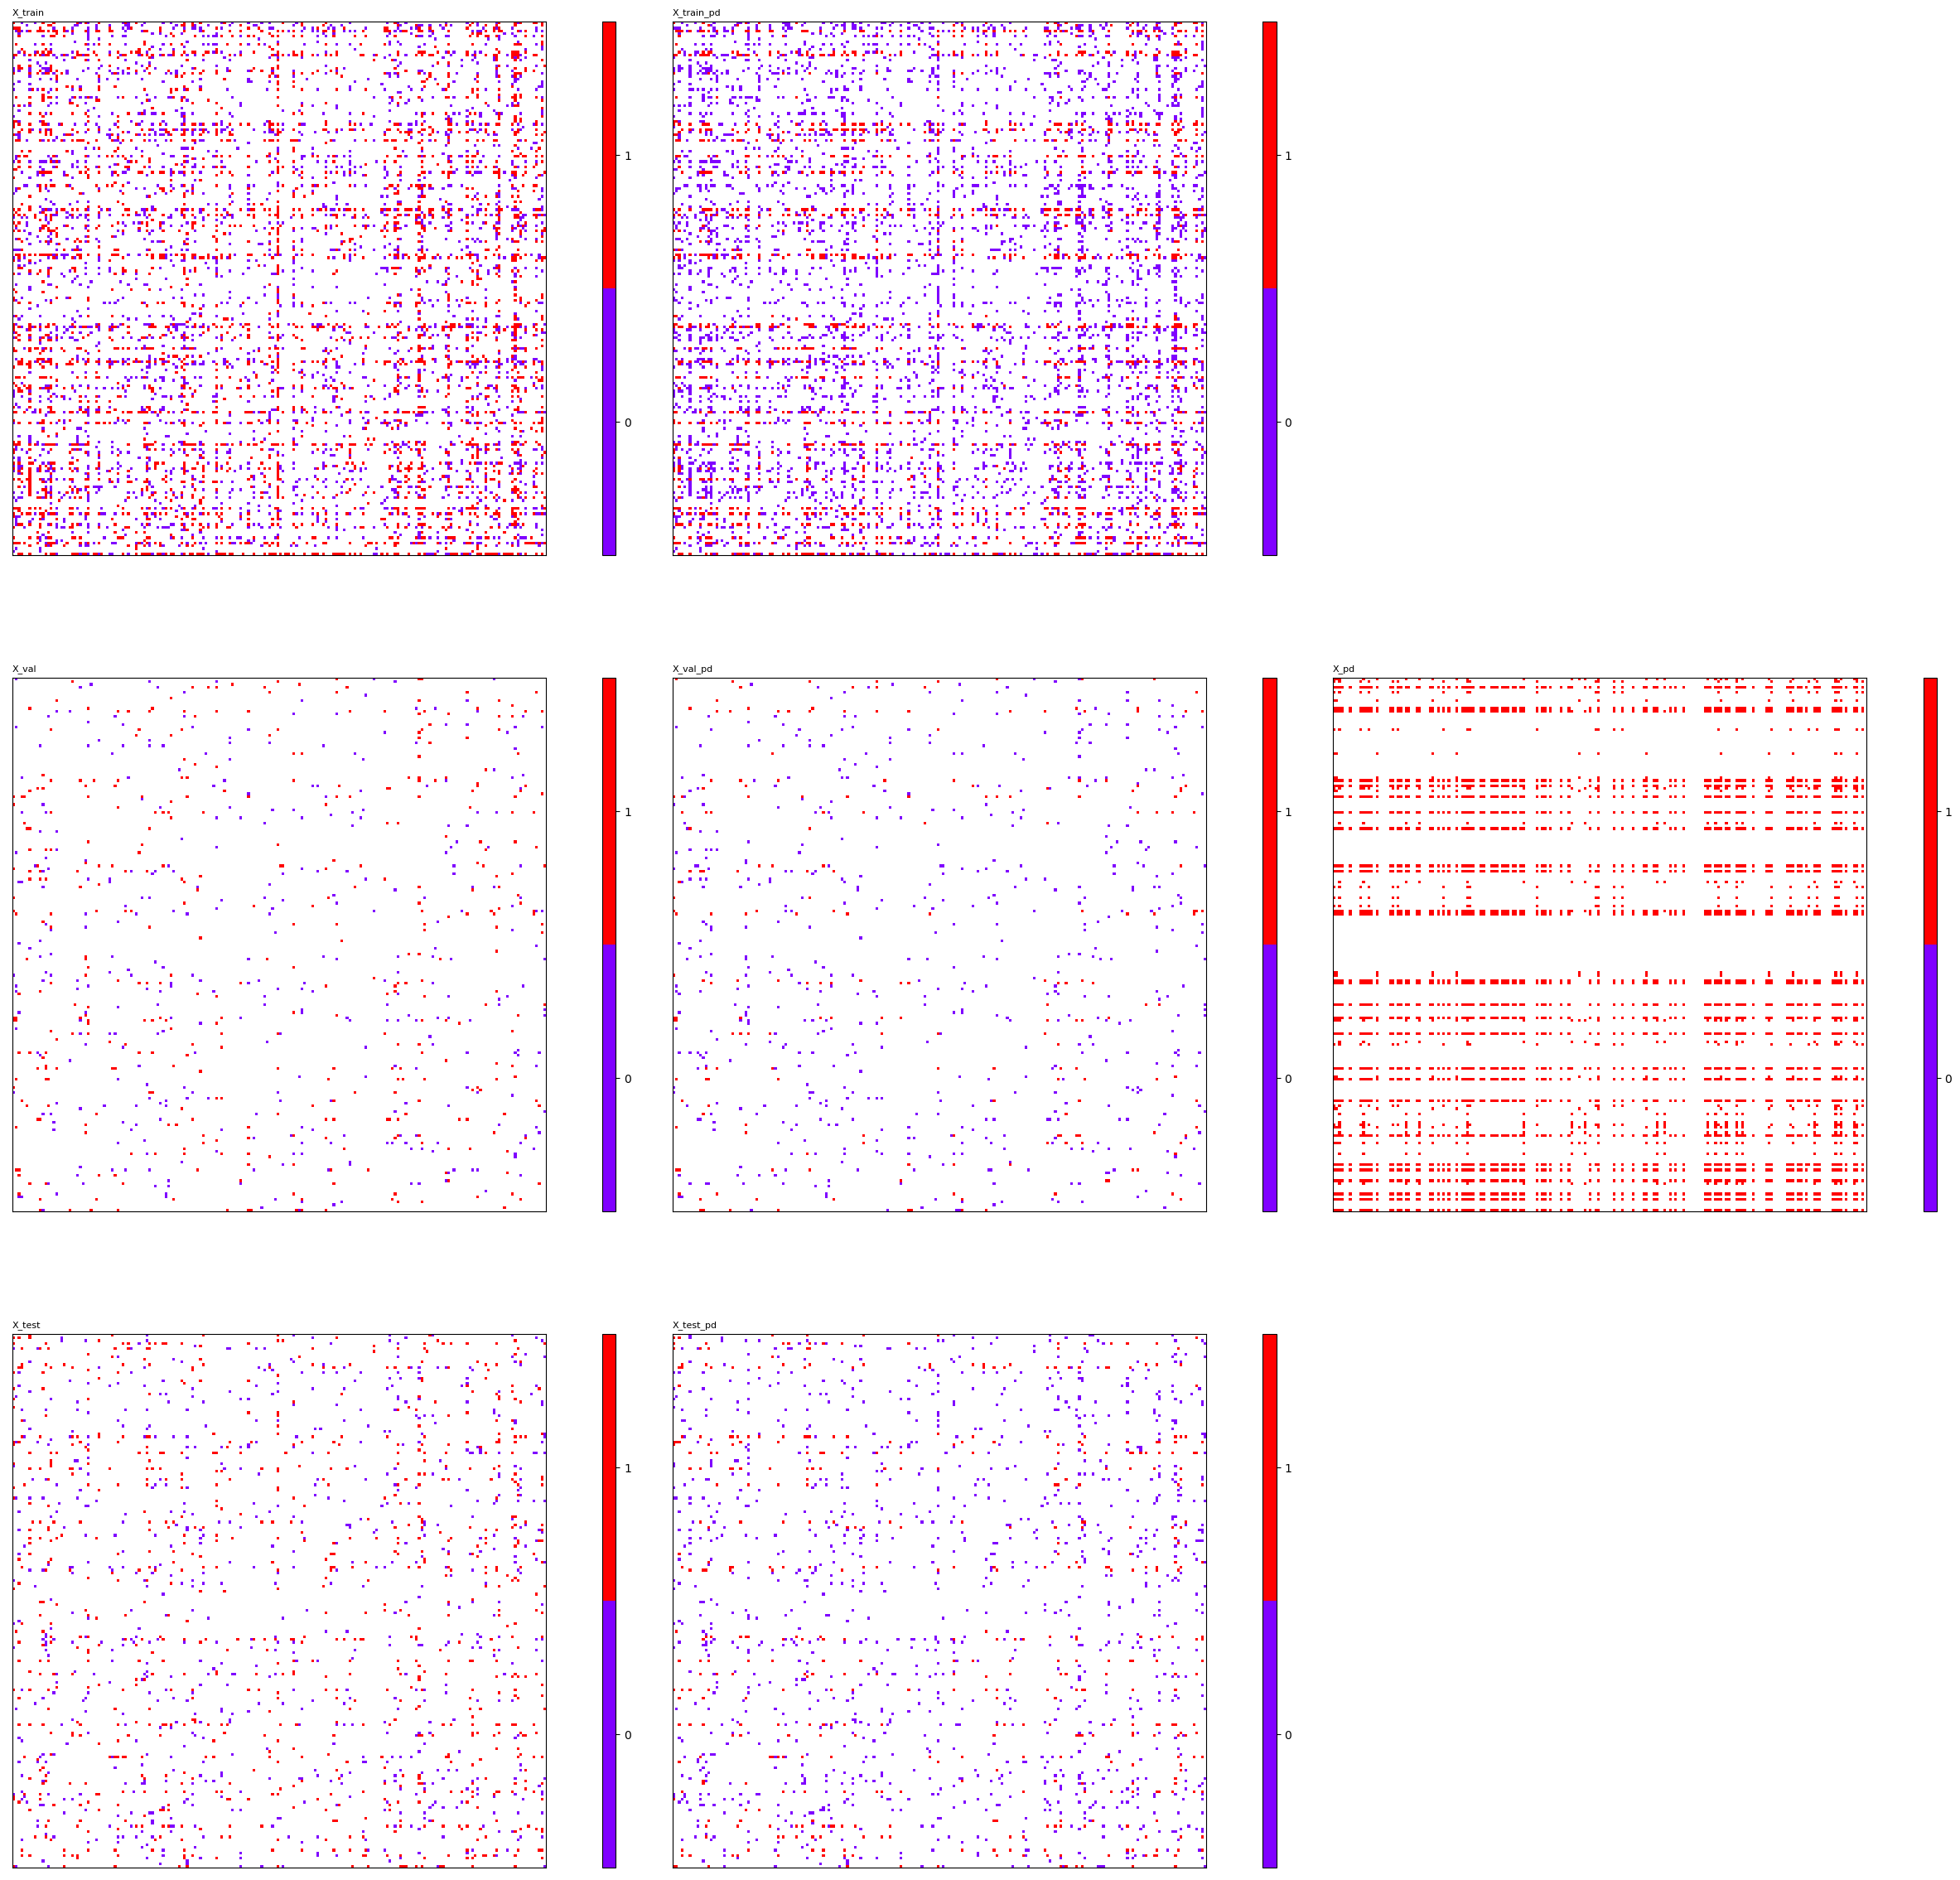

In [17]:
show_matrix(settings=settings, keep_nan=True, scaling=2, 
            clim=[0, 1], colorbar=True, discrete=True, center=True)

# AssoExIterative

0.05, 0.25

In [18]:
k = 5
tau = 0.05
w = 0.25

asso = AssoExIterate(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, task='prediction', display=False, verbose=True)

[I] k            : 5
[I] verbose      : False
[I] display      : False
[I] tau          : 0.05
[I] weights      : [0.75, 0.25]
[I] verbose      : True
[I] task         : prediction


k = 1 updated cols: 0 -> 4026.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 58231.44it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 02:45:32       4026.0  0.242814   0.658875   0.55855  0.354855

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58234.08it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 02:45:35       4026.0  0.2375    0.65122   0.55515  0.348062

k = 1 updated rows: 4026.0 -> 6422.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60672.36it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 02:45:32      4026.00  0.242814   0.658875  0.558550  0.354855
1  28/01/24 02:46:06      6422.75  0.255114   0.719529  0.577836  0.376676

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59704.50it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 02:45:35      4026.00  0.2375    0.65122   0.55515  0.348062
1  28/01/24 02:46:09      6422.75  0.2473    0.71186   0.57360  0.367077

k = 1 updated cols: 6422.75 -> 6915.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 51710.92it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 02:45:32      4026.00  0.242814   0.658875  0.558550  0.354855
1  28/01/24 02:46:06      6422.75  0.255114   0.719529  0.577836  0.376676
2  28/01/24 02:47:08      6915.75  0.281957   0.716745  0.585264  0.404708

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 54093.14it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 02:45:35      4026.00  0.2375   0.651220   0.55515  0.348062
1  28/01/24 02:46:09      6422.75  0.2473   0.711860   0.57360  0.367077
2  28/01/24 02:47:10      6915.75  0.2713   0.707432   0.57955  0.392194

k = 1 updated rows: 6915.75 -> 6932.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 54761.35it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 02:45:32      4026.00  0.242814   0.658875  0.558550  0.354855
1  28/01/24 02:46:06      6422.75  0.255114   0.719529  0.577836  0.376676
2  28/01/24 02:47:08      6915.75  0.281957   0.716745  0.585264  0.404708
3  28/01/24 02:47:57      6932.25  0.284071   0.715262  0.585493  0.406642

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 51916.42it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 02:45:35      4026.00  0.2375   0.651220   0.55515  0.348062
1  28/01/24 02:46:09      6422.75  0.2473   0.711860   0.57360  0.367077
2  28/01/24 02:47:10      6915.75  0.2713   0.707432   0.57955  0.392194
3  28/01/24 02:47:59      6932.25  0.2735   0.705442   0.57965  0.394177

k = 1 updated cols: 6932.25 -> 6933.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 56159.87it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 02:45:32      4026.00  0.242814   0.658875  0.558550  0.354855
1  28/01/24 02:46:06      6422.75  0.255114   0.719529  0.577836  0.376676
2  28/01/24 02:47:08      6915.75  0.281957   0.716745  0.585264  0.404708
3  28/01/24 02:47:57      6932.25  0.284071   0.715262  0.585493  0.406642
4  28/01/24 02:48:51      6933.75  0.282686   0.715893  0.585250  0.405322

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 50282.37it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 02:45:35      4026.00  0.2375   0.651220   0.55515  0.348062
1  28/01/24 02:46:09      6422.75  0.2473   0.711860   0.57360  0.367077
2  28/01/24 02:47:10      6915.75  0.2713   0.707432   0.57955  0.392194
3  28/01/24 02:47:59      6932.25  0.2735   0.705442   0.57965  0.394177
4  28/01/24 02:48:54      6933.75  0.2715   0.705561   0.57910  0.392114

k = 1 updated rows: 6933.75 -> 6934.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60660.86it/s]


time  cover_score    Recall  Precision  Accuracy        F1
1  28/01/24 02:46:06      6422.75  0.255114   0.719529  0.577836  0.376676
2  28/01/24 02:47:08      6915.75  0.281957   0.716745  0.585264  0.404708
3  28/01/24 02:47:57      6932.25  0.284071   0.715262  0.585493  0.406642
4  28/01/24 02:48:51      6933.75  0.282686   0.715893  0.585250  0.405322
5  28/01/24 02:49:51      6934.00  0.281757   0.716549  0.585150  0.404471

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 60288.72it/s]


time  cover_score  Recall  Precision  Accuracy        F1
1  28/01/24 02:46:09      6422.75  0.2473   0.711860   0.57360  0.367077
2  28/01/24 02:47:10      6915.75  0.2713   0.707432   0.57955  0.392194
3  28/01/24 02:47:59      6932.25  0.2735   0.705442   0.57965  0.394177
4  28/01/24 02:48:54      6933.75  0.2715   0.705561   0.57910  0.392114
5  28/01/24 02:49:53      6934.00  0.2704   0.705453   0.57875  0.390949

k = 1 break_counter = 0


k = 1 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 60054.14it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 02:51:33       6934.0  0.2704   0.705453   0.57875  0.390949

k = 2 updated cols: 6934.0 -> 7763.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59721.12it/s]


time  cover_score    Recall  Precision  Accuracy        F1
2  28/01/24 02:47:08      6915.75  0.281957   0.716745  0.585264  0.404708
3  28/01/24 02:47:57      6932.25  0.284071   0.715262  0.585493  0.406642
4  28/01/24 02:48:51      6933.75  0.282686   0.715893  0.585250  0.405322
5  28/01/24 02:49:51      6934.00  0.281757   0.716549  0.585150  0.404471
6  28/01/24 02:52:16      7763.00  0.322400   0.711162  0.595729  0.443667

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 60439.05it/s]


time  cover_score  Recall  Precision  Accuracy        F1
2  28/01/24 02:47:10      6915.75  0.2713   0.707432   0.57955  0.392194
3  28/01/24 02:47:59      6932.25  0.2735   0.705442   0.57965  0.394177
4  28/01/24 02:48:54      6933.75  0.2715   0.705561   0.57910  0.392114
5  28/01/24 02:49:53      6934.00  0.2704   0.705453   0.57875  0.390949
6  28/01/24 02:52:19      7763.00  0.3071   0.697162   0.58685  0.426380

k = 2 updated rows: 7763.0 -> 7910.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60363.69it/s]


time  cover_score    Recall  Precision  Accuracy        F1
3  28/01/24 02:47:57      6932.25  0.284071   0.715262  0.585493  0.406642
4  28/01/24 02:48:51      6933.75  0.282686   0.715893  0.585250  0.405322
5  28/01/24 02:49:51      6934.00  0.281757   0.716549  0.585150  0.404471
6  28/01/24 02:52:16      7763.00  0.322400   0.711162  0.595729  0.443667
7  28/01/24 02:53:06      7910.00  0.338386   0.707138  0.599121  0.457733

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 60498.86it/s]


time  cover_score  Recall  Precision  Accuracy        F1
3  28/01/24 02:47:59      6932.25  0.2735   0.705442   0.57965  0.394177
4  28/01/24 02:48:54      6933.75  0.2715   0.705561   0.57910  0.392114
5  28/01/24 02:49:53      6934.00  0.2704   0.705453   0.57875  0.390949
6  28/01/24 02:52:19      7763.00  0.3071   0.697162   0.58685  0.426380
7  28/01/24 02:53:09      7910.00  0.3191   0.692191   0.58860  0.436824

k = 2 updated cols: 7910.0 -> 7928.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59622.63it/s]


time  cover_score    Recall  Precision  Accuracy        F1
4  28/01/24 02:48:51      6933.75  0.282686   0.715893  0.585250  0.405322
5  28/01/24 02:49:51      6934.00  0.281757   0.716549  0.585150  0.404471
6  28/01/24 02:52:16      7763.00  0.322400   0.711162  0.595729  0.443667
7  28/01/24 02:53:06      7910.00  0.338386   0.707138  0.599121  0.457733
8  28/01/24 02:53:43      7928.00  0.333900   0.709498  0.598593  0.454096

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 60405.15it/s]


time  cover_score  Recall  Precision  Accuracy        F1
4  28/01/24 02:48:54      6933.75  0.2715   0.705561   0.57910  0.392114
5  28/01/24 02:49:53      6934.00  0.2704   0.705453   0.57875  0.390949
6  28/01/24 02:52:19      7763.00  0.3071   0.697162   0.58685  0.426380
7  28/01/24 02:53:09      7910.00  0.3191   0.692191   0.58860  0.436824
8  28/01/24 02:53:46      7928.00  0.3147   0.696085   0.58865  0.433441

k = 2 updated rows: 7928.0 -> 7956.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59346.11it/s]


time  cover_score    Recall  Precision  Accuracy        F1
5  28/01/24 02:49:51       6934.0  0.281757   0.716549  0.585150  0.404471
6  28/01/24 02:52:16       7763.0  0.322400   0.711162  0.595729  0.443667
7  28/01/24 02:53:06       7910.0  0.338386   0.707138  0.599121  0.457733
8  28/01/24 02:53:43       7928.0  0.333900   0.709498  0.598593  0.454096
9  28/01/24 02:54:29       7956.0  0.339329   0.708474  0.599850  0.458875

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 60739.35it/s]


time  cover_score  Recall  Precision  Accuracy        F1
5  28/01/24 02:49:53       6934.0  0.2704   0.705453   0.57875  0.390949
6  28/01/24 02:52:19       7763.0  0.3071   0.697162   0.58685  0.426380
7  28/01/24 02:53:09       7910.0  0.3191   0.692191   0.58860  0.436824
8  28/01/24 02:53:46       7928.0  0.3147   0.696085   0.58865  0.433441
9  28/01/24 02:54:32       7956.0  0.3193   0.695491   0.58975  0.437667

k = 2 updated cols: 7956.0 -> 7976.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59953.87it/s]


time  cover_score    Recall  Precision  Accuracy        F1
6   28/01/24 02:52:16       7763.0  0.322400   0.711162  0.595729  0.443667
7   28/01/24 02:53:06       7910.0  0.338386   0.707138  0.599121  0.457733
8   28/01/24 02:53:43       7928.0  0.333900   0.709498  0.598593  0.454096
9   28/01/24 02:54:29       7956.0  0.339329   0.708474  0.599850  0.458875
10  28/01/24 02:55:11       7976.5  0.337557   0.709921  0.599814  0.457554

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58498.66it/s]


time  cover_score  Recall  Precision  Accuracy        F1
6   28/01/24 02:52:19       7763.0  0.3071   0.697162   0.58685  0.426380
7   28/01/24 02:53:09       7910.0  0.3191   0.692191   0.58860  0.436824
8   28/01/24 02:53:46       7928.0  0.3147   0.696085   0.58865  0.433441
9   28/01/24 02:54:32       7956.0  0.3193   0.695491   0.58975  0.437667
10  28/01/24 02:55:13       7976.5  0.3177   0.697628   0.59000  0.436581

k = 2 updated rows: 7976.5 -> 7995.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60400.62it/s]


time  cover_score    Recall  Precision  Accuracy        F1
7   28/01/24 02:53:06       7910.0  0.338386   0.707138  0.599121  0.457733
8   28/01/24 02:53:43       7928.0  0.333900   0.709498  0.598593  0.454096
9   28/01/24 02:54:29       7956.0  0.339329   0.708474  0.599850  0.458875
10  28/01/24 02:55:11       7976.5  0.337557   0.709921  0.599814  0.457554
11  28/01/24 02:55:56       7995.0  0.339129   0.709792  0.600236  0.458969

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 60115.25it/s]


time  cover_score  Recall  Precision  Accuracy        F1
7   28/01/24 02:53:09       7910.0  0.3191   0.692191   0.58860  0.436824
8   28/01/24 02:53:46       7928.0  0.3147   0.696085   0.58865  0.433441
9   28/01/24 02:54:32       7956.0  0.3193   0.695491   0.58975  0.437667
10  28/01/24 02:55:13       7976.5  0.3177   0.697628   0.59000  0.436581
11  28/01/24 02:55:58       7995.0  0.3187   0.696156   0.58980  0.437234

k = 2 break_counter = 0


k = 2 updated rows: 7995.0 -> 8010.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 55678.23it/s]


time  cover_score    Recall  Precision  Accuracy        F1
8   28/01/24 02:53:43       7928.0  0.333900   0.709498  0.598593  0.454096
9   28/01/24 02:54:29       7956.0  0.339329   0.708474  0.599850  0.458875
10  28/01/24 02:55:11       7976.5  0.337557   0.709921  0.599814  0.457554
11  28/01/24 02:55:56       7995.0  0.339129   0.709792  0.600236  0.458969
12  28/01/24 02:57:22       8010.0  0.341414   0.712021  0.601664  0.461527

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 54048.29it/s]


time  cover_score  Recall  Precision  Accuracy        F1
8   28/01/24 02:53:46       7928.0  0.3147   0.696085   0.58865  0.433441
9   28/01/24 02:54:32       7956.0  0.3193   0.695491   0.58975  0.437667
10  28/01/24 02:55:13       7976.5  0.3177   0.697628   0.59000  0.436581
11  28/01/24 02:55:58       7995.0  0.3187   0.696156   0.58980  0.437234
12  28/01/24 02:57:24       8010.0  0.3222   0.699674   0.59195  0.441219

k = 2 updated cols: 8010.0 -> 8011.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 57616.37it/s]


time  cover_score    Recall  Precision  Accuracy        F1
9   28/01/24 02:54:29       7956.0  0.339329   0.708474  0.599850  0.458875
10  28/01/24 02:55:11       7976.5  0.337557   0.709921  0.599814  0.457554
11  28/01/24 02:55:56       7995.0  0.339129   0.709792  0.600236  0.458969
12  28/01/24 02:57:22       8010.0  0.341414   0.712021  0.601664  0.461527
13  28/01/24 02:58:10       8011.0  0.340786   0.712302  0.601571  0.461011

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 60524.83it/s]


time  cover_score  Recall  Precision  Accuracy        F1
9   28/01/24 02:54:32       7956.0  0.3193   0.695491   0.58975  0.437667
10  28/01/24 02:55:13       7976.5  0.3177   0.697628   0.59000  0.436581
11  28/01/24 02:55:58       7995.0  0.3187   0.696156   0.58980  0.437234
12  28/01/24 02:57:24       8010.0  0.3222   0.699674   0.59195  0.441219
13  28/01/24 02:58:12       8011.0  0.3215   0.699369   0.59165  0.440501

k = 2 updated rows: 8011.0 -> 8018.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60176.78it/s]


time  cover_score    Recall  Precision  Accuracy        F1
10  28/01/24 02:55:11       7976.5  0.337557   0.709921  0.599814  0.457554
11  28/01/24 02:55:56       7995.0  0.339129   0.709792  0.600236  0.458969
12  28/01/24 02:57:22       8010.0  0.341414   0.712021  0.601664  0.461527
13  28/01/24 02:58:10       8011.0  0.340786   0.712302  0.601571  0.461011
14  28/01/24 02:58:54       8018.0  0.342929   0.709242  0.601171  0.462319

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 56479.09it/s]


time  cover_score  Recall  Precision  Accuracy        F1
10  28/01/24 02:55:13       7976.5  0.3177   0.697628   0.59000  0.436581
11  28/01/24 02:55:58       7995.0  0.3187   0.696156   0.58980  0.437234
12  28/01/24 02:57:24       8010.0  0.3222   0.699674   0.59195  0.441219
13  28/01/24 02:58:12       8011.0  0.3215   0.699369   0.59165  0.440501
14  28/01/24 02:58:56       8018.0  0.3220   0.693667   0.58990  0.439831

k = 2 updated cols: 8018.0 -> 8019.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59614.23it/s]


time  cover_score    Recall  Precision  Accuracy        F1
11  28/01/24 02:55:56       7995.0  0.339129   0.709792  0.600236  0.458969
12  28/01/24 02:57:22       8010.0  0.341414   0.712021  0.601664  0.461527
13  28/01/24 02:58:10       8011.0  0.340786   0.712302  0.601571  0.461011
14  28/01/24 02:58:54       8018.0  0.342929   0.709242  0.601171  0.462319
15  28/01/24 02:59:41       8019.0  0.342100   0.709604  0.601050  0.461642

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59068.96it/s]


time  cover_score  Recall  Precision  Accuracy        F1
11  28/01/24 02:55:58       7995.0  0.3187   0.696156   0.58980  0.437234
12  28/01/24 02:57:24       8010.0  0.3222   0.699674   0.59195  0.441219
13  28/01/24 02:58:12       8011.0  0.3215   0.699369   0.59165  0.440501
14  28/01/24 02:58:56       8018.0  0.3220   0.693667   0.58990  0.439831
15  28/01/24 02:59:43       8019.0  0.3215   0.693635   0.58975  0.439358

k = 2 updated rows: 8019.0 -> 8020.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60350.63it/s]


time  cover_score    Recall  Precision  Accuracy        F1
12  28/01/24 02:57:22       8010.0  0.341414   0.712021  0.601664  0.461527
13  28/01/24 02:58:10       8011.0  0.340786   0.712302  0.601571  0.461011
14  28/01/24 02:58:54       8018.0  0.342929   0.709242  0.601171  0.462319
15  28/01/24 02:59:41       8019.0  0.342100   0.709604  0.601050  0.461642
16  28/01/24 03:00:24       8020.5  0.340986   0.710133  0.600900  0.460738

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58088.75it/s]


time  cover_score  Recall  Precision  Accuracy        F1
12  28/01/24 02:57:24       8010.0  0.3222   0.699674   0.59195  0.441219
13  28/01/24 02:58:12       8011.0  0.3215   0.699369   0.59165  0.440501
14  28/01/24 02:58:56       8018.0  0.3220   0.693667   0.58990  0.439831
15  28/01/24 02:59:43       8019.0  0.3215   0.693635   0.58975  0.439358
16  28/01/24 03:00:27       8020.5  0.3201   0.693458   0.58930  0.438013

k = 2 break_counter = 0


k = 2 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58543.69it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 02:51:33       6934.0  0.2704   0.705453   0.57875  0.390949
1  28/01/24 03:01:54       8020.5  0.3201   0.693458   0.58930  0.438013

k = 3 updated cols: 8020.5 -> 8507.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 55920.79it/s]


time  cover_score    Recall  Precision  Accuracy        F1
13  28/01/24 02:58:10      8011.00  0.340786   0.712302  0.601571  0.461011
14  28/01/24 02:58:54      8018.00  0.342929   0.709242  0.601171  0.462319
15  28/01/24 02:59:41      8019.00  0.342100   0.709604  0.601050  0.461642
16  28/01/24 03:00:24      8020.50  0.340986   0.710133  0.600900  0.460738
17  28/01/24 03:02:41      8507.25  0.369629   0.711059  0.609714  0.486408

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58380.43it/s]


time  cover_score  Recall  Precision  Accuracy        F1
13  28/01/24 02:58:12      8011.00  0.3215   0.699369   0.59165  0.440501
14  28/01/24 02:58:56      8018.00  0.3220   0.693667   0.58990  0.439831
15  28/01/24 02:59:43      8019.00  0.3215   0.693635   0.58975  0.439358
16  28/01/24 03:00:27      8020.50  0.3201   0.693458   0.58930  0.438013
17  28/01/24 03:02:43      8507.25  0.3469   0.694355   0.59710  0.462657

k = 3 updated rows: 8507.25 -> 8654.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59076.31it/s]


time  cover_score    Recall  Precision  Accuracy        F1
14  28/01/24 02:58:54      8018.00  0.342929   0.709242  0.601171  0.462319
15  28/01/24 02:59:41      8019.00  0.342100   0.709604  0.601050  0.461642
16  28/01/24 03:00:24      8020.50  0.340986   0.710133  0.600900  0.460738
17  28/01/24 03:02:41      8507.25  0.369629   0.711059  0.609714  0.486408
18  28/01/24 03:03:22      8654.25  0.372000   0.713933  0.611471  0.489133

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 55214.62it/s]


time  cover_score  Recall  Precision  Accuracy        F1
14  28/01/24 02:58:56      8018.00  0.3220   0.693667   0.58990  0.439831
15  28/01/24 02:59:43      8019.00  0.3215   0.693635   0.58975  0.439358
16  28/01/24 03:00:27      8020.50  0.3201   0.693458   0.58930  0.438013
17  28/01/24 03:02:43      8507.25  0.3469   0.694355   0.59710  0.462657
18  28/01/24 03:03:25      8654.25  0.3469   0.698128   0.59845  0.463491

k = 3 updated cols: 8654.25 -> 8687.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 58945.17it/s]


time  cover_score    Recall  Precision  Accuracy        F1
15  28/01/24 02:59:41      8019.00  0.342100   0.709604  0.601050  0.461642
16  28/01/24 03:00:24      8020.50  0.340986   0.710133  0.600900  0.460738
17  28/01/24 03:02:41      8507.25  0.369629   0.711059  0.609714  0.486408
18  28/01/24 03:03:22      8654.25  0.372000   0.713933  0.611471  0.489133
19  28/01/24 03:04:04      8687.00  0.374171   0.714886  0.612471  0.491232

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59393.59it/s]


time  cover_score  Recall  Precision  Accuracy        F1
15  28/01/24 02:59:43      8019.00  0.3215   0.693635   0.58975  0.439358
16  28/01/24 03:00:27      8020.50  0.3201   0.693458   0.58930  0.438013
17  28/01/24 03:02:43      8507.25  0.3469   0.694355   0.59710  0.462657
18  28/01/24 03:03:25      8654.25  0.3469   0.698128   0.59845  0.463491
19  28/01/24 03:04:07      8687.00  0.3480   0.698795   0.59900  0.464619

k = 3 updated rows: 8687.0 -> 8699.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59280.14it/s]


time  cover_score    Recall  Precision  Accuracy        F1
16  28/01/24 03:00:24      8020.50  0.340986   0.710133  0.600900  0.460738
17  28/01/24 03:02:41      8507.25  0.369629   0.711059  0.609714  0.486408
18  28/01/24 03:03:22      8654.25  0.372000   0.713933  0.611471  0.489133
19  28/01/24 03:04:04      8687.00  0.374171   0.714886  0.612471  0.491232
20  28/01/24 03:04:46      8699.75  0.371186   0.715765  0.611893  0.488857

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 57597.21it/s]


time  cover_score  Recall  Precision  Accuracy        F1
16  28/01/24 03:00:27      8020.50  0.3201   0.693458   0.58930  0.438013
17  28/01/24 03:02:43      8507.25  0.3469   0.694355   0.59710  0.462657
18  28/01/24 03:03:25      8654.25  0.3469   0.698128   0.59845  0.463491
19  28/01/24 03:04:07      8687.00  0.3480   0.698795   0.59900  0.464619
20  28/01/24 03:04:48      8699.75  0.3450   0.697816   0.59780  0.461724

k = 3 updated cols: 8699.75 -> 8705.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 57277.29it/s]


time  cover_score    Recall  Precision  Accuracy        F1
17  28/01/24 03:02:41      8507.25  0.369629   0.711059  0.609714  0.486408
18  28/01/24 03:03:22      8654.25  0.372000   0.713933  0.611471  0.489133
19  28/01/24 03:04:04      8687.00  0.374171   0.714886  0.612471  0.491232
20  28/01/24 03:04:46      8699.75  0.371186   0.715765  0.611893  0.488857
21  28/01/24 03:05:29      8705.00  0.373157   0.715801  0.612500  0.490572

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 55458.75it/s]


time  cover_score  Recall  Precision  Accuracy        F1
17  28/01/24 03:02:43      8507.25  0.3469   0.694355   0.59710  0.462657
18  28/01/24 03:03:25      8654.25  0.3469   0.698128   0.59845  0.463491
19  28/01/24 03:04:07      8687.00  0.3480   0.698795   0.59900  0.464619
20  28/01/24 03:04:48      8699.75  0.3450   0.697816   0.59780  0.461724
21  28/01/24 03:05:32      8705.00  0.3464   0.697543   0.59810  0.462916

k = 3 updated rows: 8705.0 -> 8715.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 57878.23it/s]


time  cover_score    Recall  Precision  Accuracy        F1
18  28/01/24 03:03:22      8654.25  0.372000   0.713933  0.611471  0.489133
19  28/01/24 03:04:04      8687.00  0.374171   0.714886  0.612471  0.491232
20  28/01/24 03:04:46      8699.75  0.371186   0.715765  0.611893  0.488857
21  28/01/24 03:05:29      8705.00  0.373157   0.715801  0.612500  0.490572
22  28/01/24 03:06:13      8715.25  0.373514   0.715545  0.612514  0.490820

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 54183.95it/s]


time  cover_score  Recall  Precision  Accuracy        F1
18  28/01/24 03:03:25      8654.25  0.3469   0.698128   0.59845  0.463491
19  28/01/24 03:04:07      8687.00  0.3480   0.698795   0.59900  0.464619
20  28/01/24 03:04:48      8699.75  0.3450   0.697816   0.59780  0.461724
21  28/01/24 03:05:32      8705.00  0.3464   0.697543   0.59810  0.462916
22  28/01/24 03:06:15      8715.25  0.3467   0.697165   0.59805  0.463100

k = 3 updated cols: 8715.25 -> 8715.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 58598.13it/s]


time  cover_score    Recall  Precision  Accuracy        F1
19  28/01/24 03:04:04      8687.00  0.374171   0.714886  0.612471  0.491232
20  28/01/24 03:04:46      8699.75  0.371186   0.715765  0.611893  0.488857
21  28/01/24 03:05:29      8705.00  0.373157   0.715801  0.612500  0.490572
22  28/01/24 03:06:13      8715.25  0.373514   0.715545  0.612514  0.490820
23  28/01/24 03:06:58      8715.50  0.373900   0.715422  0.612586  0.491124

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 57379.86it/s]


time  cover_score  Recall  Precision  Accuracy        F1
19  28/01/24 03:04:07      8687.00  0.3480   0.698795   0.59900  0.464619
20  28/01/24 03:04:48      8699.75  0.3450   0.697816   0.59780  0.461724
21  28/01/24 03:05:32      8705.00  0.3464   0.697543   0.59810  0.462916
22  28/01/24 03:06:15      8715.25  0.3467   0.697165   0.59805  0.463100
23  28/01/24 03:07:00      8715.50  0.3470   0.697207   0.59815  0.463377

k = 3 updated rows: 8715.5 -> 8760.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 58591.47it/s]


time  cover_score    Recall  Precision  Accuracy        F1
20  28/01/24 03:04:46      8699.75  0.371186   0.715765  0.611893  0.488857
21  28/01/24 03:05:29      8705.00  0.373157   0.715801  0.612500  0.490572
22  28/01/24 03:06:13      8715.25  0.373514   0.715545  0.612514  0.490820
23  28/01/24 03:06:58      8715.50  0.373900   0.715422  0.612586  0.491124
24  28/01/24 03:07:42      8760.50  0.371171   0.713380  0.611021  0.488287

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58941.42it/s]


time  cover_score  Recall  Precision  Accuracy        F1
20  28/01/24 03:04:48      8699.75  0.3450   0.697816   0.59780  0.461724
21  28/01/24 03:05:32      8705.00  0.3464   0.697543   0.59810  0.462916
22  28/01/24 03:06:15      8715.25  0.3467   0.697165   0.59805  0.463100
23  28/01/24 03:07:00      8715.50  0.3470   0.697207   0.59815  0.463377
24  28/01/24 03:07:45      8760.50  0.3492   0.694373   0.59775  0.464702

k = 3 updated cols: 8760.5 -> 8947.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 57003.62it/s]


time  cover_score    Recall  Precision  Accuracy        F1
21  28/01/24 03:05:29      8705.00  0.373157   0.715801  0.612500  0.490572
22  28/01/24 03:06:13      8715.25  0.373514   0.715545  0.612514  0.490820
23  28/01/24 03:06:58      8715.50  0.373900   0.715422  0.612586  0.491124
24  28/01/24 03:07:42      8760.50  0.371171   0.713380  0.611021  0.488287
25  28/01/24 03:08:26      8947.50  0.389743   0.716364  0.617714  0.504830

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 54976.73it/s]


time  cover_score  Recall  Precision  Accuracy        F1
21  28/01/24 03:05:32      8705.00  0.3464   0.697543   0.59810  0.462916
22  28/01/24 03:06:15      8715.25  0.3467   0.697165   0.59805  0.463100
23  28/01/24 03:07:00      8715.50  0.3470   0.697207   0.59815  0.463377
24  28/01/24 03:07:45      8760.50  0.3492   0.694373   0.59775  0.464702
25  28/01/24 03:08:29      8947.50  0.3649   0.697039   0.60315  0.479029

k = 3 updated rows: 8947.5 -> 9014.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 58630.34it/s]


time  cover_score    Recall  Precision  Accuracy        F1
22  28/01/24 03:06:13      8715.25  0.373514   0.715545  0.612514  0.490820
23  28/01/24 03:06:58      8715.50  0.373900   0.715422  0.612586  0.491124
24  28/01/24 03:07:42      8760.50  0.371171   0.713380  0.611021  0.488287
25  28/01/24 03:08:26      8947.50  0.389743   0.716364  0.617714  0.504830
26  28/01/24 03:09:11      9014.00  0.382314   0.717538  0.615907  0.498840

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58674.07it/s]


time  cover_score  Recall  Precision  Accuracy        F1
22  28/01/24 03:06:15      8715.25  0.3467   0.697165   0.59805  0.463100
23  28/01/24 03:07:00      8715.50  0.3470   0.697207   0.59815  0.463377
24  28/01/24 03:07:45      8760.50  0.3492   0.694373   0.59775  0.464702
25  28/01/24 03:08:29      8947.50  0.3649   0.697039   0.60315  0.479029
26  28/01/24 03:09:14      9014.00  0.3567   0.697088   0.60085  0.471919

k = 3 updated cols: 9014.0 -> 9090.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 58330.00it/s]


time  cover_score    Recall  Precision  Accuracy        F1
23  28/01/24 03:06:58       8715.5  0.373900   0.715422  0.612586  0.491124
24  28/01/24 03:07:42       8760.5  0.371171   0.713380  0.611021  0.488287
25  28/01/24 03:08:26       8947.5  0.389743   0.716364  0.617714  0.504830
26  28/01/24 03:09:11       9014.0  0.382314   0.717538  0.615907  0.498840
27  28/01/24 03:09:56       9090.5  0.391943   0.717788  0.618921  0.507027

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 56931.78it/s]


time  cover_score  Recall  Precision  Accuracy        F1
23  28/01/24 03:07:00       8715.5  0.3470   0.697207   0.59815  0.463377
24  28/01/24 03:07:45       8760.5  0.3492   0.694373   0.59775  0.464702
25  28/01/24 03:08:29       8947.5  0.3649   0.697039   0.60315  0.479029
26  28/01/24 03:09:14       9014.0  0.3567   0.697088   0.60085  0.471919
27  28/01/24 03:09:58       9090.5  0.3661   0.697732   0.60375  0.480226

k = 3 updated rows: 9090.5 -> 9105.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 58839.25it/s]


time  cover_score    Recall  Precision  Accuracy        F1
24  28/01/24 03:07:42       8760.5  0.371171   0.713380  0.611021  0.488287
25  28/01/24 03:08:26       8947.5  0.389743   0.716364  0.617714  0.504830
26  28/01/24 03:09:11       9014.0  0.382314   0.717538  0.615907  0.498840
27  28/01/24 03:09:56       9090.5  0.391943   0.717788  0.618921  0.507027
28  28/01/24 03:10:41       9105.5  0.388529   0.718129  0.618014  0.504246

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59999.07it/s]


time  cover_score  Recall  Precision  Accuracy        F1
24  28/01/24 03:07:45       8760.5  0.3492   0.694373   0.59775  0.464702
25  28/01/24 03:08:29       8947.5  0.3649   0.697039   0.60315  0.479029
26  28/01/24 03:09:14       9014.0  0.3567   0.697088   0.60085  0.471919
27  28/01/24 03:09:58       9090.5  0.3661   0.697732   0.60375  0.480226
28  28/01/24 03:10:43       9105.5  0.3631   0.698538   0.60320  0.477826

k = 3 updated cols: 9105.5 -> 9122.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 58958.77it/s]


time  cover_score    Recall  Precision  Accuracy        F1
25  28/01/24 03:08:26       8947.5  0.389743   0.716364  0.617714  0.504830
26  28/01/24 03:09:11       9014.0  0.382314   0.717538  0.615907  0.498840
27  28/01/24 03:09:56       9090.5  0.391943   0.717788  0.618921  0.507027
28  28/01/24 03:10:41       9105.5  0.388529   0.718129  0.618014  0.504246
29  28/01/24 03:11:25       9122.5  0.391457   0.717480  0.618657  0.506544

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 55229.05it/s]


time  cover_score  Recall  Precision  Accuracy        F1
25  28/01/24 03:08:29       8947.5  0.3649   0.697039   0.60315  0.479029
26  28/01/24 03:09:14       9014.0  0.3567   0.697088   0.60085  0.471919
27  28/01/24 03:09:58       9090.5  0.3661   0.697732   0.60375  0.480226
28  28/01/24 03:10:43       9105.5  0.3631   0.698538   0.60320  0.477826
29  28/01/24 03:11:27       9122.5  0.3648   0.697514   0.60330  0.479054

k = 3 updated rows: 9122.5 -> 9125.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59772.60it/s]


time  cover_score    Recall  Precision  Accuracy        F1
26  28/01/24 03:09:11      9014.00  0.382314   0.717538  0.615907  0.498840
27  28/01/24 03:09:56      9090.50  0.391943   0.717788  0.618921  0.507027
28  28/01/24 03:10:41      9105.50  0.388529   0.718129  0.618014  0.504246
29  28/01/24 03:11:25      9122.50  0.391457   0.717480  0.618657  0.506544
30  28/01/24 03:12:10      9125.25  0.389900   0.717670  0.618257  0.505286

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58347.46it/s]


time  cover_score  Recall  Precision  Accuracy        F1
26  28/01/24 03:09:14      9014.00  0.3567   0.697088   0.60085  0.471919
27  28/01/24 03:09:58      9090.50  0.3661   0.697732   0.60375  0.480226
28  28/01/24 03:10:43      9105.50  0.3631   0.698538   0.60320  0.477826
29  28/01/24 03:11:27      9122.50  0.3648   0.697514   0.60330  0.479054
30  28/01/24 03:12:12      9125.25  0.3632   0.696987   0.60265  0.477549

k = 3 updated cols: 9125.25 -> 9135.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 57113.06it/s]


time  cover_score    Recall  Precision  Accuracy        F1
27  28/01/24 03:09:56      9090.50  0.391943   0.717788  0.618921  0.507027
28  28/01/24 03:10:41      9105.50  0.388529   0.718129  0.618014  0.504246
29  28/01/24 03:11:25      9122.50  0.391457   0.717480  0.618657  0.506544
30  28/01/24 03:12:10      9125.25  0.389900   0.717670  0.618257  0.505286
31  28/01/24 03:12:54      9135.75  0.393043   0.717231  0.619043  0.507807

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59098.30it/s]


time  cover_score  Recall  Precision  Accuracy        F1
27  28/01/24 03:09:58      9090.50  0.3661   0.697732   0.60375  0.480226
28  28/01/24 03:10:43      9105.50  0.3631   0.698538   0.60320  0.477826
29  28/01/24 03:11:27      9122.50  0.3648   0.697514   0.60330  0.479054
30  28/01/24 03:12:12      9125.25  0.3632   0.696987   0.60265  0.477549
31  28/01/24 03:12:56      9135.75  0.3657   0.696704   0.60325  0.479638

k = 3 updated rows: 9135.75 -> 9136.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 57555.80it/s]


time  cover_score    Recall  Precision  Accuracy        F1
28  28/01/24 03:10:41      9105.50  0.388529   0.718129  0.618014  0.504246
29  28/01/24 03:11:25      9122.50  0.391457   0.717480  0.618657  0.506544
30  28/01/24 03:12:10      9125.25  0.389900   0.717670  0.618257  0.505286
31  28/01/24 03:12:54      9135.75  0.393043   0.717231  0.619043  0.507807
32  28/01/24 03:13:39      9136.50  0.388643   0.718796  0.618300  0.504506

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58123.16it/s]


time  cover_score  Recall  Precision  Accuracy        F1
28  28/01/24 03:10:43      9105.50  0.3631   0.698538   0.60320  0.477826
29  28/01/24 03:11:27      9122.50  0.3648   0.697514   0.60330  0.479054
30  28/01/24 03:12:12      9125.25  0.3632   0.696987   0.60265  0.477549
31  28/01/24 03:12:56      9135.75  0.3657   0.696704   0.60325  0.479638
32  28/01/24 03:13:41      9136.50  0.3626   0.700406   0.60375  0.477828

k = 3 updated cols: 9136.5 -> 9141.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59711.84it/s]


time  cover_score    Recall  Precision  Accuracy        F1
29  28/01/24 03:11:25      9122.50  0.391457   0.717480  0.618657  0.506544
30  28/01/24 03:12:10      9125.25  0.389900   0.717670  0.618257  0.505286
31  28/01/24 03:12:54      9135.75  0.393043   0.717231  0.619043  0.507807
32  28/01/24 03:13:39      9136.50  0.388643   0.718796  0.618300  0.504506
33  28/01/24 03:14:22      9141.25  0.390714   0.718281  0.618736  0.506121

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58554.03it/s]


time  cover_score  Recall  Precision  Accuracy        F1
29  28/01/24 03:11:27      9122.50  0.3648   0.697514   0.60330  0.479054
30  28/01/24 03:12:12      9125.25  0.3632   0.696987   0.60265  0.477549
31  28/01/24 03:12:56      9135.75  0.3657   0.696704   0.60325  0.479638
32  28/01/24 03:13:41      9136.50  0.3626   0.700406   0.60375  0.477828
33  28/01/24 03:14:24      9141.25  0.3642   0.699846   0.60400  0.479084

k = 3 updated rows: 9141.25 -> 9142.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60202.92it/s]


time  cover_score    Recall  Precision  Accuracy        F1
30  28/01/24 03:12:10      9125.25  0.389900   0.717670  0.618257  0.505286
31  28/01/24 03:12:54      9135.75  0.393043   0.717231  0.619043  0.507807
32  28/01/24 03:13:39      9136.50  0.388643   0.718796  0.618300  0.504506
33  28/01/24 03:14:22      9141.25  0.390714   0.718281  0.618736  0.506121
34  28/01/24 03:15:07      9142.00  0.392886   0.717674  0.619164  0.507787

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58620.76it/s]


time  cover_score  Recall  Precision  Accuracy        F1
30  28/01/24 03:12:12      9125.25  0.3632   0.696987   0.60265  0.477549
31  28/01/24 03:12:56      9135.75  0.3657   0.696704   0.60325  0.479638
32  28/01/24 03:13:41      9136.50  0.3626   0.700406   0.60375  0.477828
33  28/01/24 03:14:24      9141.25  0.3642   0.699846   0.60400  0.479084
34  28/01/24 03:15:09      9142.00  0.3659   0.696422   0.60320  0.479743

k = 3 updated cols: 9142.0 -> 9142.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60017.06it/s]


time  cover_score    Recall  Precision  Accuracy        F1
31  28/01/24 03:12:54      9135.75  0.393043   0.717231  0.619043  0.507807
32  28/01/24 03:13:39      9136.50  0.388643   0.718796  0.618300  0.504506
33  28/01/24 03:14:22      9141.25  0.390714   0.718281  0.618736  0.506121
34  28/01/24 03:15:07      9142.00  0.392886   0.717674  0.619164  0.507787
35  28/01/24 03:15:51      9142.25  0.392643   0.717680  0.619093  0.507586

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 56108.24it/s]


time  cover_score  Recall  Precision  Accuracy        F1
31  28/01/24 03:12:56      9135.75  0.3657   0.696704   0.60325  0.479638
32  28/01/24 03:13:41      9136.50  0.3626   0.700406   0.60375  0.477828
33  28/01/24 03:14:24      9141.25  0.3642   0.699846   0.60400  0.479084
34  28/01/24 03:15:09      9142.00  0.3659   0.696422   0.60320  0.479743
35  28/01/24 03:15:53      9142.25  0.3654   0.696265   0.60300  0.479276

k = 3 updated rows: 9142.25 -> 9142.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59395.07it/s]


time  cover_score    Recall  Precision  Accuracy        F1
32  28/01/24 03:13:39      9136.50  0.388643   0.718796  0.618300  0.504506
33  28/01/24 03:14:22      9141.25  0.390714   0.718281  0.618736  0.506121
34  28/01/24 03:15:07      9142.00  0.392886   0.717674  0.619164  0.507787
35  28/01/24 03:15:51      9142.25  0.392643   0.717680  0.619093  0.507586
36  28/01/24 03:16:36      9142.50  0.389957   0.718285  0.618507  0.505486

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58936.70it/s]


time  cover_score  Recall  Precision  Accuracy        F1
32  28/01/24 03:13:41      9136.50  0.3626   0.700406   0.60375  0.477828
33  28/01/24 03:14:24      9141.25  0.3642   0.699846   0.60400  0.479084
34  28/01/24 03:15:09      9142.00  0.3659   0.696422   0.60320  0.479743
35  28/01/24 03:15:53      9142.25  0.3654   0.696265   0.60300  0.479276
36  28/01/24 03:16:38      9142.50  0.3641   0.700731   0.60430  0.479205

k = 3 updated cols: 9142.5 -> 9146.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59536.55it/s]


time  cover_score    Recall  Precision  Accuracy        F1
33  28/01/24 03:14:22      9141.25  0.390714   0.718281  0.618736  0.506121
34  28/01/24 03:15:07      9142.00  0.392886   0.717674  0.619164  0.507787
35  28/01/24 03:15:51      9142.25  0.392643   0.717680  0.619093  0.507586
36  28/01/24 03:16:36      9142.50  0.389957   0.718285  0.618507  0.505486
37  28/01/24 03:17:19      9146.50  0.391714   0.718516  0.619129  0.507017

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59032.01it/s]


time  cover_score  Recall  Precision  Accuracy        F1
33  28/01/24 03:14:24      9141.25  0.3642   0.699846   0.60400  0.479084
34  28/01/24 03:15:09      9142.00  0.3659   0.696422   0.60320  0.479743
35  28/01/24 03:15:53      9142.25  0.3654   0.696265   0.60300  0.479276
36  28/01/24 03:16:38      9142.50  0.3641   0.700731   0.60430  0.479205
37  28/01/24 03:17:22      9146.50  0.3655   0.700057   0.60445  0.480258

k = 3 updated rows: 9146.5 -> 9146.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59570.66it/s]


time  cover_score    Recall  Precision  Accuracy        F1
34  28/01/24 03:15:07      9142.00  0.392886   0.717674  0.619164  0.507787
35  28/01/24 03:15:51      9142.25  0.392643   0.717680  0.619093  0.507586
36  28/01/24 03:16:36      9142.50  0.389957   0.718285  0.618507  0.505486
37  28/01/24 03:17:19      9146.50  0.391714   0.718516  0.619129  0.507017
38  28/01/24 03:18:04      9146.75  0.391271   0.718532  0.619000  0.506650

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59783.35it/s]


time  cover_score  Recall  Precision  Accuracy        F1
34  28/01/24 03:15:09      9142.00  0.3659   0.696422   0.60320  0.479743
35  28/01/24 03:15:53      9142.25  0.3654   0.696265   0.60300  0.479276
36  28/01/24 03:16:38      9142.50  0.3641   0.700731   0.60430  0.479205
37  28/01/24 03:17:22      9146.50  0.3655   0.700057   0.60445  0.480258
38  28/01/24 03:18:07      9146.75  0.3651   0.700230   0.60440  0.479953

k = 3 updated cols: 9146.75 -> 9147.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 57375.75it/s]


time  cover_score    Recall  Precision  Accuracy        F1
35  28/01/24 03:15:51      9142.25  0.392643   0.717680  0.619093  0.507586
36  28/01/24 03:16:36      9142.50  0.389957   0.718285  0.618507  0.505486
37  28/01/24 03:17:19      9146.50  0.391714   0.718516  0.619129  0.507017
38  28/01/24 03:18:04      9146.75  0.391271   0.718532  0.619000  0.506650
39  28/01/24 03:18:48      9147.75  0.390814   0.718805  0.618964  0.506335

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 57826.51it/s]


time  cover_score  Recall  Precision  Accuracy        F1
35  28/01/24 03:15:53      9142.25  0.3654   0.696265   0.60300  0.479276
36  28/01/24 03:16:38      9142.50  0.3641   0.700731   0.60430  0.479205
37  28/01/24 03:17:22      9146.50  0.3655   0.700057   0.60445  0.480258
38  28/01/24 03:18:07      9146.75  0.3651   0.700230   0.60440  0.479953
39  28/01/24 03:18:50      9147.75  0.3643   0.699904   0.60405  0.479184

k = 3 break_counter = 0


k = 3 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59109.46it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 02:51:33      6934.00  0.2704   0.705453   0.57875  0.390949
1  28/01/24 03:01:54      8020.50  0.3201   0.693458   0.58930  0.438013
2  28/01/24 03:20:13      9147.75  0.3643   0.699904   0.60405  0.479184

k = 4 updated cols: 9147.75 -> 9845.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 57793.82it/s]


time  cover_score    Recall  Precision  Accuracy        F1
36  28/01/24 03:16:36      9142.50  0.389957   0.718285  0.618507  0.505486
37  28/01/24 03:17:19      9146.50  0.391714   0.718516  0.619129  0.507017
38  28/01/24 03:18:04      9146.75  0.391271   0.718532  0.619000  0.506650
39  28/01/24 03:18:48      9147.75  0.390814   0.718805  0.618964  0.506335
40  28/01/24 03:20:56      9845.50  0.423114   0.723520  0.630714  0.533966

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58966.65it/s]


time  cover_score  Recall  Precision  Accuracy        F1
36  28/01/24 03:16:38      9142.50  0.3641   0.700731   0.60430  0.479205
37  28/01/24 03:17:22      9146.50  0.3655   0.700057   0.60445  0.480258
38  28/01/24 03:18:07      9146.75  0.3651   0.700230   0.60440  0.479953
39  28/01/24 03:18:50      9147.75  0.3643   0.699904   0.60405  0.479184
40  28/01/24 03:20:59      9845.50  0.3901   0.702756   0.61255  0.501704

k = 4 break_counter = 0


k = 4 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 56933.37it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 02:51:33      6934.00  0.2704   0.705453   0.57875  0.390949
1  28/01/24 03:01:54      8020.50  0.3201   0.693458   0.58930  0.438013
2  28/01/24 03:20:13      9147.75  0.3643   0.699904   0.60405  0.479184
3  28/01/24 03:22:25      9845.50  0.3901   0.702756   0.61255  0.501704

k = 5 updated cols: 9845.5 -> 10189.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59072.20it/s]


time  cover_score    Recall  Precision  Accuracy        F1
37  28/01/24 03:17:19      9146.50  0.391714   0.718516  0.619129  0.507017
38  28/01/24 03:18:04      9146.75  0.391271   0.718532  0.619000  0.506650
39  28/01/24 03:18:48      9147.75  0.390814   0.718805  0.618964  0.506335
40  28/01/24 03:20:56      9845.50  0.423114   0.723520  0.630714  0.533966
41  28/01/24 03:23:09     10189.25  0.439400   0.725493  0.636571  0.547315

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 56929.23it/s]


time  cover_score  Recall  Precision  Accuracy        F1
37  28/01/24 03:17:22      9146.50  0.3655   0.700057   0.60445  0.480258
38  28/01/24 03:18:07      9146.75  0.3651   0.700230   0.60440  0.479953
39  28/01/24 03:18:50      9147.75  0.3643   0.699904   0.60405  0.479184
40  28/01/24 03:20:59      9845.50  0.3901   0.702756   0.61255  0.501704
41  28/01/24 03:23:11     10189.25  0.3993   0.702498   0.61510  0.509181

k = 5 break_counter = 0


k = 5 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 60141.45it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 02:51:33      6934.00  0.2704   0.705453   0.57875  0.390949
1  28/01/24 03:01:54      8020.50  0.3201   0.693458   0.58930  0.438013
2  28/01/24 03:20:13      9147.75  0.3643   0.699904   0.60405  0.479184
3  28/01/24 03:22:25      9845.50  0.3901   0.702756   0.61255  0.501704
4  28/01/24 03:24:29     10189.25  0.3993   0.702498   0.61510  0.509181

100%|██████████| 5/5 [40:07<00:00, 481.46s/it]


0.25 0.25

In [8]:
k = 5
tau = 0.25
w = 0.25

asso = AssoExIterate(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, task='prediction', display=False, verbose=True)

[I] k            : 5
[I] verbose      : False
[I] display      : False
[I] tau          : 0.25
[I] weights      : [0.75, 0.25]
[I] verbose      : True
[I] task         : prediction


k = 1 updated cols: 0 -> 6775.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 129183.50it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  29/01/24 10:55:30       6775.0  0.272157   0.719367  0.582993  0.394909

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 130383.82it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 10:55:31       6775.0  0.2644   0.711901    0.5787  0.385591

k = 1 updated rows: 6775.0 -> 6922.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 121251.55it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  29/01/24 10:55:30       6775.0  0.272157   0.719367  0.582993  0.394909
1  29/01/24 10:56:10       6922.0  0.279957   0.716291  0.584536  0.402572

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 84242.76it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 10:55:31       6775.0  0.2644   0.711901   0.57870  0.385591
1  29/01/24 10:56:11       6922.0  0.2695   0.709397   0.57955  0.390608

k = 1 updated cols: 6922.0 -> 6933.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 119888.98it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  29/01/24 10:55:30       6775.0  0.272157   0.719367  0.582993  0.394909
1  29/01/24 10:56:10       6922.0  0.279957   0.716291  0.584536  0.402572
2  29/01/24 10:56:44       6933.5  0.280571   0.715978  0.584636  0.403157

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 126460.54it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 10:55:31       6775.0  0.2644   0.711901   0.57870  0.385591
1  29/01/24 10:56:11       6922.0  0.2695   0.709397   0.57955  0.390608
2  29/01/24 10:56:45       6933.5  0.2711   0.705806   0.57905  0.391735

k = 1 updated rows: 6933.5 -> 6934.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 126212.67it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  29/01/24 10:55:30       6775.0  0.272157   0.719367  0.582993  0.394909
1  29/01/24 10:56:10       6922.0  0.279957   0.716291  0.584536  0.402572
2  29/01/24 10:56:44       6933.5  0.280571   0.715978  0.584636  0.403157
3  29/01/24 10:57:30       6934.5  0.282429   0.715087  0.584950  0.404928

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 117481.58it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 10:55:31       6775.0  0.2644   0.711901   0.57870  0.385591
1  29/01/24 10:56:11       6922.0  0.2695   0.709397   0.57955  0.390608
2  29/01/24 10:56:45       6933.5  0.2711   0.705806   0.57905  0.391735
3  29/01/24 10:57:31       6934.5  0.2731   0.704411   0.57925  0.393601

k = 1 break_counter = 0


k = 1 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 124080.82it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 10:58:51       6934.5  0.2731   0.704411   0.57925  0.393601

k = 2 updated cols: 6934.5 -> 7964.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 121653.77it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  29/01/24 10:55:30       6775.0  0.272157   0.719367  0.582993  0.394909
1  29/01/24 10:56:10       6922.0  0.279957   0.716291  0.584536  0.402572
2  29/01/24 10:56:44       6933.5  0.280571   0.715978  0.584636  0.403157
3  29/01/24 10:57:30       6934.5  0.282429   0.715087  0.584950  0.404928
4  29/01/24 10:59:23       7964.0  0.339814   0.708242  0.599914  0.459271

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 90043.43it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 10:55:31       6775.0  0.2644   0.711901   0.57870  0.385591
1  29/01/24 10:56:11       6922.0  0.2695   0.709397   0.57955  0.390608
2  29/01/24 10:56:45       6933.5  0.2711   0.705806   0.57905  0.391735
3  29/01/24 10:57:31       6934.5  0.2731   0.704411   0.57925  0.393601
4  29/01/24 10:59:24       7964.0  0.3246   0.694926   0.59105  0.442506

k = 2 updated rows: 7964.0 -> 7979.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 124965.88it/s]


time  cover_score    Recall  Precision  Accuracy        F1
1  29/01/24 10:56:10       6922.0  0.279957   0.716291  0.584536  0.402572
2  29/01/24 10:56:44       6933.5  0.280571   0.715978  0.584636  0.403157
3  29/01/24 10:57:30       6934.5  0.282429   0.715087  0.584950  0.404928
4  29/01/24 10:59:23       7964.0  0.339814   0.708242  0.599914  0.459271
5  29/01/24 10:59:59       7979.5  0.339857   0.709049  0.600200  0.459479

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 119688.50it/s]


time  cover_score  Recall  Precision  Accuracy        F1
1  29/01/24 10:56:11       6922.0  0.2695   0.709397   0.57955  0.390608
2  29/01/24 10:56:45       6933.5  0.2711   0.705806   0.57905  0.391735
3  29/01/24 10:57:31       6934.5  0.2731   0.704411   0.57925  0.393601
4  29/01/24 10:59:24       7964.0  0.3246   0.694926   0.59105  0.442506
5  29/01/24 11:00:00       7979.5  0.3234   0.695035   0.59075  0.441411

k = 2 break_counter = 0


k = 2 updated rows: 7979.5 -> 7987.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 127418.23it/s]


time  cover_score    Recall  Precision  Accuracy        F1
2  29/01/24 10:56:44      6933.50  0.280571   0.715978  0.584636  0.403157
3  29/01/24 10:57:30      6934.50  0.282429   0.715087  0.584950  0.404928
4  29/01/24 10:59:23      7964.00  0.339814   0.708242  0.599914  0.459271
5  29/01/24 10:59:59      7979.50  0.339857   0.709049  0.600200  0.459479
6  29/01/24 11:01:02      7987.25  0.336486   0.714776  0.601107  0.457568

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 122512.58it/s]


time  cover_score  Recall  Precision  Accuracy        F1
2  29/01/24 10:56:45      6933.50  0.2711   0.705806   0.57905  0.391735
3  29/01/24 10:57:31      6934.50  0.2731   0.704411   0.57925  0.393601
4  29/01/24 10:59:24      7964.00  0.3246   0.694926   0.59105  0.442506
5  29/01/24 11:00:00      7979.50  0.3234   0.695035   0.59075  0.441411
6  29/01/24 11:01:03      7987.25  0.3195   0.698361   0.59075  0.438422

k = 2 updated cols: 7987.25 -> 8010.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 126941.39it/s]


time  cover_score    Recall  Precision  Accuracy        F1
3  29/01/24 10:57:30      6934.50  0.282429   0.715087  0.584950  0.404928
4  29/01/24 10:59:23      7964.00  0.339814   0.708242  0.599914  0.459271
5  29/01/24 10:59:59      7979.50  0.339857   0.709049  0.600200  0.459479
6  29/01/24 11:01:02      7987.25  0.336486   0.714776  0.601107  0.457568
7  29/01/24 11:01:35      8010.00  0.337971   0.715110  0.601664  0.459009

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 97648.46it/s]


time  cover_score  Recall  Precision  Accuracy        F1
3  29/01/24 10:57:31      6934.50  0.2731   0.704411   0.57925  0.393601
4  29/01/24 10:59:24      7964.00  0.3246   0.694926   0.59105  0.442506
5  29/01/24 11:00:00      7979.50  0.3234   0.695035   0.59075  0.441411
6  29/01/24 11:01:03      7987.25  0.3195   0.698361   0.59075  0.438422
7  29/01/24 11:01:36      8010.00  0.3201   0.698908   0.59110  0.439095

k = 2 updated rows: 8010.0 -> 8034.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 123741.92it/s]


time  cover_score    Recall  Precision  Accuracy        F1
4  29/01/24 10:59:23      7964.00  0.339814   0.708242  0.599914  0.459271
5  29/01/24 10:59:59      7979.50  0.339857   0.709049  0.600200  0.459479
6  29/01/24 11:01:02      7987.25  0.336486   0.714776  0.601107  0.457568
7  29/01/24 11:01:35      8010.00  0.337971   0.715110  0.601664  0.459009
8  29/01/24 11:02:10      8034.75  0.334071   0.714046  0.600143  0.455182

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 114855.01it/s]


time  cover_score  Recall  Precision  Accuracy        F1
4  29/01/24 10:59:24      7964.00  0.3246   0.694926   0.59105  0.442506
5  29/01/24 11:00:00      7979.50  0.3234   0.695035   0.59075  0.441411
6  29/01/24 11:01:03      7987.25  0.3195   0.698361   0.59075  0.438422
7  29/01/24 11:01:36      8010.00  0.3201   0.698908   0.59110  0.439095
8  29/01/24 11:02:11      8034.75  0.3189   0.700110   0.59115  0.438200

k = 2 updated cols: 8034.75 -> 8170.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 103294.99it/s]


time  cover_score    Recall  Precision  Accuracy        F1
5  29/01/24 10:59:59      7979.50  0.339857   0.709049  0.600200  0.459479
6  29/01/24 11:01:02      7987.25  0.336486   0.714776  0.601107  0.457568
7  29/01/24 11:01:35      8010.00  0.337971   0.715110  0.601664  0.459009
8  29/01/24 11:02:10      8034.75  0.334071   0.714046  0.600143  0.455182
9  29/01/24 11:02:44      8170.75  0.341814   0.717387  0.603579  0.463015

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 102663.68it/s]


time  cover_score  Recall  Precision  Accuracy        F1
5  29/01/24 11:00:00      7979.50  0.3234   0.695035   0.59075  0.441411
6  29/01/24 11:01:03      7987.25  0.3195   0.698361   0.59075  0.438422
7  29/01/24 11:01:36      8010.00  0.3201   0.698908   0.59110  0.439095
8  29/01/24 11:02:11      8034.75  0.3189   0.700110   0.59115  0.438200
9  29/01/24 11:02:46      8170.75  0.3250   0.702703   0.59375  0.444444

k = 2 updated rows: 8170.75 -> 8209.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 118525.78it/s]


time  cover_score    Recall  Precision  Accuracy        F1
6   29/01/24 11:01:02      7987.25  0.336486   0.714776  0.601107  0.457568
7   29/01/24 11:01:35      8010.00  0.337971   0.715110  0.601664  0.459009
8   29/01/24 11:02:10      8034.75  0.334071   0.714046  0.600143  0.455182
9   29/01/24 11:02:44      8170.75  0.341814   0.717387  0.603579  0.463015
10  29/01/24 11:03:21      8209.50  0.339443   0.719703  0.603621  0.461311

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 105083.66it/s]


time  cover_score  Recall  Precision  Accuracy        F1
6   29/01/24 11:01:03      7987.25  0.3195   0.698361   0.59075  0.438422
7   29/01/24 11:01:36      8010.00  0.3201   0.698908   0.59110  0.439095
8   29/01/24 11:02:11      8034.75  0.3189   0.700110   0.59115  0.438200
9   29/01/24 11:02:46      8170.75  0.3250   0.702703   0.59375  0.444444
10  29/01/24 11:03:22      8209.50  0.3229   0.704253   0.59365  0.442784

k = 2 updated cols: 8209.5 -> 8220.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 111586.65it/s]


time  cover_score    Recall  Precision  Accuracy        F1
7   29/01/24 11:01:35      8010.00  0.337971   0.715110  0.601664  0.459009
8   29/01/24 11:02:10      8034.75  0.334071   0.714046  0.600143  0.455182
9   29/01/24 11:02:44      8170.75  0.341814   0.717387  0.603579  0.463015
10  29/01/24 11:03:21      8209.50  0.339443   0.719703  0.603621  0.461311
11  29/01/24 11:03:57      8220.50  0.337686   0.722014  0.603836  0.460156

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 101251.28it/s]


time  cover_score  Recall  Precision  Accuracy        F1
7   29/01/24 11:01:36      8010.00  0.3201   0.698908   0.59110  0.439095
8   29/01/24 11:02:11      8034.75  0.3189   0.700110   0.59115  0.438200
9   29/01/24 11:02:46      8170.75  0.3250   0.702703   0.59375  0.444444
10  29/01/24 11:03:22      8209.50  0.3229   0.704253   0.59365  0.442784
11  29/01/24 11:03:58      8220.50  0.3218   0.707564   0.59440  0.442398

k = 2 break_counter = 0


k = 2 updated cols: 8220.5 -> 8239.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 109602.00it/s]


time  cover_score    Recall  Precision  Accuracy        F1
8   29/01/24 11:02:10      8034.75  0.334071   0.714046  0.600143  0.455182
9   29/01/24 11:02:44      8170.75  0.341814   0.717387  0.603579  0.463015
10  29/01/24 11:03:21      8209.50  0.339443   0.719703  0.603621  0.461311
11  29/01/24 11:03:57      8220.50  0.337686   0.722014  0.603836  0.460156
12  29/01/24 11:05:13      8239.75  0.343900   0.721505  0.605579  0.465786

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 104669.72it/s]


time  cover_score  Recall  Precision  Accuracy        F1
8   29/01/24 11:02:11      8034.75  0.3189   0.700110   0.59115  0.438200
9   29/01/24 11:02:46      8170.75  0.3250   0.702703   0.59375  0.444444
10  29/01/24 11:03:22      8209.50  0.3229   0.704253   0.59365  0.442784
11  29/01/24 11:03:58      8220.50  0.3218   0.707564   0.59440  0.442398
12  29/01/24 11:05:15      8239.75  0.3294   0.707626   0.59665  0.449539

k = 2 updated rows: 8239.75 -> 8243.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 111256.39it/s]


time  cover_score    Recall  Precision  Accuracy        F1
9   29/01/24 11:02:44      8170.75  0.341814   0.717387  0.603579  0.463015
10  29/01/24 11:03:21      8209.50  0.339443   0.719703  0.603621  0.461311
11  29/01/24 11:03:57      8220.50  0.337686   0.722014  0.603836  0.460156
12  29/01/24 11:05:13      8239.75  0.343900   0.721505  0.605579  0.465786
13  29/01/24 11:05:55      8243.25  0.342643   0.721918  0.605329  0.464718

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 111933.62it/s]


time  cover_score  Recall  Precision  Accuracy        F1
9   29/01/24 11:02:46      8170.75  0.3250   0.702703   0.59375  0.444444
10  29/01/24 11:03:22      8209.50  0.3229   0.704253   0.59365  0.442784
11  29/01/24 11:03:58      8220.50  0.3218   0.707564   0.59440  0.442398
12  29/01/24 11:05:15      8239.75  0.3294   0.707626   0.59665  0.449539
13  29/01/24 11:05:56      8243.25  0.3280   0.707812   0.59630  0.448271

k = 2 break_counter = 0


k = 2 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 122309.84it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 10:58:51      6934.50  0.2731   0.704411   0.57925  0.393601
1  29/01/24 11:07:09      8243.25  0.3280   0.707812   0.59630  0.448271

k = 3 updated cols: 8243.25 -> 9301.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 113646.78it/s]


time  cover_score    Recall  Precision  Accuracy        F1
10  29/01/24 11:03:21      8209.50  0.339443   0.719703  0.603621  0.461311
11  29/01/24 11:03:57      8220.50  0.337686   0.722014  0.603836  0.460156
12  29/01/24 11:05:13      8239.75  0.343900   0.721505  0.605579  0.465786
13  29/01/24 11:05:55      8243.25  0.342643   0.721918  0.605329  0.464718
14  29/01/24 11:07:44      9301.00  0.395714   0.724126  0.622479  0.511764

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 112088.42it/s]


time  cover_score  Recall  Precision  Accuracy        F1
10  29/01/24 11:03:22      8209.50  0.3229   0.704253   0.59365  0.442784
11  29/01/24 11:03:58      8220.50  0.3218   0.707564   0.59440  0.442398
12  29/01/24 11:05:15      8239.75  0.3294   0.707626   0.59665  0.449539
13  29/01/24 11:05:56      8243.25  0.3280   0.707812   0.59630  0.448271
14  29/01/24 11:07:46      9301.00  0.3716   0.705525   0.60825  0.486802

k = 3 updated rows: 9301.0 -> 9324.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 125600.96it/s]


time  cover_score    Recall  Precision  Accuracy        F1
11  29/01/24 11:03:57      8220.50  0.337686   0.722014  0.603836  0.460156
12  29/01/24 11:05:13      8239.75  0.343900   0.721505  0.605579  0.465786
13  29/01/24 11:05:55      8243.25  0.342643   0.721918  0.605329  0.464718
14  29/01/24 11:07:44      9301.00  0.395714   0.724126  0.622479  0.511764
15  29/01/24 11:08:18      9324.25  0.392986   0.726521  0.622529  0.510068

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 117321.06it/s]


time  cover_score  Recall  Precision  Accuracy        F1
11  29/01/24 11:03:58      8220.50  0.3218   0.707564   0.59440  0.442398
12  29/01/24 11:05:15      8239.75  0.3294   0.707626   0.59665  0.449539
13  29/01/24 11:05:56      8243.25  0.3280   0.707812   0.59630  0.448271
14  29/01/24 11:07:46      9301.00  0.3716   0.705525   0.60825  0.486802
15  29/01/24 11:08:19      9324.25  0.3680   0.707828   0.60805  0.484242

k = 3 updated cols: 9324.25 -> 9325.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 113835.55it/s]


time  cover_score    Recall  Precision  Accuracy        F1
12  29/01/24 11:05:13      8239.75  0.343900   0.721505  0.605579  0.465786
13  29/01/24 11:05:55      8243.25  0.342643   0.721918  0.605329  0.464718
14  29/01/24 11:07:44      9301.00  0.395714   0.724126  0.622479  0.511764
15  29/01/24 11:08:18      9324.25  0.392986   0.726521  0.622529  0.510068
16  29/01/24 11:08:55      9325.75  0.393786   0.726580  0.622800  0.510756

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 115657.88it/s]


time  cover_score  Recall  Precision  Accuracy        F1
12  29/01/24 11:05:15      8239.75  0.3294   0.707626   0.59665  0.449539
13  29/01/24 11:05:56      8243.25  0.3280   0.707812   0.59630  0.448271
14  29/01/24 11:07:46      9301.00  0.3716   0.705525   0.60825  0.486802
15  29/01/24 11:08:19      9324.25  0.3680   0.707828   0.60805  0.484242
16  29/01/24 11:08:56      9325.75  0.3689   0.708061   0.60840  0.485076

k = 3 updated rows: 9325.75 -> 9327.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 117865.13it/s]


time  cover_score    Recall  Precision  Accuracy        F1
13  29/01/24 11:05:55      8243.25  0.342643   0.721918  0.605329  0.464718
14  29/01/24 11:07:44      9301.00  0.395714   0.724126  0.622479  0.511764
15  29/01/24 11:08:18      9324.25  0.392986   0.726521  0.622529  0.510068
16  29/01/24 11:08:55      9325.75  0.393786   0.726580  0.622800  0.510756
17  29/01/24 11:09:29      9327.00  0.393357   0.726421  0.622607  0.510356

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 109386.33it/s]


time  cover_score  Recall  Precision  Accuracy        F1
13  29/01/24 11:05:56      8243.25  0.3280   0.707812   0.59630  0.448271
14  29/01/24 11:07:46      9301.00  0.3716   0.705525   0.60825  0.486802
15  29/01/24 11:08:19      9324.25  0.3680   0.707828   0.60805  0.484242
16  29/01/24 11:08:56      9325.75  0.3689   0.708061   0.60840  0.485076
17  29/01/24 11:09:30      9327.00  0.3685   0.707973   0.60825  0.484709

k = 3 break_counter = 0


k = 3 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 113461.84it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 10:58:51      6934.50  0.2731   0.704411   0.57925  0.393601
1  29/01/24 11:07:09      8243.25  0.3280   0.707812   0.59630  0.448271
2  29/01/24 11:10:41      9327.00  0.3685   0.707973   0.60825  0.484709

k = 4 updated cols: 9327.0 -> 9953.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 123862.28it/s]


time  cover_score    Recall  Precision  Accuracy        F1
14  29/01/24 11:07:44      9301.00  0.395714   0.724126  0.622479  0.511764
15  29/01/24 11:08:18      9324.25  0.392986   0.726521  0.622529  0.510068
16  29/01/24 11:08:55      9325.75  0.393786   0.726580  0.622800  0.510756
17  29/01/24 11:09:29      9327.00  0.393357   0.726421  0.622607  0.510356
18  29/01/24 11:11:17      9953.75  0.428986   0.725443  0.633314  0.539149

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 113293.43it/s]


time  cover_score  Recall  Precision  Accuracy        F1
14  29/01/24 11:07:46      9301.00  0.3716   0.705525   0.60825  0.486802
15  29/01/24 11:08:19      9324.25  0.3680   0.707828   0.60805  0.484242
16  29/01/24 11:08:56      9325.75  0.3689   0.708061   0.60840  0.485076
17  29/01/24 11:09:30      9327.00  0.3685   0.707973   0.60825  0.484709
18  29/01/24 11:11:18      9953.75  0.4004   0.705551   0.61665  0.510877

k = 4 updated rows: 9953.75 -> 10054.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 119816.77it/s]


time  cover_score    Recall  Precision  Accuracy        F1
15  29/01/24 11:08:18      9324.25  0.392986   0.726521  0.622529  0.510068
16  29/01/24 11:08:55      9325.75  0.393786   0.726580  0.622800  0.510756
17  29/01/24 11:09:29      9327.00  0.393357   0.726421  0.622607  0.510356
18  29/01/24 11:11:17      9953.75  0.428986   0.725443  0.633314  0.539149
19  29/01/24 11:11:50     10054.50  0.430414   0.727350  0.634536  0.540804

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 100216.69it/s]


time  cover_score  Recall  Precision  Accuracy        F1
15  29/01/24 11:08:19      9324.25  0.3680   0.707828   0.60805  0.484242
16  29/01/24 11:08:56      9325.75  0.3689   0.708061   0.60840  0.485076
17  29/01/24 11:09:30      9327.00  0.3685   0.707973   0.60825  0.484709
18  29/01/24 11:11:18      9953.75  0.4004   0.705551   0.61665  0.510877
19  29/01/24 11:11:52     10054.50  0.4005   0.707972   0.61765  0.511592

k = 4 break_counter = 0


k = 4 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 121057.87it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 10:58:51      6934.50  0.2731   0.704411   0.57925  0.393601
1  29/01/24 11:07:09      8243.25  0.3280   0.707812   0.59630  0.448271
2  29/01/24 11:10:41      9327.00  0.3685   0.707973   0.60825  0.484709
3  29/01/24 11:12:56     10054.50  0.4005   0.707972   0.61765  0.511592

k = 5 updated cols: 10054.5 -> 10715.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 125539.04it/s]


time  cover_score    Recall  Precision  Accuracy        F1
16  29/01/24 11:08:55      9325.75  0.393786   0.726580  0.622800  0.510756
17  29/01/24 11:09:29      9327.00  0.393357   0.726421  0.622607  0.510356
18  29/01/24 11:11:17      9953.75  0.428986   0.725443  0.633314  0.539149
19  29/01/24 11:11:50     10054.50  0.430414   0.727350  0.634536  0.540804
20  29/01/24 11:13:30     10715.50  0.458400   0.732319  0.645421  0.563853

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 118751.87it/s]


time  cover_score  Recall  Precision  Accuracy        F1
16  29/01/24 11:08:56      9325.75  0.3689   0.708061   0.60840  0.485076
17  29/01/24 11:09:30      9327.00  0.3685   0.707973   0.60825  0.484709
18  29/01/24 11:11:18      9953.75  0.4004   0.705551   0.61665  0.510877
19  29/01/24 11:11:52     10054.50  0.4005   0.707972   0.61765  0.511592
20  29/01/24 11:13:31     10715.50  0.4231   0.711810   0.62590  0.530733

k = 5 updated rows: 10715.5 -> 10738.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 122927.74it/s]


time  cover_score    Recall  Precision  Accuracy        F1
17  29/01/24 11:09:29      9327.00  0.393357   0.726421  0.622607  0.510356
18  29/01/24 11:11:17      9953.75  0.428986   0.725443  0.633314  0.539149
19  29/01/24 11:11:50     10054.50  0.430414   0.727350  0.634536  0.540804
20  29/01/24 11:13:30     10715.50  0.458400   0.732319  0.645421  0.563853
21  29/01/24 11:14:03     10738.25  0.457500   0.732804  0.645343  0.563315

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 91581.49it/s]


time  cover_score  Recall  Precision  Accuracy        F1
17  29/01/24 11:09:30      9327.00  0.3685   0.707973   0.60825  0.484709
18  29/01/24 11:11:18      9953.75  0.4004   0.705551   0.61665  0.510877
19  29/01/24 11:11:52     10054.50  0.4005   0.707972   0.61765  0.511592
20  29/01/24 11:13:31     10715.50  0.4231   0.711810   0.62590  0.530733
21  29/01/24 11:14:04     10738.25  0.4228   0.712985   0.62630  0.530822

k = 5 updated cols: 10738.25 -> 10765.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 117876.32it/s]


time  cover_score    Recall  Precision  Accuracy        F1
18  29/01/24 11:11:17      9953.75  0.428986   0.725443  0.633314  0.539149
19  29/01/24 11:11:50     10054.50  0.430414   0.727350  0.634536  0.540804
20  29/01/24 11:13:30     10715.50  0.458400   0.732319  0.645421  0.563853
21  29/01/24 11:14:03     10738.25  0.457500   0.732804  0.645343  0.563315
22  29/01/24 11:14:33     10765.75  0.459400   0.734218  0.646550  0.565172

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 110108.39it/s]


time  cover_score  Recall  Precision  Accuracy        F1
18  29/01/24 11:11:18      9953.75  0.4004   0.705551   0.61665  0.510877
19  29/01/24 11:11:52     10054.50  0.4005   0.707972   0.61765  0.511592
20  29/01/24 11:13:31     10715.50  0.4231   0.711810   0.62590  0.530733
21  29/01/24 11:14:04     10738.25  0.4228   0.712985   0.62630  0.530822
22  29/01/24 11:14:34     10765.75  0.4261   0.715173   0.62820  0.534027

k = 5 break_counter = 0


k = 5 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 109441.27it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 10:58:51      6934.50  0.2731   0.704411   0.57925  0.393601
1  29/01/24 11:07:09      8243.25  0.3280   0.707812   0.59630  0.448271
2  29/01/24 11:10:41      9327.00  0.3685   0.707973   0.60825  0.484709
3  29/01/24 11:12:56     10054.50  0.4005   0.707972   0.61765  0.511592
4  29/01/24 11:15:37     10765.75  0.4261   0.715173   0.62820  0.534027

100%|██████████| 5/5 [20:39<00:00, 247.84s/it]


0.55, 0.25

In [5]:
k = 5
tau = 0.55
w = 0.25

asso = AssoExIterate(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, task='prediction', display=False, verbose=True)

[I] k            : 5
[I] verbose      : False
[I] display      : False
[I] tau          : 0.55
[I] weights      : [0.75, 0.25]
[I] verbose      : True
[I] task         : prediction


k = 1 updated cols: 0 -> 4345.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 111052.34it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  29/01/24 11:30:50       4345.5  0.169971   0.729849  0.553529  0.275729

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 93782.48it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 11:30:52       4345.5  0.1612   0.728423   0.55055  0.263981

k = 1 updated rows: 4345.5 -> 6776.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:03<00:00, 39292.68it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  29/01/24 11:30:50       4345.5  0.169971   0.729849  0.553529  0.275729
1  29/01/24 11:31:47       6776.5  0.286129   0.710778  0.584850  0.408010

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 41238.36it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 11:30:52       4345.5  0.1612   0.728423   0.55055  0.263981
1  29/01/24 11:31:50       6776.5  0.2779   0.705330   0.58090  0.398709

k = 1 updated cols: 6776.5 -> 6929.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:03<00:00, 40918.16it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  29/01/24 11:30:50       4345.5  0.169971   0.729849  0.553529  0.275729
1  29/01/24 11:31:47       6776.5  0.286129   0.710778  0.584850  0.408010
2  29/01/24 11:32:37       6929.0  0.281914   0.714456  0.584621  0.404298

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 38511.46it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 11:30:52       4345.5  0.1612   0.728423   0.55055  0.263981
1  29/01/24 11:31:50       6776.5  0.2779   0.705330   0.58090  0.398709
2  29/01/24 11:32:41       6929.0  0.2721   0.705288   0.57920  0.392697

k = 1 updated rows: 6929.0 -> 6933.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:03<00:00, 38412.22it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  29/01/24 11:30:50       4345.5  0.169971   0.729849  0.553529  0.275729
1  29/01/24 11:31:47       6776.5  0.286129   0.710778  0.584850  0.408010
2  29/01/24 11:32:37       6929.0  0.281914   0.714456  0.584621  0.404298
3  29/01/24 11:34:31       6933.5  0.280786   0.716395  0.584814  0.403444

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 33685.58it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 11:30:52       4345.5  0.1612   0.728423   0.55055  0.263981
1  29/01/24 11:31:50       6776.5  0.2779   0.705330   0.58090  0.398709
2  29/01/24 11:32:41       6929.0  0.2721   0.705288   0.57920  0.392697
3  29/01/24 11:34:35       6933.5  0.2694   0.705975   0.57860  0.389983

k = 1 updated cols: 6933.5 -> 6934.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:03<00:00, 40821.27it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  29/01/24 11:30:50       4345.5  0.169971   0.729849  0.553529  0.275729
1  29/01/24 11:31:47       6776.5  0.286129   0.710778  0.584850  0.408010
2  29/01/24 11:32:37       6929.0  0.281914   0.714456  0.584621  0.404298
3  29/01/24 11:34:31       6933.5  0.280786   0.716395  0.584814  0.403444
4  29/01/24 11:35:29       6934.5  0.280800   0.716535  0.584857  0.403481

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 37020.20it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 11:30:52       4345.5  0.1612   0.728423   0.55055  0.263981
1  29/01/24 11:31:50       6776.5  0.2779   0.705330   0.58090  0.398709
2  29/01/24 11:32:41       6929.0  0.2721   0.705288   0.57920  0.392697
3  29/01/24 11:34:35       6933.5  0.2694   0.705975   0.57860  0.389983
4  29/01/24 11:35:33       6934.5  0.2702   0.706775   0.57905  0.390943

k = 1 break_counter = 0


k = 1 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 42738.95it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 11:37:52       6934.5  0.2702   0.706775   0.57905  0.390943

k = 2 updated cols: 6934.5 -> 7971.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 111342.32it/s]


time  cover_score    Recall  Precision  Accuracy        F1
1  29/01/24 11:31:47       6776.5  0.286129   0.710778  0.584850  0.408010
2  29/01/24 11:32:37       6929.0  0.281914   0.714456  0.584621  0.404298
3  29/01/24 11:34:31       6933.5  0.280786   0.716395  0.584814  0.403444
4  29/01/24 11:35:29       6934.5  0.280800   0.716535  0.584857  0.403481
5  29/01/24 11:38:40       7971.5  0.336757   0.709987  0.599600  0.456832

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 106537.29it/s]


time  cover_score  Recall  Precision  Accuracy        F1
1  29/01/24 11:31:50       6776.5  0.2779   0.705330   0.58090  0.398709
2  29/01/24 11:32:41       6929.0  0.2721   0.705288   0.57920  0.392697
3  29/01/24 11:34:35       6933.5  0.2694   0.705975   0.57860  0.389983
4  29/01/24 11:35:33       6934.5  0.2702   0.706775   0.57905  0.390943
5  29/01/24 11:38:41       7971.5  0.3202   0.696844   0.59045  0.438780

k = 2 updated rows: 7971.5 -> 7984.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 106208.80it/s]


time  cover_score    Recall  Precision  Accuracy        F1
2  29/01/24 11:32:37       6929.0  0.281914   0.714456  0.584621  0.404298
3  29/01/24 11:34:31       6933.5  0.280786   0.716395  0.584814  0.403444
4  29/01/24 11:35:29       6934.5  0.280800   0.716535  0.584857  0.403481
5  29/01/24 11:38:40       7971.5  0.336757   0.709987  0.599600  0.456832
6  29/01/24 11:39:16       7984.5  0.334714   0.711401  0.599464  0.455239

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 88482.76it/s]


time  cover_score  Recall  Precision  Accuracy        F1
2  29/01/24 11:32:41       6929.0  0.2721   0.705288   0.57920  0.392697
3  29/01/24 11:34:35       6933.5  0.2694   0.705975   0.57860  0.389983
4  29/01/24 11:35:33       6934.5  0.2702   0.706775   0.57905  0.390943
5  29/01/24 11:38:41       7971.5  0.3202   0.696844   0.59045  0.438780
6  29/01/24 11:39:17       7984.5  0.3172   0.697143   0.58970  0.436014

k = 2 break_counter = 0


k = 2 updated rows: 7984.5 -> 7988.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 118731.10it/s]


time  cover_score    Recall  Precision  Accuracy        F1
3  29/01/24 11:34:31       6933.5  0.280786   0.716395  0.584814  0.403444
4  29/01/24 11:35:29       6934.5  0.280800   0.716535  0.584857  0.403481
5  29/01/24 11:38:40       7971.5  0.336757   0.709987  0.599600  0.456832
6  29/01/24 11:39:16       7984.5  0.334714   0.711401  0.599464  0.455239
7  29/01/24 11:40:20       7988.5  0.334871   0.716368  0.601143  0.456397

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 104070.05it/s]


time  cover_score  Recall  Precision  Accuracy        F1
3  29/01/24 11:34:35       6933.5  0.2694   0.705975   0.57860  0.389983
4  29/01/24 11:35:33       6934.5  0.2702   0.706775   0.57905  0.390943
5  29/01/24 11:38:41       7971.5  0.3202   0.696844   0.59045  0.438780
6  29/01/24 11:39:17       7984.5  0.3172   0.697143   0.58970  0.436014
7  29/01/24 11:40:21       7988.5  0.3169   0.701106   0.59090  0.436501

k = 2 updated cols: 7988.5 -> 8091.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 128422.68it/s]


time  cover_score    Recall  Precision  Accuracy        F1
4  29/01/24 11:35:29       6934.5  0.280800   0.716535  0.584857  0.403481
5  29/01/24 11:38:40       7971.5  0.336757   0.709987  0.599600  0.456832
6  29/01/24 11:39:16       7984.5  0.334714   0.711401  0.599464  0.455239
7  29/01/24 11:40:20       7988.5  0.334871   0.716368  0.601143  0.456397
8  29/01/24 11:40:50       8091.0  0.339471   0.717417  0.602879  0.460867

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 124253.95it/s]


time  cover_score  Recall  Precision  Accuracy        F1
4  29/01/24 11:35:33       6934.5  0.2702   0.706775   0.57905  0.390943
5  29/01/24 11:38:41       7971.5  0.3202   0.696844   0.59045  0.438780
6  29/01/24 11:39:17       7984.5  0.3172   0.697143   0.58970  0.436014
7  29/01/24 11:40:21       7988.5  0.3169   0.701106   0.59090  0.436501
8  29/01/24 11:40:51       8091.0  0.3224   0.701785   0.59270  0.441825

k = 2 updated rows: 8091.0 -> 8183.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 128712.06it/s]


time  cover_score    Recall  Precision  Accuracy        F1
5  29/01/24 11:38:40       7971.5  0.336757   0.709987  0.599600  0.456832
6  29/01/24 11:39:16       7984.5  0.334714   0.711401  0.599464  0.455239
7  29/01/24 11:40:20       7988.5  0.334871   0.716368  0.601143  0.456397
8  29/01/24 11:40:50       8091.0  0.339471   0.717417  0.602879  0.460867
9  29/01/24 11:41:28       8183.5  0.337114   0.721232  0.603407  0.459467

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 132208.58it/s]


time  cover_score  Recall  Precision  Accuracy        F1
5  29/01/24 11:38:41       7971.5  0.3202   0.696844   0.59045  0.438780
6  29/01/24 11:39:17       7984.5  0.3172   0.697143   0.58970  0.436014
7  29/01/24 11:40:21       7988.5  0.3169   0.701106   0.59090  0.436501
8  29/01/24 11:40:51       8091.0  0.3224   0.701785   0.59270  0.441825
9  29/01/24 11:41:29       8183.5  0.3218   0.708031   0.59455  0.442489

k = 2 updated cols: 8183.5 -> 8229.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 130805.78it/s]


time  cover_score    Recall  Precision  Accuracy        F1
6   29/01/24 11:39:16       7984.5  0.334714   0.711401  0.599464  0.455239
7   29/01/24 11:40:20       7988.5  0.334871   0.716368  0.601143  0.456397
8   29/01/24 11:40:50       8091.0  0.339471   0.717417  0.602879  0.460867
9   29/01/24 11:41:28       8183.5  0.337114   0.721232  0.603407  0.459467
10  29/01/24 11:41:58       8229.0  0.341386   0.722422  0.605107  0.463664

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 116740.30it/s]


time  cover_score  Recall  Precision  Accuracy        F1
6   29/01/24 11:39:17       7984.5  0.3172   0.697143   0.58970  0.436014
7   29/01/24 11:40:21       7988.5  0.3169   0.701106   0.59090  0.436501
8   29/01/24 11:40:51       8091.0  0.3224   0.701785   0.59270  0.441825
9   29/01/24 11:41:29       8183.5  0.3218   0.708031   0.59455  0.442489
10  29/01/24 11:41:59       8229.0  0.3255   0.708070   0.59565  0.445982

k = 2 updated rows: 8229.0 -> 8241.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 126303.97it/s]


time  cover_score    Recall  Precision  Accuracy        F1
7   29/01/24 11:40:20       7988.5  0.334871   0.716368  0.601143  0.456397
8   29/01/24 11:40:50       8091.0  0.339471   0.717417  0.602879  0.460867
9   29/01/24 11:41:28       8183.5  0.337114   0.721232  0.603407  0.459467
10  29/01/24 11:41:58       8229.0  0.341386   0.722422  0.605107  0.463664
11  29/01/24 11:42:36       8241.0  0.338957   0.723539  0.604721  0.461646

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 114637.47it/s]


time  cover_score  Recall  Precision  Accuracy        F1
7   29/01/24 11:40:21       7988.5  0.3169   0.701106   0.59090  0.436501
8   29/01/24 11:40:51       8091.0  0.3224   0.701785   0.59270  0.441825
9   29/01/24 11:41:29       8183.5  0.3218   0.708031   0.59455  0.442489
10  29/01/24 11:41:59       8229.0  0.3255   0.708070   0.59565  0.445982
11  29/01/24 11:42:37       8241.0  0.3231   0.708708   0.59515  0.443849

k = 2 updated cols: 8241.0 -> 8251.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 123828.42it/s]


time  cover_score    Recall  Precision  Accuracy        F1
8   29/01/24 11:40:50       8091.0  0.339471   0.717417  0.602879  0.460867
9   29/01/24 11:41:28       8183.5  0.337114   0.721232  0.603407  0.459467
10  29/01/24 11:41:58       8229.0  0.341386   0.722422  0.605107  0.463664
11  29/01/24 11:42:36       8241.0  0.338957   0.723539  0.604721  0.461646
12  29/01/24 11:43:12       8251.0  0.341143   0.723417  0.605357  0.463644

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 119130.13it/s]


time  cover_score  Recall  Precision  Accuracy        F1
8   29/01/24 11:40:51       8091.0  0.3224   0.701785   0.59270  0.441825
9   29/01/24 11:41:29       8183.5  0.3218   0.708031   0.59455  0.442489
10  29/01/24 11:41:59       8229.0  0.3255   0.708070   0.59565  0.445982
11  29/01/24 11:42:37       8241.0  0.3231   0.708708   0.59515  0.443849
12  29/01/24 11:43:14       8251.0  0.3250   0.709452   0.59595  0.445786

k = 2 updated rows: 8251.0 -> 8252.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 104300.80it/s]


time  cover_score    Recall  Precision  Accuracy        F1
9   29/01/24 11:41:28       8183.5  0.337114   0.721232  0.603407  0.459467
10  29/01/24 11:41:58       8229.0  0.341386   0.722422  0.605107  0.463664
11  29/01/24 11:42:36       8241.0  0.338957   0.723539  0.604721  0.461646
12  29/01/24 11:43:12       8251.0  0.341143   0.723417  0.605357  0.463644
13  29/01/24 11:43:51       8252.5  0.340014   0.723259  0.604957  0.462569

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 128556.31it/s]


time  cover_score  Recall  Precision  Accuracy        F1
9   29/01/24 11:41:29       8183.5  0.3218   0.708031   0.59455  0.442489
10  29/01/24 11:41:59       8229.0  0.3255   0.708070   0.59565  0.445982
11  29/01/24 11:42:37       8241.0  0.3231   0.708708   0.59515  0.443849
12  29/01/24 11:43:14       8251.0  0.3250   0.709452   0.59595  0.445786
13  29/01/24 11:43:52       8252.5  0.3249   0.710785   0.59635  0.445954

k = 2 updated cols: 8252.5 -> 8262.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 112134.74it/s]


time  cover_score    Recall  Precision  Accuracy        F1
10  29/01/24 11:41:58       8229.0  0.341386   0.722422  0.605107  0.463664
11  29/01/24 11:42:36       8241.0  0.338957   0.723539  0.604721  0.461646
12  29/01/24 11:43:12       8251.0  0.341143   0.723417  0.605357  0.463644
13  29/01/24 11:43:51       8252.5  0.340014   0.723259  0.604957  0.462569
14  29/01/24 11:44:23       8262.5  0.342214   0.723104  0.605586  0.464568

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 118116.47it/s]


time  cover_score  Recall  Precision  Accuracy        F1
10  29/01/24 11:41:59       8229.0  0.3255   0.708070   0.59565  0.445982
11  29/01/24 11:42:37       8241.0  0.3231   0.708708   0.59515  0.443849
12  29/01/24 11:43:14       8251.0  0.3250   0.709452   0.59595  0.445786
13  29/01/24 11:43:52       8252.5  0.3249   0.710785   0.59635  0.445954
14  29/01/24 11:44:24       8262.5  0.3270   0.709481   0.59655  0.447669

k = 2 updated rows: 8262.5 -> 8263.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 128091.78it/s]


time  cover_score    Recall  Precision  Accuracy        F1
11  29/01/24 11:42:36       8241.0  0.338957   0.723539  0.604721  0.461646
12  29/01/24 11:43:12       8251.0  0.341143   0.723417  0.605357  0.463644
13  29/01/24 11:43:51       8252.5  0.340014   0.723259  0.604957  0.462569
14  29/01/24 11:44:23       8262.5  0.342214   0.723104  0.605586  0.464568
15  29/01/24 11:45:02       8263.0  0.341571   0.723384  0.605479  0.464033

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 117175.69it/s]


time  cover_score  Recall  Precision  Accuracy        F1
11  29/01/24 11:42:37       8241.0  0.3231   0.708708   0.59515  0.443849
12  29/01/24 11:43:14       8251.0  0.3250   0.709452   0.59595  0.445786
13  29/01/24 11:43:52       8252.5  0.3249   0.710785   0.59635  0.445954
14  29/01/24 11:44:24       8262.5  0.3270   0.709481   0.59655  0.447669
15  29/01/24 11:45:03       8263.0  0.3261   0.709839   0.59640  0.446896

k = 2 updated cols: 8263.0 -> 8263.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 126583.57it/s]


time  cover_score    Recall  Precision  Accuracy        F1
12  29/01/24 11:43:12      8251.00  0.341143   0.723417  0.605357  0.463644
13  29/01/24 11:43:51      8252.50  0.340014   0.723259  0.604957  0.462569
14  29/01/24 11:44:23      8262.50  0.342214   0.723104  0.605586  0.464568
15  29/01/24 11:45:02      8263.00  0.341571   0.723384  0.605479  0.464033
16  29/01/24 11:45:35      8263.25  0.341429   0.723453  0.605457  0.463916

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 129510.19it/s]


time  cover_score  Recall  Precision  Accuracy        F1
12  29/01/24 11:43:14      8251.00  0.3250   0.709452   0.59595  0.445786
13  29/01/24 11:43:52      8252.50  0.3249   0.710785   0.59635  0.445954
14  29/01/24 11:44:24      8262.50  0.3270   0.709481   0.59655  0.447669
15  29/01/24 11:45:03      8263.00  0.3261   0.709839   0.59640  0.446896
16  29/01/24 11:45:36      8263.25  0.3258   0.710268   0.59645  0.446699

k = 2 break_counter = 0


k = 2 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 104668.41it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 11:37:52      6934.50  0.2702   0.706775   0.57905  0.390943
1  29/01/24 11:46:45      8263.25  0.3258   0.710268   0.59645  0.446699

k = 3 updated cols: 8263.25 -> 9317.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 120834.69it/s]


time  cover_score    Recall  Precision  Accuracy        F1
13  29/01/24 11:43:51      8252.50  0.340014   0.723259  0.604957  0.462569
14  29/01/24 11:44:23      8262.50  0.342214   0.723104  0.605586  0.464568
15  29/01/24 11:45:02      8263.00  0.341571   0.723384  0.605479  0.464033
16  29/01/24 11:45:35      8263.25  0.341429   0.723453  0.605457  0.463916
17  29/01/24 11:47:16      9317.50  0.395214   0.725658  0.622900  0.511727

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 107275.45it/s]


time  cover_score  Recall  Precision  Accuracy        F1
13  29/01/24 11:43:52      8252.50  0.3249   0.710785   0.59635  0.445954
14  29/01/24 11:44:24      8262.50  0.3270   0.709481   0.59655  0.447669
15  29/01/24 11:45:03      8263.00  0.3261   0.709839   0.59640  0.446896
16  29/01/24 11:45:36      8263.25  0.3258   0.710268   0.59645  0.446699
17  29/01/24 11:47:17      9317.50  0.3696   0.707775   0.60850  0.485613

k = 3 updated rows: 9317.5 -> 9344.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 120577.46it/s]


time  cover_score    Recall  Precision  Accuracy        F1
14  29/01/24 11:44:23      8262.50  0.342214   0.723104  0.605586  0.464568
15  29/01/24 11:45:02      8263.00  0.341571   0.723384  0.605479  0.464033
16  29/01/24 11:45:35      8263.25  0.341429   0.723453  0.605457  0.463916
17  29/01/24 11:47:16      9317.50  0.395214   0.725658  0.622900  0.511727
18  29/01/24 11:47:51      9344.25  0.391771   0.727890  0.622657  0.509380

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 108480.44it/s]


time  cover_score  Recall  Precision  Accuracy        F1
14  29/01/24 11:44:24      8262.50  0.3270   0.709481   0.59655  0.447669
15  29/01/24 11:45:03      8263.00  0.3261   0.709839   0.59640  0.446896
16  29/01/24 11:45:36      8263.25  0.3258   0.710268   0.59645  0.446699
17  29/01/24 11:47:17      9317.50  0.3696   0.707775   0.60850  0.485613
18  29/01/24 11:47:52      9344.25  0.3658   0.710016   0.60820  0.482841

k = 3 updated cols: 9344.25 -> 9345.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 128689.38it/s]


time  cover_score    Recall  Precision  Accuracy        F1
15  29/01/24 11:45:02      8263.00  0.341571   0.723384  0.605479  0.464033
16  29/01/24 11:45:35      8263.25  0.341429   0.723453  0.605457  0.463916
17  29/01/24 11:47:16      9317.50  0.395214   0.725658  0.622900  0.511727
18  29/01/24 11:47:51      9344.25  0.391771   0.727890  0.622657  0.509380
19  29/01/24 11:48:23      9345.75  0.392571   0.727947  0.622929  0.510070

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 122583.48it/s]


time  cover_score  Recall  Precision  Accuracy        F1
15  29/01/24 11:45:03      8263.00  0.3261   0.709839   0.59640  0.446896
16  29/01/24 11:45:36      8263.25  0.3258   0.710268   0.59645  0.446699
17  29/01/24 11:47:17      9317.50  0.3696   0.707775   0.60850  0.485613
18  29/01/24 11:47:52      9344.25  0.3658   0.710016   0.60820  0.482841
19  29/01/24 11:48:24      9345.75  0.3667   0.710246   0.60855  0.483677

k = 3 updated rows: 9345.75 -> 9347.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 127786.21it/s]


time  cover_score    Recall  Precision  Accuracy        F1
16  29/01/24 11:45:35      8263.25  0.341429   0.723453  0.605457  0.463916
17  29/01/24 11:47:16      9317.50  0.395214   0.725658  0.622900  0.511727
18  29/01/24 11:47:51      9344.25  0.391771   0.727890  0.622657  0.509380
19  29/01/24 11:48:23      9345.75  0.392571   0.727947  0.622929  0.510070
20  29/01/24 11:48:58      9347.25  0.392129   0.727801  0.622736  0.509660

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 122106.88it/s]


time  cover_score  Recall  Precision  Accuracy        F1
16  29/01/24 11:45:36      8263.25  0.3258   0.710268   0.59645  0.446699
17  29/01/24 11:47:17      9317.50  0.3696   0.707775   0.60850  0.485613
18  29/01/24 11:47:52      9344.25  0.3658   0.710016   0.60820  0.482841
19  29/01/24 11:48:24      9345.75  0.3667   0.710246   0.60855  0.483677
20  29/01/24 11:48:59      9347.25  0.3662   0.710103   0.60835  0.483209

k = 3 break_counter = 0


k = 3 updated rows: 9347.25 -> 9348.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 122551.52it/s]


time  cover_score    Recall  Precision  Accuracy        F1
17  29/01/24 11:47:16      9317.50  0.395214   0.725658  0.622900  0.511727
18  29/01/24 11:47:51      9344.25  0.391771   0.727890  0.622657  0.509380
19  29/01/24 11:48:23      9345.75  0.392571   0.727947  0.622929  0.510070
20  29/01/24 11:48:58      9347.25  0.392129   0.727801  0.622736  0.509660
21  29/01/24 11:50:04      9348.25  0.391714   0.728209  0.622757  0.509410

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 107319.23it/s]


time  cover_score  Recall  Precision  Accuracy        F1
17  29/01/24 11:47:17      9317.50  0.3696   0.707775   0.60850  0.485613
18  29/01/24 11:47:52      9344.25  0.3658   0.710016   0.60820  0.482841
19  29/01/24 11:48:24      9345.75  0.3667   0.710246   0.60855  0.483677
20  29/01/24 11:48:59      9347.25  0.3662   0.710103   0.60835  0.483209
21  29/01/24 11:50:05      9348.25  0.3660   0.710542   0.60845  0.483136

k = 3 break_counter = 0


k = 3 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 118846.08it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 11:37:52      6934.50  0.2702   0.706775   0.57905  0.390943
1  29/01/24 11:46:45      8263.25  0.3258   0.710268   0.59645  0.446699
2  29/01/24 11:51:12      9348.25  0.3660   0.710542   0.60845  0.483136

k = 4 updated cols: 9348.25 -> 9984.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 127115.14it/s]


time  cover_score    Recall  Precision  Accuracy        F1
18  29/01/24 11:47:51      9344.25  0.391771   0.727890  0.622657  0.509380
19  29/01/24 11:48:23      9345.75  0.392571   0.727947  0.622929  0.510070
20  29/01/24 11:48:58      9347.25  0.392129   0.727801  0.622736  0.509660
21  29/01/24 11:50:04      9348.25  0.391714   0.728209  0.622757  0.509410
22  29/01/24 11:51:45      9984.25  0.427400   0.726641  0.633307  0.538224

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 110399.81it/s]


time  cover_score  Recall  Precision  Accuracy        F1
18  29/01/24 11:47:52      9344.25  0.3658   0.710016   0.60820  0.482841
19  29/01/24 11:48:24      9345.75  0.3667   0.710246   0.60855  0.483677
20  29/01/24 11:48:59      9347.25  0.3662   0.710103   0.60835  0.483209
21  29/01/24 11:50:05      9348.25  0.3660   0.710542   0.60845  0.483136
22  29/01/24 11:51:46      9984.25  0.3993   0.708104   0.61735  0.510646

k = 4 updated rows: 9984.25 -> 10075.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 111585.53it/s]


time  cover_score    Recall  Precision  Accuracy        F1
19  29/01/24 11:48:23      9345.75  0.392571   0.727947  0.622929  0.510070
20  29/01/24 11:48:58      9347.25  0.392129   0.727801  0.622736  0.509660
21  29/01/24 11:50:04      9348.25  0.391714   0.728209  0.622757  0.509410
22  29/01/24 11:51:45      9984.25  0.427400   0.726641  0.633307  0.538224
23  29/01/24 11:52:16     10075.50  0.427957   0.728579  0.634264  0.539197

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 104865.73it/s]


time  cover_score  Recall  Precision  Accuracy        F1
19  29/01/24 11:48:24      9345.75  0.3667   0.710246   0.60855  0.483677
20  29/01/24 11:48:59      9347.25  0.3662   0.710103   0.60835  0.483209
21  29/01/24 11:50:05      9348.25  0.3660   0.710542   0.60845  0.483136
22  29/01/24 11:51:46      9984.25  0.3993   0.708104   0.61735  0.510646
23  29/01/24 11:52:18     10075.50  0.3976   0.711143   0.61805  0.510038

k = 4 updated cols: 10075.5 -> 10079.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 107763.38it/s]


time  cover_score    Recall  Precision  Accuracy        F1
20  29/01/24 11:48:58      9347.25  0.392129   0.727801  0.622736  0.509660
21  29/01/24 11:50:04      9348.25  0.391714   0.728209  0.622757  0.509410
22  29/01/24 11:51:45      9984.25  0.427400   0.726641  0.633307  0.538224
23  29/01/24 11:52:16     10075.50  0.427957   0.728579  0.634264  0.539197
24  29/01/24 11:52:48     10079.25  0.428629   0.728659  0.634507  0.539752

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 124825.09it/s]


time  cover_score  Recall  Precision  Accuracy        F1
20  29/01/24 11:48:59      9347.25  0.3662   0.710103   0.60835  0.483209
21  29/01/24 11:50:05      9348.25  0.3660   0.710542   0.60845  0.483136
22  29/01/24 11:51:46      9984.25  0.3993   0.708104   0.61735  0.510646
23  29/01/24 11:52:18     10075.50  0.3976   0.711143   0.61805  0.510038
24  29/01/24 11:52:49     10079.25  0.3982   0.711453   0.61835  0.510611

k = 4 updated rows: 10079.25 -> 10084.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 109812.11it/s]


time  cover_score    Recall  Precision  Accuracy        F1
21  29/01/24 11:50:04      9348.25  0.391714   0.728209  0.622757  0.509410
22  29/01/24 11:51:45      9984.25  0.427400   0.726641  0.633307  0.538224
23  29/01/24 11:52:16     10075.50  0.427957   0.728579  0.634264  0.539197
24  29/01/24 11:52:48     10079.25  0.428629   0.728659  0.634507  0.539752
25  29/01/24 11:53:22     10084.00  0.427414   0.729020  0.634271  0.538887

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 119935.78it/s]


time  cover_score  Recall  Precision  Accuracy        F1
21  29/01/24 11:50:05      9348.25  0.3660   0.710542   0.60845  0.483136
22  29/01/24 11:51:46      9984.25  0.3993   0.708104   0.61735  0.510646
23  29/01/24 11:52:18     10075.50  0.3976   0.711143   0.61805  0.510038
24  29/01/24 11:52:49     10079.25  0.3982   0.711453   0.61835  0.510611
25  29/01/24 11:53:23     10084.00  0.3967   0.710677   0.61760  0.509177

k = 4 break_counter = 0


k = 4 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 120216.11it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 11:37:52      6934.50  0.2702   0.706775   0.57905  0.390943
1  29/01/24 11:46:45      8263.25  0.3258   0.710268   0.59645  0.446699
2  29/01/24 11:51:12      9348.25  0.3660   0.710542   0.60845  0.483136
3  29/01/24 11:54:28     10084.00  0.3967   0.710677   0.61760  0.509177

k = 5 updated cols: 10084.0 -> 10795.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 113515.11it/s]


time  cover_score    Recall  Precision  Accuracy        F1
22  29/01/24 11:51:45      9984.25  0.427400   0.726641  0.633307  0.538224
23  29/01/24 11:52:16     10075.50  0.427957   0.728579  0.634264  0.539197
24  29/01/24 11:52:48     10079.25  0.428629   0.728659  0.634507  0.539752
25  29/01/24 11:53:22     10084.00  0.427414   0.729020  0.634271  0.538887
26  29/01/24 11:55:01     10795.75  0.457186   0.735295  0.646300  0.563810

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 83820.70it/s]


time  cover_score  Recall  Precision  Accuracy        F1
22  29/01/24 11:51:46      9984.25  0.3993   0.708104   0.61735  0.510646
23  29/01/24 11:52:18     10075.50  0.3976   0.711143   0.61805  0.510038
24  29/01/24 11:52:49     10079.25  0.3982   0.711453   0.61835  0.510611
25  29/01/24 11:53:23     10084.00  0.3967   0.710677   0.61760  0.509177
26  29/01/24 11:55:03     10795.75  0.4221   0.717613   0.62800  0.531545

k = 5 updated rows: 10795.75 -> 10802.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 121633.61it/s]


time  cover_score    Recall  Precision  Accuracy        F1
23  29/01/24 11:52:16     10075.50  0.427957   0.728579  0.634264  0.539197
24  29/01/24 11:52:48     10079.25  0.428629   0.728659  0.634507  0.539752
25  29/01/24 11:53:22     10084.00  0.427414   0.729020  0.634271  0.538887
26  29/01/24 11:55:01     10795.75  0.457186   0.735295  0.646300  0.563810
27  29/01/24 11:55:34     10802.50  0.460529   0.735685  0.647536  0.566461

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 123663.22it/s]


time  cover_score  Recall  Precision  Accuracy        F1
23  29/01/24 11:52:18     10075.50  0.3976   0.711143   0.61805  0.510038
24  29/01/24 11:52:49     10079.25  0.3982   0.711453   0.61835  0.510611
25  29/01/24 11:53:23     10084.00  0.3967   0.710677   0.61760  0.509177
26  29/01/24 11:55:03     10795.75  0.4221   0.717613   0.62800  0.531545
27  29/01/24 11:55:35     10802.50  0.4286   0.720215   0.63105  0.537396

k = 5 updated cols: 10802.5 -> 10816.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 121837.03it/s]


time  cover_score    Recall  Precision  Accuracy        F1
24  29/01/24 11:52:48     10079.25  0.428629   0.728659  0.634507  0.539752
25  29/01/24 11:53:22     10084.00  0.427414   0.729020  0.634271  0.538887
26  29/01/24 11:55:01     10795.75  0.457186   0.735295  0.646300  0.563810
27  29/01/24 11:55:34     10802.50  0.460529   0.735685  0.647536  0.566461
28  29/01/24 11:56:04     10816.00  0.458671   0.736095  0.647114  0.565175

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 100333.20it/s]


time  cover_score  Recall  Precision  Accuracy        F1
24  29/01/24 11:52:49     10079.25  0.3982   0.711453   0.61835  0.510611
25  29/01/24 11:53:23     10084.00  0.3967   0.710677   0.61760  0.509177
26  29/01/24 11:55:03     10795.75  0.4221   0.717613   0.62800  0.531545
27  29/01/24 11:55:35     10802.50  0.4286   0.720215   0.63105  0.537396
28  29/01/24 11:56:05     10816.00  0.4264   0.720027   0.63030  0.535611

k = 5 updated rows: 10816.0 -> 10817.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 122684.51it/s]


time  cover_score    Recall  Precision  Accuracy        F1
25  29/01/24 11:53:22     10084.00  0.427414   0.729020  0.634271  0.538887
26  29/01/24 11:55:01     10795.75  0.457186   0.735295  0.646300  0.563810
27  29/01/24 11:55:34     10802.50  0.460529   0.735685  0.647536  0.566461
28  29/01/24 11:56:04     10816.00  0.458671   0.736095  0.647114  0.565175
29  29/01/24 11:56:37     10817.25  0.459357   0.736183  0.647371  0.565721

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 98383.48it/s] 


time  cover_score  Recall  Precision  Accuracy        F1
25  29/01/24 11:53:23     10084.00  0.3967   0.710677   0.61760  0.509177
26  29/01/24 11:55:03     10795.75  0.4221   0.717613   0.62800  0.531545
27  29/01/24 11:55:35     10802.50  0.4286   0.720215   0.63105  0.537396
28  29/01/24 11:56:05     10816.00  0.4264   0.720027   0.63030  0.535611
29  29/01/24 11:56:38     10817.25  0.4270   0.720067   0.63050  0.536095

k = 5 updated cols: 10817.25 -> 10821.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 124934.32it/s]


time  cover_score    Recall  Precision  Accuracy        F1
26  29/01/24 11:55:01     10795.75  0.457186   0.735295  0.646300  0.563810
27  29/01/24 11:55:34     10802.50  0.460529   0.735685  0.647536  0.566461
28  29/01/24 11:56:04     10816.00  0.458671   0.736095  0.647114  0.565175
29  29/01/24 11:56:37     10817.25  0.459357   0.736183  0.647371  0.565721
30  29/01/24 11:57:06     10821.00  0.460100   0.735975  0.647521  0.566222

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 118284.02it/s]


time  cover_score  Recall  Precision  Accuracy        F1
26  29/01/24 11:55:03     10795.75  0.4221   0.717613   0.62800  0.531545
27  29/01/24 11:55:35     10802.50  0.4286   0.720215   0.63105  0.537396
28  29/01/24 11:56:05     10816.00  0.4264   0.720027   0.63030  0.535611
29  29/01/24 11:56:38     10817.25  0.4270   0.720067   0.63050  0.536095
30  29/01/24 11:57:08     10821.00  0.4279   0.720128   0.63080  0.536821

k = 5 updated rows: 10821.0 -> 10822.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 126744.47it/s]


time  cover_score    Recall  Precision  Accuracy        F1
27  29/01/24 11:55:34     10802.50  0.460529   0.735685  0.647536  0.566461
28  29/01/24 11:56:04     10816.00  0.458671   0.736095  0.647114  0.565175
29  29/01/24 11:56:37     10817.25  0.459357   0.736183  0.647371  0.565721
30  29/01/24 11:57:06     10821.00  0.460100   0.735975  0.647521  0.566222
31  29/01/24 11:57:39     10822.50  0.458829   0.735942  0.647100  0.565249

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 110738.36it/s]


time  cover_score  Recall  Precision  Accuracy        F1
27  29/01/24 11:55:35     10802.50  0.4286   0.720215   0.63105  0.537396
28  29/01/24 11:56:05     10816.00  0.4264   0.720027   0.63030  0.535611
29  29/01/24 11:56:38     10817.25  0.4270   0.720067   0.63050  0.536095
30  29/01/24 11:57:08     10821.00  0.4279   0.720128   0.63080  0.536821
31  29/01/24 11:57:41     10822.50  0.4261   0.719642   0.63005  0.535268

k = 5 updated cols: 10822.5 -> 10830.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 120921.75it/s]


time  cover_score    Recall  Precision  Accuracy        F1
28  29/01/24 11:56:04     10816.00  0.458671   0.736095  0.647114  0.565175
29  29/01/24 11:56:37     10817.25  0.459357   0.736183  0.647371  0.565721
30  29/01/24 11:57:06     10821.00  0.460100   0.735975  0.647521  0.566222
31  29/01/24 11:57:39     10822.50  0.458829   0.735942  0.647100  0.565249
32  29/01/24 11:58:09     10830.75  0.462157   0.736455  0.648386  0.567920

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 113053.10it/s]


time  cover_score  Recall  Precision  Accuracy        F1
28  29/01/24 11:56:05     10816.00  0.4264   0.720027   0.63030  0.535611
29  29/01/24 11:56:38     10817.25  0.4270   0.720067   0.63050  0.536095
30  29/01/24 11:57:08     10821.00  0.4279   0.720128   0.63080  0.536821
31  29/01/24 11:57:41     10822.50  0.4261   0.719642   0.63005  0.535268
32  29/01/24 11:58:10     10830.75  0.4292   0.719893   0.63110  0.537777

k = 5 updated rows: 10830.75 -> 10831.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 129530.96it/s]


time  cover_score    Recall  Precision  Accuracy        F1
29  29/01/24 11:56:37     10817.25  0.459357   0.736183  0.647371  0.565721
30  29/01/24 11:57:06     10821.00  0.460100   0.735975  0.647521  0.566222
31  29/01/24 11:57:39     10822.50  0.458829   0.735942  0.647100  0.565249
32  29/01/24 11:58:09     10830.75  0.462157   0.736455  0.648386  0.567920
33  29/01/24 11:58:41     10831.50  0.461386   0.736315  0.648079  0.567296

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 123652.83it/s]


time  cover_score  Recall  Precision  Accuracy        F1
29  29/01/24 11:56:38     10817.25  0.4270   0.720067   0.63050  0.536095
30  29/01/24 11:57:08     10821.00  0.4279   0.720128   0.63080  0.536821
31  29/01/24 11:57:41     10822.50  0.4261   0.719642   0.63005  0.535268
32  29/01/24 11:58:10     10830.75  0.4292   0.719893   0.63110  0.537777
33  29/01/24 11:58:42     10831.50  0.4278   0.719475   0.63050  0.536561

k = 5 updated cols: 10831.5 -> 10833.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 120275.87it/s]


time  cover_score    Recall  Precision  Accuracy        F1
30  29/01/24 11:57:06     10821.00  0.460100   0.735975  0.647521  0.566222
31  29/01/24 11:57:39     10822.50  0.458829   0.735942  0.647100  0.565249
32  29/01/24 11:58:09     10830.75  0.462157   0.736455  0.648386  0.567920
33  29/01/24 11:58:41     10831.50  0.461386   0.736315  0.648079  0.567296
34  29/01/24 11:59:11     10833.75  0.460971   0.736359  0.647964  0.566996

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 111802.64it/s]


time  cover_score  Recall  Precision  Accuracy        F1
30  29/01/24 11:57:08     10821.00  0.4279   0.720128   0.63080  0.536821
31  29/01/24 11:57:41     10822.50  0.4261   0.719642   0.63005  0.535268
32  29/01/24 11:58:10     10830.75  0.4292   0.719893   0.63110  0.537777
33  29/01/24 11:58:42     10831.50  0.4278   0.719475   0.63050  0.536561
34  29/01/24 11:59:12     10833.75  0.4275   0.719576   0.63045  0.536353

k = 5 break_counter = 0


k = 5 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 116775.41it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 11:37:52      6934.50  0.2702   0.706775   0.57905  0.390943
1  29/01/24 11:46:45      8263.25  0.3258   0.710268   0.59645  0.446699
2  29/01/24 11:51:12      9348.25  0.3660   0.710542   0.60845  0.483136
3  29/01/24 11:54:28     10084.00  0.3967   0.710677   0.61760  0.509177
4  29/01/24 12:00:19     10833.75  0.4275   0.719576   0.63045  0.536353

100%|██████████| 5/5 [29:46<00:00, 357.23s/it]


0.15, 0.25

In [7]:
k = 5
tau = 0.15
w = 0.25

asso = AssoExIterate(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, task='prediction', display=False, verbose=True)

[I] k            : 5
[I] verbose      : False
[I] display      : False
[I] tau          : 0.15
[I] weights      : [0.75, 0.25]
[I] verbose      : True
[I] task         : prediction


k = 1 updated cols: 0 -> 6629.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 124333.62it/s]


time  cover_score  Recall  Precision  Accuracy       F1
0  29/01/24 12:17:09       6629.0  0.2931   0.695822  0.582486  0.41246

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 123355.53it/s]


time  cover_score  Recall  Precision  Accuracy       F1
0  29/01/24 12:17:10       6629.0  0.2846   0.688104    0.5778  0.40266

k = 1 updated rows: 6629.0 -> 6886.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 118730.95it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  29/01/24 12:17:09       6629.0  0.293100   0.695822  0.582486  0.412460
1  29/01/24 12:17:42       6886.5  0.281414   0.711412  0.583629  0.403296

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 106807.37it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:17:10       6629.0  0.2846   0.688104    0.5778  0.402660
1  29/01/24 12:17:43       6886.5  0.2730   0.703246    0.5789  0.393315

k = 1 updated cols: 6886.5 -> 6919.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 122395.83it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  29/01/24 12:17:09       6629.0  0.293100   0.695822  0.582486  0.412460
1  29/01/24 12:17:42       6886.5  0.281414   0.711412  0.583629  0.403296
2  29/01/24 12:18:21       6919.0  0.282414   0.712473  0.584221  0.404493

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 124425.91it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:17:10       6629.0  0.2846   0.688104   0.57780  0.402660
1  29/01/24 12:17:43       6886.5  0.2730   0.703246   0.57890  0.393315
2  29/01/24 12:18:22       6919.0  0.2737   0.703780   0.57925  0.394125

k = 1 updated rows: 6919.0 -> 6932.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 125915.97it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  29/01/24 12:17:09      6629.00  0.293100   0.695822  0.582486  0.412460
1  29/01/24 12:17:42      6886.50  0.281414   0.711412  0.583629  0.403296
2  29/01/24 12:18:21      6919.00  0.282414   0.712473  0.584221  0.404493
3  29/01/24 12:19:03      6932.25  0.284071   0.715262  0.585493  0.406642

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 123185.80it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:17:10      6629.00  0.2846   0.688104   0.57780  0.402660
1  29/01/24 12:17:43      6886.50  0.2730   0.703246   0.57890  0.393315
2  29/01/24 12:18:22      6919.00  0.2737   0.703780   0.57925  0.394125
3  29/01/24 12:19:04      6932.25  0.2735   0.705442   0.57965  0.394177

k = 1 updated cols: 6932.25 -> 6933.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 126331.74it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  29/01/24 12:17:09      6629.00  0.293100   0.695822  0.582486  0.412460
1  29/01/24 12:17:42      6886.50  0.281414   0.711412  0.583629  0.403296
2  29/01/24 12:18:21      6919.00  0.282414   0.712473  0.584221  0.404493
3  29/01/24 12:19:03      6932.25  0.284071   0.715262  0.585493  0.406642
4  29/01/24 12:19:37      6933.75  0.282686   0.715893  0.585250  0.405322

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 120887.77it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:17:10      6629.00  0.2846   0.688104   0.57780  0.402660
1  29/01/24 12:17:43      6886.50  0.2730   0.703246   0.57890  0.393315
2  29/01/24 12:18:22      6919.00  0.2737   0.703780   0.57925  0.394125
3  29/01/24 12:19:04      6932.25  0.2735   0.705442   0.57965  0.394177
4  29/01/24 12:19:38      6933.75  0.2715   0.705561   0.57910  0.392114

k = 1 updated rows: 6933.75 -> 6934.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 120902.46it/s]


time  cover_score    Recall  Precision  Accuracy        F1
1  29/01/24 12:17:42      6886.50  0.281414   0.711412  0.583629  0.403296
2  29/01/24 12:18:21      6919.00  0.282414   0.712473  0.584221  0.404493
3  29/01/24 12:19:03      6932.25  0.284071   0.715262  0.585493  0.406642
4  29/01/24 12:19:37      6933.75  0.282686   0.715893  0.585250  0.405322
5  29/01/24 12:20:25      6934.00  0.281757   0.716549  0.585150  0.404471

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 119278.35it/s]


time  cover_score  Recall  Precision  Accuracy        F1
1  29/01/24 12:17:43      6886.50  0.2730   0.703246   0.57890  0.393315
2  29/01/24 12:18:22      6919.00  0.2737   0.703780   0.57925  0.394125
3  29/01/24 12:19:04      6932.25  0.2735   0.705442   0.57965  0.394177
4  29/01/24 12:19:38      6933.75  0.2715   0.705561   0.57910  0.392114
5  29/01/24 12:20:26      6934.00  0.2704   0.705453   0.57875  0.390949

k = 1 break_counter = 0


k = 1 updated rows: 6934.0 -> 6934.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 121857.18it/s]


time  cover_score    Recall  Precision  Accuracy        F1
2  29/01/24 12:18:21      6919.00  0.282414   0.712473  0.584221  0.404493
3  29/01/24 12:19:03      6932.25  0.284071   0.715262  0.585493  0.406642
4  29/01/24 12:19:37      6933.75  0.282686   0.715893  0.585250  0.405322
5  29/01/24 12:20:25      6934.00  0.281757   0.716549  0.585150  0.404471
6  29/01/24 12:21:50      6934.50  0.282429   0.715087  0.584950  0.404928

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 100548.11it/s]


time  cover_score  Recall  Precision  Accuracy        F1
2  29/01/24 12:18:22      6919.00  0.2737   0.703780   0.57925  0.394125
3  29/01/24 12:19:04      6932.25  0.2735   0.705442   0.57965  0.394177
4  29/01/24 12:19:38      6933.75  0.2715   0.705561   0.57910  0.392114
5  29/01/24 12:20:26      6934.00  0.2704   0.705453   0.57875  0.390949
6  29/01/24 12:21:51      6934.50  0.2731   0.704411   0.57925  0.393601

k = 1 break_counter = 0


k = 1 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 103524.34it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:23:16       6934.5  0.2731   0.704411   0.57925  0.393601

k = 2 updated cols: 6934.5 -> 7467.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 119570.13it/s]


time  cover_score    Recall  Precision  Accuracy        F1
3  29/01/24 12:19:03      6932.25  0.284071   0.715262  0.585493  0.406642
4  29/01/24 12:19:37      6933.75  0.282686   0.715893  0.585250  0.405322
5  29/01/24 12:20:25      6934.00  0.281757   0.716549  0.585150  0.404471
6  29/01/24 12:21:50      6934.50  0.282429   0.715087  0.584950  0.404928
7  29/01/24 12:23:47      7467.50  0.308243   0.713148  0.592129  0.430438

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 96340.72it/s]


time  cover_score  Recall  Precision  Accuracy        F1
3  29/01/24 12:19:04      6932.25  0.2735   0.705442   0.57965  0.394177
4  29/01/24 12:19:38      6933.75  0.2715   0.705561   0.57910  0.392114
5  29/01/24 12:20:26      6934.00  0.2704   0.705453   0.57875  0.390949
6  29/01/24 12:21:51      6934.50  0.2731   0.704411   0.57925  0.393601
7  29/01/24 12:23:48      7467.50  0.2971   0.701204   0.58525  0.417363

k = 2 updated rows: 7467.5 -> 7757.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 127457.50it/s]


time  cover_score    Recall  Precision  Accuracy        F1
4  29/01/24 12:19:37      6933.75  0.282686   0.715893  0.585250  0.405322
5  29/01/24 12:20:25      6934.00  0.281757   0.716549  0.585150  0.404471
6  29/01/24 12:21:50      6934.50  0.282429   0.715087  0.584950  0.404928
7  29/01/24 12:23:47      7467.50  0.308243   0.713148  0.592129  0.430438
8  29/01/24 12:24:25      7757.50  0.339686   0.704116  0.598471  0.458283

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 118157.90it/s]


time  cover_score  Recall  Precision  Accuracy        F1
4  29/01/24 12:19:38      6933.75  0.2715   0.705561   0.57910  0.392114
5  29/01/24 12:20:26      6934.00  0.2704   0.705453   0.57875  0.390949
6  29/01/24 12:21:51      6934.50  0.2731   0.704411   0.57925  0.393601
7  29/01/24 12:23:48      7467.50  0.2971   0.701204   0.58525  0.417363
8  29/01/24 12:24:26      7757.50  0.3246   0.692850   0.59035  0.442084

k = 2 updated cols: 7757.5 -> 7847.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 127829.47it/s]


time  cover_score    Recall  Precision  Accuracy        F1
5  29/01/24 12:20:25       6934.0  0.281757   0.716549  0.585150  0.404471
6  29/01/24 12:21:50       6934.5  0.282429   0.715087  0.584950  0.404928
7  29/01/24 12:23:47       7467.5  0.308243   0.713148  0.592129  0.430438
8  29/01/24 12:24:25       7757.5  0.339686   0.704116  0.598471  0.458283
9  29/01/24 12:24:54       7847.5  0.330471   0.709123  0.597457  0.450839

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 97471.68it/s] 


time  cover_score  Recall  Precision  Accuracy        F1
5  29/01/24 12:20:26       6934.0  0.2704   0.705453   0.57875  0.390949
6  29/01/24 12:21:51       6934.5  0.2731   0.704411   0.57925  0.393601
7  29/01/24 12:23:48       7467.5  0.2971   0.701204   0.58525  0.417363
8  29/01/24 12:24:26       7757.5  0.3246   0.692850   0.59035  0.442084
9  29/01/24 12:24:56       7847.5  0.3161   0.696869   0.58930  0.434920

k = 2 updated rows: 7847.5 -> 7970.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 120480.15it/s]


time  cover_score    Recall  Precision  Accuracy        F1
6   29/01/24 12:21:50      6934.50  0.282429   0.715087  0.584950  0.404928
7   29/01/24 12:23:47      7467.50  0.308243   0.713148  0.592129  0.430438
8   29/01/24 12:24:25      7757.50  0.339686   0.704116  0.598471  0.458283
9   29/01/24 12:24:54      7847.50  0.330471   0.709123  0.597457  0.450839
10  29/01/24 12:25:31      7970.75  0.335943   0.716886  0.601636  0.457496

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 106883.03it/s]


time  cover_score  Recall  Precision  Accuracy        F1
6   29/01/24 12:21:51      6934.50  0.2731   0.704411   0.57925  0.393601
7   29/01/24 12:23:48      7467.50  0.2971   0.701204   0.58525  0.417363
8   29/01/24 12:24:26      7757.50  0.3246   0.692850   0.59035  0.442084
9   29/01/24 12:24:56      7847.50  0.3161   0.696869   0.58930  0.434920
10  29/01/24 12:25:32      7970.75  0.3188   0.701430   0.59155  0.438364

k = 2 updated cols: 7970.75 -> 8001.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 122532.98it/s]


time  cover_score    Recall  Precision  Accuracy        F1
7   29/01/24 12:23:47      7467.50  0.308243   0.713148  0.592129  0.430438
8   29/01/24 12:24:25      7757.50  0.339686   0.704116  0.598471  0.458283
9   29/01/24 12:24:54      7847.50  0.330471   0.709123  0.597457  0.450839
10  29/01/24 12:25:31      7970.75  0.335943   0.716886  0.601636  0.457496
11  29/01/24 12:26:03      8001.75  0.332186   0.717995  0.600857  0.454222

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 119486.99it/s]


time  cover_score  Recall  Precision  Accuracy        F1
7   29/01/24 12:23:48      7467.50  0.2971   0.701204   0.58525  0.417363
8   29/01/24 12:24:26      7757.50  0.3246   0.692850   0.59035  0.442084
9   29/01/24 12:24:56      7847.50  0.3161   0.696869   0.58930  0.434920
10  29/01/24 12:25:32      7970.75  0.3188   0.701430   0.59155  0.438364
11  29/01/24 12:26:05      8001.75  0.3151   0.702407   0.59080  0.435041

k = 2 updated rows: 8001.75 -> 8022.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 125840.41it/s]


time  cover_score    Recall  Precision  Accuracy        F1
8   29/01/24 12:24:25      7757.50  0.339686   0.704116  0.598471  0.458283
9   29/01/24 12:24:54      7847.50  0.330471   0.709123  0.597457  0.450839
10  29/01/24 12:25:31      7970.75  0.335943   0.716886  0.601636  0.457496
11  29/01/24 12:26:03      8001.75  0.332186   0.717995  0.600857  0.454222
12  29/01/24 12:26:40      8022.75  0.337829   0.716194  0.601979  0.459100

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 102932.25it/s]


time  cover_score  Recall  Precision  Accuracy        F1
8   29/01/24 12:24:26      7757.50  0.3246   0.692850   0.59035  0.442084
9   29/01/24 12:24:56      7847.50  0.3161   0.696869   0.58930  0.434920
10  29/01/24 12:25:32      7970.75  0.3188   0.701430   0.59155  0.438364
11  29/01/24 12:26:05      8001.75  0.3151   0.702407   0.59080  0.435041
12  29/01/24 12:26:41      8022.75  0.3198   0.700701   0.59160  0.439165

k = 2 updated cols: 8022.75 -> 8029.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 119590.68it/s]


time  cover_score    Recall  Precision  Accuracy        F1
9   29/01/24 12:24:54      7847.50  0.330471   0.709123  0.597457  0.450839
10  29/01/24 12:25:31      7970.75  0.335943   0.716886  0.601636  0.457496
11  29/01/24 12:26:03      8001.75  0.332186   0.717995  0.600857  0.454222
12  29/01/24 12:26:40      8022.75  0.337829   0.716194  0.601979  0.459100
13  29/01/24 12:27:14      8029.75  0.336343   0.716909  0.601764  0.457872

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 103056.30it/s]


time  cover_score  Recall  Precision  Accuracy        F1
9   29/01/24 12:24:56      7847.50  0.3161   0.696869   0.58930  0.434920
10  29/01/24 12:25:32      7970.75  0.3188   0.701430   0.59155  0.438364
11  29/01/24 12:26:05      8001.75  0.3151   0.702407   0.59080  0.435041
12  29/01/24 12:26:41      8022.75  0.3198   0.700701   0.59160  0.439165
13  29/01/24 12:27:16      8029.75  0.3180   0.700749   0.59110  0.437474

k = 2 updated rows: 8029.75 -> 8090.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 124930.18it/s]


time  cover_score    Recall  Precision  Accuracy        F1
10  29/01/24 12:25:31      7970.75  0.335943   0.716886  0.601636  0.457496
11  29/01/24 12:26:03      8001.75  0.332186   0.717995  0.600857  0.454222
12  29/01/24 12:26:40      8022.75  0.337829   0.716194  0.601979  0.459100
13  29/01/24 12:27:14      8029.75  0.336343   0.716909  0.601764  0.457872
14  29/01/24 12:27:51      8090.50  0.337014   0.718077  0.602350  0.458732

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 115037.25it/s]


time  cover_score  Recall  Precision  Accuracy        F1
10  29/01/24 12:25:32      7970.75  0.3188   0.701430   0.59155  0.438364
11  29/01/24 12:26:05      8001.75  0.3151   0.702407   0.59080  0.435041
12  29/01/24 12:26:41      8022.75  0.3198   0.700701   0.59160  0.439165
13  29/01/24 12:27:16      8029.75  0.3180   0.700749   0.59110  0.437474
14  29/01/24 12:27:52      8090.50  0.3246   0.706113   0.59475  0.444749

k = 2 updated cols: 8090.5 -> 8180.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 115467.02it/s]


time  cover_score    Recall  Precision  Accuracy        F1
11  29/01/24 12:26:03      8001.75  0.332186   0.717995  0.600857  0.454222
12  29/01/24 12:26:40      8022.75  0.337829   0.716194  0.601979  0.459100
13  29/01/24 12:27:14      8029.75  0.336343   0.716909  0.601764  0.457872
14  29/01/24 12:27:51      8090.50  0.337014   0.718077  0.602350  0.458732
15  29/01/24 12:28:26      8180.00  0.343257   0.717897  0.604186  0.464444

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 111531.06it/s]


time  cover_score  Recall  Precision  Accuracy        F1
11  29/01/24 12:26:05      8001.75  0.3151   0.702407   0.59080  0.435041
12  29/01/24 12:26:41      8022.75  0.3198   0.700701   0.59160  0.439165
13  29/01/24 12:27:16      8029.75  0.3180   0.700749   0.59110  0.437474
14  29/01/24 12:27:52      8090.50  0.3246   0.706113   0.59475  0.444749
15  29/01/24 12:28:28      8180.00  0.3272   0.703202   0.59455  0.446598

k = 2 updated rows: 8180.0 -> 8210.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 124791.05it/s]


time  cover_score    Recall  Precision  Accuracy        F1
12  29/01/24 12:26:40      8022.75  0.337829   0.716194  0.601979  0.459100
13  29/01/24 12:27:14      8029.75  0.336343   0.716909  0.601764  0.457872
14  29/01/24 12:27:51      8090.50  0.337014   0.718077  0.602350  0.458732
15  29/01/24 12:28:26      8180.00  0.343257   0.717897  0.604186  0.464444
16  29/01/24 12:29:03      8210.75  0.338586   0.722019  0.604114  0.460992

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 125419.69it/s]


time  cover_score  Recall  Precision  Accuracy        F1
12  29/01/24 12:26:41      8022.75  0.3198   0.700701   0.59160  0.439165
13  29/01/24 12:27:16      8029.75  0.3180   0.700749   0.59110  0.437474
14  29/01/24 12:27:52      8090.50  0.3246   0.706113   0.59475  0.444749
15  29/01/24 12:28:28      8180.00  0.3272   0.703202   0.59455  0.446598
16  29/01/24 12:29:04      8210.75  0.3251   0.709515   0.59600  0.445892

k = 2 updated cols: 8210.75 -> 8239.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 117947.57it/s]


time  cover_score    Recall  Precision  Accuracy        F1
13  29/01/24 12:27:14      8029.75  0.336343   0.716909  0.601764  0.457872
14  29/01/24 12:27:51      8090.50  0.337014   0.718077  0.602350  0.458732
15  29/01/24 12:28:26      8180.00  0.343257   0.717897  0.604186  0.464444
16  29/01/24 12:29:03      8210.75  0.338586   0.722019  0.604114  0.460992
17  29/01/24 12:29:39      8239.75  0.343900   0.721505  0.605579  0.465786

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 122381.75it/s]


time  cover_score  Recall  Precision  Accuracy        F1
13  29/01/24 12:27:16      8029.75  0.3180   0.700749   0.59110  0.437474
14  29/01/24 12:27:52      8090.50  0.3246   0.706113   0.59475  0.444749
15  29/01/24 12:28:28      8180.00  0.3272   0.703202   0.59455  0.446598
16  29/01/24 12:29:04      8210.75  0.3251   0.709515   0.59600  0.445892
17  29/01/24 12:29:40      8239.75  0.3294   0.707626   0.59665  0.449539

k = 2 updated rows: 8239.75 -> 8243.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 119489.03it/s]


time  cover_score    Recall  Precision  Accuracy        F1
14  29/01/24 12:27:51      8090.50  0.337014   0.718077  0.602350  0.458732
15  29/01/24 12:28:26      8180.00  0.343257   0.717897  0.604186  0.464444
16  29/01/24 12:29:03      8210.75  0.338586   0.722019  0.604114  0.460992
17  29/01/24 12:29:39      8239.75  0.343900   0.721505  0.605579  0.465786
18  29/01/24 12:30:16      8243.25  0.342643   0.721918  0.605329  0.464718

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 123935.45it/s]


time  cover_score  Recall  Precision  Accuracy        F1
14  29/01/24 12:27:52      8090.50  0.3246   0.706113   0.59475  0.444749
15  29/01/24 12:28:28      8180.00  0.3272   0.703202   0.59455  0.446598
16  29/01/24 12:29:04      8210.75  0.3251   0.709515   0.59600  0.445892
17  29/01/24 12:29:40      8239.75  0.3294   0.707626   0.59665  0.449539
18  29/01/24 12:30:17      8243.25  0.3280   0.707812   0.59630  0.448271

k = 2 break_counter = 0


k = 2 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 116141.79it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:23:16      6934.50  0.2731   0.704411   0.57925  0.393601
1  29/01/24 12:31:30      8243.25  0.3280   0.707812   0.59630  0.448271

k = 3 updated cols: 8243.25 -> 9301.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 125928.85it/s]


time  cover_score    Recall  Precision  Accuracy        F1
15  29/01/24 12:28:26      8180.00  0.343257   0.717897  0.604186  0.464444
16  29/01/24 12:29:03      8210.75  0.338586   0.722019  0.604114  0.460992
17  29/01/24 12:29:39      8239.75  0.343900   0.721505  0.605579  0.465786
18  29/01/24 12:30:16      8243.25  0.342643   0.721918  0.605329  0.464718
19  29/01/24 12:32:05      9301.00  0.395714   0.724126  0.622479  0.511764

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 118758.09it/s]


time  cover_score  Recall  Precision  Accuracy        F1
15  29/01/24 12:28:28      8180.00  0.3272   0.703202   0.59455  0.446598
16  29/01/24 12:29:04      8210.75  0.3251   0.709515   0.59600  0.445892
17  29/01/24 12:29:40      8239.75  0.3294   0.707626   0.59665  0.449539
18  29/01/24 12:30:17      8243.25  0.3280   0.707812   0.59630  0.448271
19  29/01/24 12:32:06      9301.00  0.3716   0.705525   0.60825  0.486802

k = 3 updated rows: 9301.0 -> 9319.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 121622.15it/s]


time  cover_score    Recall  Precision  Accuracy        F1
16  29/01/24 12:29:03      8210.75  0.338586   0.722019  0.604114  0.460992
17  29/01/24 12:29:39      8239.75  0.343900   0.721505  0.605579  0.465786
18  29/01/24 12:30:16      8243.25  0.342643   0.721918  0.605329  0.464718
19  29/01/24 12:32:05      9301.00  0.395714   0.724126  0.622479  0.511764
20  29/01/24 12:32:40      9319.75  0.392643   0.726309  0.622343  0.509727

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 104905.86it/s]


time  cover_score  Recall  Precision  Accuracy        F1
16  29/01/24 12:29:04      8210.75  0.3251   0.709515   0.59600  0.445892
17  29/01/24 12:29:40      8239.75  0.3294   0.707626   0.59665  0.449539
18  29/01/24 12:30:17      8243.25  0.3280   0.707812   0.59630  0.448271
19  29/01/24 12:32:06      9301.00  0.3716   0.705525   0.60825  0.486802
20  29/01/24 12:32:41      9319.75  0.3681   0.707476   0.60795  0.484247

k = 3 updated cols: 9319.75 -> 9325.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 115266.72it/s]


time  cover_score    Recall  Precision  Accuracy        F1
17  29/01/24 12:29:39      8239.75  0.343900   0.721505  0.605579  0.465786
18  29/01/24 12:30:16      8243.25  0.342643   0.721918  0.605329  0.464718
19  29/01/24 12:32:05      9301.00  0.395714   0.724126  0.622479  0.511764
20  29/01/24 12:32:40      9319.75  0.392643   0.726309  0.622343  0.509727
21  29/01/24 12:33:15      9325.50  0.393971   0.726559  0.622850  0.510907

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 105992.25it/s]


time  cover_score  Recall  Precision  Accuracy        F1
17  29/01/24 12:29:40      8239.75  0.3294   0.707626   0.59665  0.449539
18  29/01/24 12:30:17      8243.25  0.3280   0.707812   0.59630  0.448271
19  29/01/24 12:32:06      9301.00  0.3716   0.705525   0.60825  0.486802
20  29/01/24 12:32:41      9319.75  0.3681   0.707476   0.60795  0.484247
21  29/01/24 12:33:16      9325.50  0.3702   0.707975   0.60875  0.486178

k = 3 updated rows: 9325.5 -> 9327.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 115793.74it/s]


time  cover_score    Recall  Precision  Accuracy        F1
18  29/01/24 12:30:16      8243.25  0.342643   0.721918  0.605329  0.464718
19  29/01/24 12:32:05      9301.00  0.395714   0.724126  0.622479  0.511764
20  29/01/24 12:32:40      9319.75  0.392643   0.726309  0.622343  0.509727
21  29/01/24 12:33:15      9325.50  0.393971   0.726559  0.622850  0.510907
22  29/01/24 12:33:51      9327.75  0.394071   0.726322  0.622793  0.510933

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 115013.43it/s]


time  cover_score  Recall  Precision  Accuracy        F1
18  29/01/24 12:30:17      8243.25  0.3280   0.707812   0.59630  0.448271
19  29/01/24 12:32:06      9301.00  0.3716   0.705525   0.60825  0.486802
20  29/01/24 12:32:41      9319.75  0.3681   0.707476   0.60795  0.484247
21  29/01/24 12:33:16      9325.50  0.3702   0.707975   0.60875  0.486178
22  29/01/24 12:33:52      9327.75  0.3697   0.707695   0.60850  0.485681

k = 3 break_counter = 0


k = 3 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 110623.58it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:23:16      6934.50  0.2731   0.704411   0.57925  0.393601
1  29/01/24 12:31:30      8243.25  0.3280   0.707812   0.59630  0.448271
2  29/01/24 12:35:01      9327.75  0.3697   0.707695   0.60850  0.485681

k = 4 updated cols: 9327.75 -> 9960.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 125749.03it/s]


time  cover_score    Recall  Precision  Accuracy        F1
19  29/01/24 12:32:05      9301.00  0.395714   0.724126  0.622479  0.511764
20  29/01/24 12:32:40      9319.75  0.392643   0.726309  0.622343  0.509727
21  29/01/24 12:33:15      9325.50  0.393971   0.726559  0.622850  0.510907
22  29/01/24 12:33:51      9327.75  0.394071   0.726322  0.622793  0.510933
23  29/01/24 12:35:37      9960.75  0.430000   0.725668  0.633721  0.540012

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 112433.96it/s]


time  cover_score  Recall  Precision  Accuracy        F1
19  29/01/24 12:32:06      9301.00  0.3716   0.705525   0.60825  0.486802
20  29/01/24 12:32:41      9319.75  0.3681   0.707476   0.60795  0.484247
21  29/01/24 12:33:16      9325.50  0.3702   0.707975   0.60875  0.486178
22  29/01/24 12:33:52      9327.75  0.3697   0.707695   0.60850  0.485681
23  29/01/24 12:35:38      9960.75  0.4018   0.704789   0.61675  0.511815

k = 4 updated rows: 9960.75 -> 10058.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 122382.49it/s]


time  cover_score    Recall  Precision  Accuracy        F1
20  29/01/24 12:32:40      9319.75  0.392643   0.726309  0.622343  0.509727
21  29/01/24 12:33:15      9325.50  0.393971   0.726559  0.622850  0.510907
22  29/01/24 12:33:51      9327.75  0.394071   0.726322  0.622793  0.510933
23  29/01/24 12:35:37      9960.75  0.430000   0.725668  0.633721  0.540012
24  29/01/24 12:36:09     10058.50  0.431443   0.727157  0.634779  0.541562

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 102665.44it/s]


time  cover_score  Recall  Precision  Accuracy        F1
20  29/01/24 12:32:41      9319.75  0.3681   0.707476   0.60795  0.484247
21  29/01/24 12:33:16      9325.50  0.3702   0.707975   0.60875  0.486178
22  29/01/24 12:33:52      9327.75  0.3697   0.707695   0.60850  0.485681
23  29/01/24 12:35:38      9960.75  0.4018   0.704789   0.61675  0.511815
24  29/01/24 12:36:11     10058.50  0.4025   0.708128   0.61830  0.513262

k = 4 break_counter = 0


k = 4 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 110943.84it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:23:16      6934.50  0.2731   0.704411   0.57925  0.393601
1  29/01/24 12:31:30      8243.25  0.3280   0.707812   0.59630  0.448271
2  29/01/24 12:35:01      9327.75  0.3697   0.707695   0.60850  0.485681
3  29/01/24 12:37:15     10058.50  0.4025   0.708128   0.61830  0.513262

k = 5 updated cols: 10058.5 -> 10452.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 124086.07it/s]


time  cover_score    Recall  Precision  Accuracy        F1
21  29/01/24 12:33:15      9325.50  0.393971   0.726559  0.622850  0.510907
22  29/01/24 12:33:51      9327.75  0.394071   0.726322  0.622793  0.510933
23  29/01/24 12:35:37      9960.75  0.430000   0.725668  0.633721  0.540012
24  29/01/24 12:36:09     10058.50  0.431443   0.727157  0.634779  0.541562
25  29/01/24 12:37:49     10452.00  0.452114   0.728948  0.642000  0.558087

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 127457.58it/s]


time  cover_score  Recall  Precision  Accuracy        F1
21  29/01/24 12:33:16      9325.50  0.3702   0.707975   0.60875  0.486178
22  29/01/24 12:33:52      9327.75  0.3697   0.707695   0.60850  0.485681
23  29/01/24 12:35:38      9960.75  0.4018   0.704789   0.61675  0.511815
24  29/01/24 12:36:11     10058.50  0.4025   0.708128   0.61830  0.513262
25  29/01/24 12:37:50     10452.00  0.4182   0.705823   0.62195  0.525212

k = 5 break_counter = 0


k = 5 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 101836.25it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:23:16      6934.50  0.2731   0.704411   0.57925  0.393601
1  29/01/24 12:31:30      8243.25  0.3280   0.707812   0.59630  0.448271
2  29/01/24 12:35:01      9327.75  0.3697   0.707695   0.60850  0.485681
3  29/01/24 12:37:15     10058.50  0.4025   0.708128   0.61830  0.513262
4  29/01/24 12:38:51     10452.00  0.4182   0.705823   0.62195  0.525212

100%|██████████| 5/5 [22:23<00:00, 268.70s/it]


0.01, 0.25

In [8]:
k = 5
tau = 0.01
w = 0.25

asso = AssoExIterate(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, task='prediction', display=False, verbose=True)

[I] k            : 5
[I] verbose      : False
[I] display      : False
[I] tau          : 0.01
[I] weights      : [0.75, 0.25]
[I] verbose      : True
[I] task         : prediction


k = 1 updated cols: 0 -> 2895.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 116626.83it/s]


time  cover_score    Recall  Precision  Accuracy       F1
0  29/01/24 12:39:59       2895.5  0.165314   0.716843  0.550007  0.26867

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 109762.62it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:40:00       2895.5  0.1537   0.688929   0.54215  0.251329

k = 1 updated rows: 2895.5 -> 6422.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 132758.51it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  29/01/24 12:39:59      2895.50  0.165314   0.716843  0.550007  0.268670
1  29/01/24 12:40:21      6422.75  0.255114   0.719529  0.577836  0.376676

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 117430.27it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:40:00      2895.50  0.1537   0.688929   0.54215  0.251329
1  29/01/24 12:40:22      6422.75  0.2473   0.711860   0.57360  0.367077

k = 1 updated cols: 6422.75 -> 6915.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 124877.76it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  29/01/24 12:39:59      2895.50  0.165314   0.716843  0.550007  0.268670
1  29/01/24 12:40:21      6422.75  0.255114   0.719529  0.577836  0.376676
2  29/01/24 12:41:09      6915.75  0.281957   0.716745  0.585264  0.404708

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 126487.42it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:40:00      2895.50  0.1537   0.688929   0.54215  0.251329
1  29/01/24 12:40:22      6422.75  0.2473   0.711860   0.57360  0.367077
2  29/01/24 12:41:10      6915.75  0.2713   0.707432   0.57955  0.392194

k = 1 updated rows: 6915.75 -> 6932.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 132992.59it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  29/01/24 12:39:59      2895.50  0.165314   0.716843  0.550007  0.268670
1  29/01/24 12:40:21      6422.75  0.255114   0.719529  0.577836  0.376676
2  29/01/24 12:41:09      6915.75  0.281957   0.716745  0.585264  0.404708
3  29/01/24 12:41:38      6932.25  0.284071   0.715262  0.585493  0.406642

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 108246.39it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:40:00      2895.50  0.1537   0.688929   0.54215  0.251329
1  29/01/24 12:40:22      6422.75  0.2473   0.711860   0.57360  0.367077
2  29/01/24 12:41:10      6915.75  0.2713   0.707432   0.57955  0.392194
3  29/01/24 12:41:39      6932.25  0.2735   0.705442   0.57965  0.394177

k = 1 updated cols: 6932.25 -> 6933.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 111412.54it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  29/01/24 12:39:59      2895.50  0.165314   0.716843  0.550007  0.268670
1  29/01/24 12:40:21      6422.75  0.255114   0.719529  0.577836  0.376676
2  29/01/24 12:41:09      6915.75  0.281957   0.716745  0.585264  0.404708
3  29/01/24 12:41:38      6932.25  0.284071   0.715262  0.585493  0.406642
4  29/01/24 12:42:18      6933.75  0.282686   0.715893  0.585250  0.405322

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 123337.21it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:40:00      2895.50  0.1537   0.688929   0.54215  0.251329
1  29/01/24 12:40:22      6422.75  0.2473   0.711860   0.57360  0.367077
2  29/01/24 12:41:10      6915.75  0.2713   0.707432   0.57955  0.392194
3  29/01/24 12:41:39      6932.25  0.2735   0.705442   0.57965  0.394177
4  29/01/24 12:42:19      6933.75  0.2715   0.705561   0.57910  0.392114

k = 1 updated rows: 6933.75 -> 6934.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 120512.47it/s]


time  cover_score    Recall  Precision  Accuracy        F1
1  29/01/24 12:40:21      6422.75  0.255114   0.719529  0.577836  0.376676
2  29/01/24 12:41:09      6915.75  0.281957   0.716745  0.585264  0.404708
3  29/01/24 12:41:38      6932.25  0.284071   0.715262  0.585493  0.406642
4  29/01/24 12:42:18      6933.75  0.282686   0.715893  0.585250  0.405322
5  29/01/24 12:42:58      6934.00  0.281757   0.716549  0.585150  0.404471

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 116993.32it/s]


time  cover_score  Recall  Precision  Accuracy        F1
1  29/01/24 12:40:22      6422.75  0.2473   0.711860   0.57360  0.367077
2  29/01/24 12:41:10      6915.75  0.2713   0.707432   0.57955  0.392194
3  29/01/24 12:41:39      6932.25  0.2735   0.705442   0.57965  0.394177
4  29/01/24 12:42:19      6933.75  0.2715   0.705561   0.57910  0.392114
5  29/01/24 12:43:00      6934.00  0.2704   0.705453   0.57875  0.390949

k = 1 break_counter = 0


k = 1 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 129781.08it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:44:20       6934.0  0.2704   0.705453   0.57875  0.390949

k = 2 updated cols: 6934.0 -> 7763.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 120657.09it/s]


time  cover_score    Recall  Precision  Accuracy        F1
2  29/01/24 12:41:09      6915.75  0.281957   0.716745  0.585264  0.404708
3  29/01/24 12:41:38      6932.25  0.284071   0.715262  0.585493  0.406642
4  29/01/24 12:42:18      6933.75  0.282686   0.715893  0.585250  0.405322
5  29/01/24 12:42:58      6934.00  0.281757   0.716549  0.585150  0.404471
6  29/01/24 12:44:52      7763.00  0.322400   0.711162  0.595729  0.443667

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 104564.69it/s]


time  cover_score  Recall  Precision  Accuracy        F1
2  29/01/24 12:41:10      6915.75  0.2713   0.707432   0.57955  0.392194
3  29/01/24 12:41:39      6932.25  0.2735   0.705442   0.57965  0.394177
4  29/01/24 12:42:19      6933.75  0.2715   0.705561   0.57910  0.392114
5  29/01/24 12:43:00      6934.00  0.2704   0.705453   0.57875  0.390949
6  29/01/24 12:44:53      7763.00  0.3071   0.697162   0.58685  0.426380

k = 2 updated rows: 7763.0 -> 7910.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 132394.08it/s]


time  cover_score    Recall  Precision  Accuracy        F1
3  29/01/24 12:41:38      6932.25  0.284071   0.715262  0.585493  0.406642
4  29/01/24 12:42:18      6933.75  0.282686   0.715893  0.585250  0.405322
5  29/01/24 12:42:58      6934.00  0.281757   0.716549  0.585150  0.404471
6  29/01/24 12:44:52      7763.00  0.322400   0.711162  0.595729  0.443667
7  29/01/24 12:45:27      7910.00  0.338386   0.707138  0.599121  0.457733

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 126555.93it/s]


time  cover_score  Recall  Precision  Accuracy        F1
3  29/01/24 12:41:39      6932.25  0.2735   0.705442   0.57965  0.394177
4  29/01/24 12:42:19      6933.75  0.2715   0.705561   0.57910  0.392114
5  29/01/24 12:43:00      6934.00  0.2704   0.705453   0.57875  0.390949
6  29/01/24 12:44:53      7763.00  0.3071   0.697162   0.58685  0.426380
7  29/01/24 12:45:28      7910.00  0.3191   0.692191   0.58860  0.436824

k = 2 updated cols: 7910.0 -> 7928.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 123071.14it/s]


time  cover_score    Recall  Precision  Accuracy        F1
4  29/01/24 12:42:18      6933.75  0.282686   0.715893  0.585250  0.405322
5  29/01/24 12:42:58      6934.00  0.281757   0.716549  0.585150  0.404471
6  29/01/24 12:44:52      7763.00  0.322400   0.711162  0.595729  0.443667
7  29/01/24 12:45:27      7910.00  0.338386   0.707138  0.599121  0.457733
8  29/01/24 12:45:54      7928.00  0.333900   0.709498  0.598593  0.454096

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 114822.31it/s]


time  cover_score  Recall  Precision  Accuracy        F1
4  29/01/24 12:42:19      6933.75  0.2715   0.705561   0.57910  0.392114
5  29/01/24 12:43:00      6934.00  0.2704   0.705453   0.57875  0.390949
6  29/01/24 12:44:53      7763.00  0.3071   0.697162   0.58685  0.426380
7  29/01/24 12:45:28      7910.00  0.3191   0.692191   0.58860  0.436824
8  29/01/24 12:45:56      7928.00  0.3147   0.696085   0.58865  0.433441

k = 2 updated rows: 7928.0 -> 7956.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 119407.15it/s]


time  cover_score    Recall  Precision  Accuracy        F1
5  29/01/24 12:42:58       6934.0  0.281757   0.716549  0.585150  0.404471
6  29/01/24 12:44:52       7763.0  0.322400   0.711162  0.595729  0.443667
7  29/01/24 12:45:27       7910.0  0.338386   0.707138  0.599121  0.457733
8  29/01/24 12:45:54       7928.0  0.333900   0.709498  0.598593  0.454096
9  29/01/24 12:46:28       7956.0  0.339329   0.708474  0.599850  0.458875

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 113190.70it/s]


time  cover_score  Recall  Precision  Accuracy        F1
5  29/01/24 12:43:00       6934.0  0.2704   0.705453   0.57875  0.390949
6  29/01/24 12:44:53       7763.0  0.3071   0.697162   0.58685  0.426380
7  29/01/24 12:45:28       7910.0  0.3191   0.692191   0.58860  0.436824
8  29/01/24 12:45:56       7928.0  0.3147   0.696085   0.58865  0.433441
9  29/01/24 12:46:29       7956.0  0.3193   0.695491   0.58975  0.437667

k = 2 updated cols: 7956.0 -> 7976.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 131274.66it/s]


time  cover_score    Recall  Precision  Accuracy        F1
6   29/01/24 12:44:52       7763.0  0.322400   0.711162  0.595729  0.443667
7   29/01/24 12:45:27       7910.0  0.338386   0.707138  0.599121  0.457733
8   29/01/24 12:45:54       7928.0  0.333900   0.709498  0.598593  0.454096
9   29/01/24 12:46:28       7956.0  0.339329   0.708474  0.599850  0.458875
10  29/01/24 12:46:58       7976.5  0.337557   0.709921  0.599814  0.457554

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 105384.39it/s]


time  cover_score  Recall  Precision  Accuracy        F1
6   29/01/24 12:44:53       7763.0  0.3071   0.697162   0.58685  0.426380
7   29/01/24 12:45:28       7910.0  0.3191   0.692191   0.58860  0.436824
8   29/01/24 12:45:56       7928.0  0.3147   0.696085   0.58865  0.433441
9   29/01/24 12:46:29       7956.0  0.3193   0.695491   0.58975  0.437667
10  29/01/24 12:46:59       7976.5  0.3177   0.697628   0.59000  0.436581

k = 2 updated rows: 7976.5 -> 7995.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 120061.63it/s]


time  cover_score    Recall  Precision  Accuracy        F1
7   29/01/24 12:45:27       7910.0  0.338386   0.707138  0.599121  0.457733
8   29/01/24 12:45:54       7928.0  0.333900   0.709498  0.598593  0.454096
9   29/01/24 12:46:28       7956.0  0.339329   0.708474  0.599850  0.458875
10  29/01/24 12:46:58       7976.5  0.337557   0.709921  0.599814  0.457554
11  29/01/24 12:47:31       7995.0  0.339129   0.709792  0.600236  0.458969

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 125147.63it/s]


time  cover_score  Recall  Precision  Accuracy        F1
7   29/01/24 12:45:28       7910.0  0.3191   0.692191   0.58860  0.436824
8   29/01/24 12:45:56       7928.0  0.3147   0.696085   0.58865  0.433441
9   29/01/24 12:46:29       7956.0  0.3193   0.695491   0.58975  0.437667
10  29/01/24 12:46:59       7976.5  0.3177   0.697628   0.59000  0.436581
11  29/01/24 12:47:32       7995.0  0.3187   0.696156   0.58980  0.437234

k = 2 break_counter = 0


k = 2 updated rows: 7995.0 -> 8010.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 122152.65it/s]


time  cover_score    Recall  Precision  Accuracy        F1
8   29/01/24 12:45:54       7928.0  0.333900   0.709498  0.598593  0.454096
9   29/01/24 12:46:28       7956.0  0.339329   0.708474  0.599850  0.458875
10  29/01/24 12:46:58       7976.5  0.337557   0.709921  0.599814  0.457554
11  29/01/24 12:47:31       7995.0  0.339129   0.709792  0.600236  0.458969
12  29/01/24 12:48:35       8010.0  0.341414   0.712021  0.601664  0.461527

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 129400.31it/s]


time  cover_score  Recall  Precision  Accuracy        F1
8   29/01/24 12:45:56       7928.0  0.3147   0.696085   0.58865  0.433441
9   29/01/24 12:46:29       7956.0  0.3193   0.695491   0.58975  0.437667
10  29/01/24 12:46:59       7976.5  0.3177   0.697628   0.59000  0.436581
11  29/01/24 12:47:32       7995.0  0.3187   0.696156   0.58980  0.437234
12  29/01/24 12:48:37       8010.0  0.3222   0.699674   0.59195  0.441219

k = 2 updated cols: 8010.0 -> 8011.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 130251.04it/s]


time  cover_score    Recall  Precision  Accuracy        F1
9   29/01/24 12:46:28       7956.0  0.339329   0.708474  0.599850  0.458875
10  29/01/24 12:46:58       7976.5  0.337557   0.709921  0.599814  0.457554
11  29/01/24 12:47:31       7995.0  0.339129   0.709792  0.600236  0.458969
12  29/01/24 12:48:35       8010.0  0.341414   0.712021  0.601664  0.461527
13  29/01/24 12:49:09       8011.0  0.340786   0.712302  0.601571  0.461011

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 97484.14it/s]


time  cover_score  Recall  Precision  Accuracy        F1
9   29/01/24 12:46:29       7956.0  0.3193   0.695491   0.58975  0.437667
10  29/01/24 12:46:59       7976.5  0.3177   0.697628   0.59000  0.436581
11  29/01/24 12:47:32       7995.0  0.3187   0.696156   0.58980  0.437234
12  29/01/24 12:48:37       8010.0  0.3222   0.699674   0.59195  0.441219
13  29/01/24 12:49:10       8011.0  0.3215   0.699369   0.59165  0.440501

k = 2 updated rows: 8011.0 -> 8018.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 111814.50it/s]


time  cover_score    Recall  Precision  Accuracy        F1
10  29/01/24 12:46:58       7976.5  0.337557   0.709921  0.599814  0.457554
11  29/01/24 12:47:31       7995.0  0.339129   0.709792  0.600236  0.458969
12  29/01/24 12:48:35       8010.0  0.341414   0.712021  0.601664  0.461527
13  29/01/24 12:49:09       8011.0  0.340786   0.712302  0.601571  0.461011
14  29/01/24 12:49:43       8018.0  0.342929   0.709242  0.601171  0.462319

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 114057.48it/s]


time  cover_score  Recall  Precision  Accuracy        F1
10  29/01/24 12:46:59       7976.5  0.3177   0.697628   0.59000  0.436581
11  29/01/24 12:47:32       7995.0  0.3187   0.696156   0.58980  0.437234
12  29/01/24 12:48:37       8010.0  0.3222   0.699674   0.59195  0.441219
13  29/01/24 12:49:10       8011.0  0.3215   0.699369   0.59165  0.440501
14  29/01/24 12:49:44       8018.0  0.3220   0.693667   0.58990  0.439831

k = 2 updated cols: 8018.0 -> 8019.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 126867.53it/s]


time  cover_score    Recall  Precision  Accuracy        F1
11  29/01/24 12:47:31       7995.0  0.339129   0.709792  0.600236  0.458969
12  29/01/24 12:48:35       8010.0  0.341414   0.712021  0.601664  0.461527
13  29/01/24 12:49:09       8011.0  0.340786   0.712302  0.601571  0.461011
14  29/01/24 12:49:43       8018.0  0.342929   0.709242  0.601171  0.462319
15  29/01/24 12:50:17       8019.0  0.342100   0.709604  0.601050  0.461642

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 113772.38it/s]


time  cover_score  Recall  Precision  Accuracy        F1
11  29/01/24 12:47:32       7995.0  0.3187   0.696156   0.58980  0.437234
12  29/01/24 12:48:37       8010.0  0.3222   0.699674   0.59195  0.441219
13  29/01/24 12:49:10       8011.0  0.3215   0.699369   0.59165  0.440501
14  29/01/24 12:49:44       8018.0  0.3220   0.693667   0.58990  0.439831
15  29/01/24 12:50:18       8019.0  0.3215   0.693635   0.58975  0.439358

k = 2 updated rows: 8019.0 -> 8020.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 117613.36it/s]


time  cover_score    Recall  Precision  Accuracy        F1
12  29/01/24 12:48:35       8010.0  0.341414   0.712021  0.601664  0.461527
13  29/01/24 12:49:09       8011.0  0.340786   0.712302  0.601571  0.461011
14  29/01/24 12:49:43       8018.0  0.342929   0.709242  0.601171  0.462319
15  29/01/24 12:50:17       8019.0  0.342100   0.709604  0.601050  0.461642
16  29/01/24 12:50:51       8020.5  0.340986   0.710133  0.600900  0.460738

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 138471.80it/s]


time  cover_score  Recall  Precision  Accuracy        F1
12  29/01/24 12:48:37       8010.0  0.3222   0.699674   0.59195  0.441219
13  29/01/24 12:49:10       8011.0  0.3215   0.699369   0.59165  0.440501
14  29/01/24 12:49:44       8018.0  0.3220   0.693667   0.58990  0.439831
15  29/01/24 12:50:18       8019.0  0.3215   0.693635   0.58975  0.439358
16  29/01/24 12:50:52       8020.5  0.3201   0.693458   0.58930  0.438013

k = 2 break_counter = 0


k = 2 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 120108.19it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:44:20       6934.0  0.2704   0.705453   0.57875  0.390949
1  29/01/24 12:51:58       8020.5  0.3201   0.693458   0.58930  0.438013

k = 3 updated cols: 8020.5 -> 8507.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 122498.73it/s]


time  cover_score    Recall  Precision  Accuracy        F1
13  29/01/24 12:49:09      8011.00  0.340786   0.712302  0.601571  0.461011
14  29/01/24 12:49:43      8018.00  0.342929   0.709242  0.601171  0.462319
15  29/01/24 12:50:17      8019.00  0.342100   0.709604  0.601050  0.461642
16  29/01/24 12:50:51      8020.50  0.340986   0.710133  0.600900  0.460738
17  29/01/24 12:52:31      8507.25  0.369629   0.711059  0.609714  0.486408

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 119382.58it/s]


time  cover_score  Recall  Precision  Accuracy        F1
13  29/01/24 12:49:10      8011.00  0.3215   0.699369   0.59165  0.440501
14  29/01/24 12:49:44      8018.00  0.3220   0.693667   0.58990  0.439831
15  29/01/24 12:50:18      8019.00  0.3215   0.693635   0.58975  0.439358
16  29/01/24 12:50:52      8020.50  0.3201   0.693458   0.58930  0.438013
17  29/01/24 12:52:32      8507.25  0.3469   0.694355   0.59710  0.462657

k = 3 updated rows: 8507.25 -> 8654.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 123373.78it/s]


time  cover_score    Recall  Precision  Accuracy        F1
14  29/01/24 12:49:43      8018.00  0.342929   0.709242  0.601171  0.462319
15  29/01/24 12:50:17      8019.00  0.342100   0.709604  0.601050  0.461642
16  29/01/24 12:50:51      8020.50  0.340986   0.710133  0.600900  0.460738
17  29/01/24 12:52:31      8507.25  0.369629   0.711059  0.609714  0.486408
18  29/01/24 12:53:00      8654.25  0.372000   0.713933  0.611471  0.489133

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 125928.98it/s]


time  cover_score  Recall  Precision  Accuracy        F1
14  29/01/24 12:49:44      8018.00  0.3220   0.693667   0.58990  0.439831
15  29/01/24 12:50:18      8019.00  0.3215   0.693635   0.58975  0.439358
16  29/01/24 12:50:52      8020.50  0.3201   0.693458   0.58930  0.438013
17  29/01/24 12:52:32      8507.25  0.3469   0.694355   0.59710  0.462657
18  29/01/24 12:53:01      8654.25  0.3469   0.698128   0.59845  0.463491

k = 3 updated cols: 8654.25 -> 8687.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 128914.95it/s]


time  cover_score    Recall  Precision  Accuracy        F1
15  29/01/24 12:50:17      8019.00  0.342100   0.709604  0.601050  0.461642
16  29/01/24 12:50:51      8020.50  0.340986   0.710133  0.600900  0.460738
17  29/01/24 12:52:31      8507.25  0.369629   0.711059  0.609714  0.486408
18  29/01/24 12:53:00      8654.25  0.372000   0.713933  0.611471  0.489133
19  29/01/24 12:53:31      8687.00  0.374171   0.714886  0.612471  0.491232

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 118773.56it/s]


time  cover_score  Recall  Precision  Accuracy        F1
15  29/01/24 12:50:18      8019.00  0.3215   0.693635   0.58975  0.439358
16  29/01/24 12:50:52      8020.50  0.3201   0.693458   0.58930  0.438013
17  29/01/24 12:52:32      8507.25  0.3469   0.694355   0.59710  0.462657
18  29/01/24 12:53:01      8654.25  0.3469   0.698128   0.59845  0.463491
19  29/01/24 12:53:32      8687.00  0.3480   0.698795   0.59900  0.464619

k = 3 updated rows: 8687.0 -> 8699.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 131248.72it/s]


time  cover_score    Recall  Precision  Accuracy        F1
16  29/01/24 12:50:51      8020.50  0.340986   0.710133  0.600900  0.460738
17  29/01/24 12:52:31      8507.25  0.369629   0.711059  0.609714  0.486408
18  29/01/24 12:53:00      8654.25  0.372000   0.713933  0.611471  0.489133
19  29/01/24 12:53:31      8687.00  0.374171   0.714886  0.612471  0.491232
20  29/01/24 12:54:00      8699.75  0.371186   0.715765  0.611893  0.488857

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 127303.42it/s]


time  cover_score  Recall  Precision  Accuracy        F1
16  29/01/24 12:50:52      8020.50  0.3201   0.693458   0.58930  0.438013
17  29/01/24 12:52:32      8507.25  0.3469   0.694355   0.59710  0.462657
18  29/01/24 12:53:01      8654.25  0.3469   0.698128   0.59845  0.463491
19  29/01/24 12:53:32      8687.00  0.3480   0.698795   0.59900  0.464619
20  29/01/24 12:54:01      8699.75  0.3450   0.697816   0.59780  0.461724

k = 3 updated cols: 8699.75 -> 8705.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 123445.60it/s]


time  cover_score    Recall  Precision  Accuracy        F1
17  29/01/24 12:52:31      8507.25  0.369629   0.711059  0.609714  0.486408
18  29/01/24 12:53:00      8654.25  0.372000   0.713933  0.611471  0.489133
19  29/01/24 12:53:31      8687.00  0.374171   0.714886  0.612471  0.491232
20  29/01/24 12:54:00      8699.75  0.371186   0.715765  0.611893  0.488857
21  29/01/24 12:54:33      8705.00  0.373157   0.715801  0.612500  0.490572

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 130281.36it/s]


time  cover_score  Recall  Precision  Accuracy        F1
17  29/01/24 12:52:32      8507.25  0.3469   0.694355   0.59710  0.462657
18  29/01/24 12:53:01      8654.25  0.3469   0.698128   0.59845  0.463491
19  29/01/24 12:53:32      8687.00  0.3480   0.698795   0.59900  0.464619
20  29/01/24 12:54:01      8699.75  0.3450   0.697816   0.59780  0.461724
21  29/01/24 12:54:34      8705.00  0.3464   0.697543   0.59810  0.462916

k = 3 updated rows: 8705.0 -> 8715.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 122123.00it/s]


time  cover_score    Recall  Precision  Accuracy        F1
18  29/01/24 12:53:00      8654.25  0.372000   0.713933  0.611471  0.489133
19  29/01/24 12:53:31      8687.00  0.374171   0.714886  0.612471  0.491232
20  29/01/24 12:54:00      8699.75  0.371186   0.715765  0.611893  0.488857
21  29/01/24 12:54:33      8705.00  0.373157   0.715801  0.612500  0.490572
22  29/01/24 12:55:05      8715.25  0.373514   0.715545  0.612514  0.490820

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 134674.11it/s]


time  cover_score  Recall  Precision  Accuracy        F1
18  29/01/24 12:53:01      8654.25  0.3469   0.698128   0.59845  0.463491
19  29/01/24 12:53:32      8687.00  0.3480   0.698795   0.59900  0.464619
20  29/01/24 12:54:01      8699.75  0.3450   0.697816   0.59780  0.461724
21  29/01/24 12:54:34      8705.00  0.3464   0.697543   0.59810  0.462916
22  29/01/24 12:55:06      8715.25  0.3467   0.697165   0.59805  0.463100

k = 3 updated cols: 8715.25 -> 8715.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 120826.06it/s]


time  cover_score    Recall  Precision  Accuracy        F1
19  29/01/24 12:53:31      8687.00  0.374171   0.714886  0.612471  0.491232
20  29/01/24 12:54:00      8699.75  0.371186   0.715765  0.611893  0.488857
21  29/01/24 12:54:33      8705.00  0.373157   0.715801  0.612500  0.490572
22  29/01/24 12:55:05      8715.25  0.373514   0.715545  0.612514  0.490820
23  29/01/24 12:55:38      8715.50  0.373900   0.715422  0.612586  0.491124

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 133304.22it/s]


time  cover_score  Recall  Precision  Accuracy        F1
19  29/01/24 12:53:32      8687.00  0.3480   0.698795   0.59900  0.464619
20  29/01/24 12:54:01      8699.75  0.3450   0.697816   0.59780  0.461724
21  29/01/24 12:54:34      8705.00  0.3464   0.697543   0.59810  0.462916
22  29/01/24 12:55:06      8715.25  0.3467   0.697165   0.59805  0.463100
23  29/01/24 12:55:40      8715.50  0.3470   0.697207   0.59815  0.463377

k = 3 updated rows: 8715.5 -> 8760.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 120212.42it/s]


time  cover_score    Recall  Precision  Accuracy        F1
20  29/01/24 12:54:00      8699.75  0.371186   0.715765  0.611893  0.488857
21  29/01/24 12:54:33      8705.00  0.373157   0.715801  0.612500  0.490572
22  29/01/24 12:55:05      8715.25  0.373514   0.715545  0.612514  0.490820
23  29/01/24 12:55:38      8715.50  0.373900   0.715422  0.612586  0.491124
24  29/01/24 12:56:12      8760.50  0.371171   0.713380  0.611021  0.488287

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 128954.13it/s]


time  cover_score  Recall  Precision  Accuracy        F1
20  29/01/24 12:54:01      8699.75  0.3450   0.697816   0.59780  0.461724
21  29/01/24 12:54:34      8705.00  0.3464   0.697543   0.59810  0.462916
22  29/01/24 12:55:06      8715.25  0.3467   0.697165   0.59805  0.463100
23  29/01/24 12:55:40      8715.50  0.3470   0.697207   0.59815  0.463377
24  29/01/24 12:56:13      8760.50  0.3492   0.694373   0.59775  0.464702

k = 3 updated cols: 8760.5 -> 8947.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 121702.38it/s]


time  cover_score    Recall  Precision  Accuracy        F1
21  29/01/24 12:54:33      8705.00  0.373157   0.715801  0.612500  0.490572
22  29/01/24 12:55:05      8715.25  0.373514   0.715545  0.612514  0.490820
23  29/01/24 12:55:38      8715.50  0.373900   0.715422  0.612586  0.491124
24  29/01/24 12:56:12      8760.50  0.371171   0.713380  0.611021  0.488287
25  29/01/24 12:56:45      8947.50  0.389743   0.716364  0.617714  0.504830

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 98023.52it/s]


time  cover_score  Recall  Precision  Accuracy        F1
21  29/01/24 12:54:34      8705.00  0.3464   0.697543   0.59810  0.462916
22  29/01/24 12:55:06      8715.25  0.3467   0.697165   0.59805  0.463100
23  29/01/24 12:55:40      8715.50  0.3470   0.697207   0.59815  0.463377
24  29/01/24 12:56:13      8760.50  0.3492   0.694373   0.59775  0.464702
25  29/01/24 12:56:46      8947.50  0.3649   0.697039   0.60315  0.479029

k = 3 updated rows: 8947.5 -> 9014.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 125392.53it/s]


time  cover_score    Recall  Precision  Accuracy        F1
22  29/01/24 12:55:05      8715.25  0.373514   0.715545  0.612514  0.490820
23  29/01/24 12:55:38      8715.50  0.373900   0.715422  0.612586  0.491124
24  29/01/24 12:56:12      8760.50  0.371171   0.713380  0.611021  0.488287
25  29/01/24 12:56:45      8947.50  0.389743   0.716364  0.617714  0.504830
26  29/01/24 12:57:18      9014.00  0.382314   0.717538  0.615907  0.498840

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 100178.51it/s]


time  cover_score  Recall  Precision  Accuracy        F1
22  29/01/24 12:55:06      8715.25  0.3467   0.697165   0.59805  0.463100
23  29/01/24 12:55:40      8715.50  0.3470   0.697207   0.59815  0.463377
24  29/01/24 12:56:13      8760.50  0.3492   0.694373   0.59775  0.464702
25  29/01/24 12:56:46      8947.50  0.3649   0.697039   0.60315  0.479029
26  29/01/24 12:57:19      9014.00  0.3567   0.697088   0.60085  0.471919

k = 3 updated cols: 9014.0 -> 9090.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 127274.17it/s]


time  cover_score    Recall  Precision  Accuracy        F1
23  29/01/24 12:55:38       8715.5  0.373900   0.715422  0.612586  0.491124
24  29/01/24 12:56:12       8760.5  0.371171   0.713380  0.611021  0.488287
25  29/01/24 12:56:45       8947.5  0.389743   0.716364  0.617714  0.504830
26  29/01/24 12:57:18       9014.0  0.382314   0.717538  0.615907  0.498840
27  29/01/24 12:57:51       9090.5  0.391943   0.717788  0.618921  0.507027

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 133593.15it/s]


time  cover_score  Recall  Precision  Accuracy        F1
23  29/01/24 12:55:40       8715.5  0.3470   0.697207   0.59815  0.463377
24  29/01/24 12:56:13       8760.5  0.3492   0.694373   0.59775  0.464702
25  29/01/24 12:56:46       8947.5  0.3649   0.697039   0.60315  0.479029
26  29/01/24 12:57:19       9014.0  0.3567   0.697088   0.60085  0.471919
27  29/01/24 12:57:52       9090.5  0.3661   0.697732   0.60375  0.480226

k = 3 updated rows: 9090.5 -> 9105.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 123526.39it/s]


time  cover_score    Recall  Precision  Accuracy        F1
24  29/01/24 12:56:12       8760.5  0.371171   0.713380  0.611021  0.488287
25  29/01/24 12:56:45       8947.5  0.389743   0.716364  0.617714  0.504830
26  29/01/24 12:57:18       9014.0  0.382314   0.717538  0.615907  0.498840
27  29/01/24 12:57:51       9090.5  0.391943   0.717788  0.618921  0.507027
28  29/01/24 12:58:25       9105.5  0.388529   0.718129  0.618014  0.504246

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 126673.27it/s]


time  cover_score  Recall  Precision  Accuracy        F1
24  29/01/24 12:56:13       8760.5  0.3492   0.694373   0.59775  0.464702
25  29/01/24 12:56:46       8947.5  0.3649   0.697039   0.60315  0.479029
26  29/01/24 12:57:19       9014.0  0.3567   0.697088   0.60085  0.471919
27  29/01/24 12:57:52       9090.5  0.3661   0.697732   0.60375  0.480226
28  29/01/24 12:58:26       9105.5  0.3631   0.698538   0.60320  0.477826

k = 3 updated cols: 9105.5 -> 9122.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 132736.15it/s]


time  cover_score    Recall  Precision  Accuracy        F1
25  29/01/24 12:56:45       8947.5  0.389743   0.716364  0.617714  0.504830
26  29/01/24 12:57:18       9014.0  0.382314   0.717538  0.615907  0.498840
27  29/01/24 12:57:51       9090.5  0.391943   0.717788  0.618921  0.507027
28  29/01/24 12:58:25       9105.5  0.388529   0.718129  0.618014  0.504246
29  29/01/24 12:58:58       9122.5  0.391457   0.717480  0.618657  0.506544

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 129604.43it/s]


time  cover_score  Recall  Precision  Accuracy        F1
25  29/01/24 12:56:46       8947.5  0.3649   0.697039   0.60315  0.479029
26  29/01/24 12:57:19       9014.0  0.3567   0.697088   0.60085  0.471919
27  29/01/24 12:57:52       9090.5  0.3661   0.697732   0.60375  0.480226
28  29/01/24 12:58:26       9105.5  0.3631   0.698538   0.60320  0.477826
29  29/01/24 12:58:59       9122.5  0.3648   0.697514   0.60330  0.479054

k = 3 updated rows: 9122.5 -> 9125.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 125777.34it/s]


time  cover_score    Recall  Precision  Accuracy        F1
26  29/01/24 12:57:18      9014.00  0.382314   0.717538  0.615907  0.498840
27  29/01/24 12:57:51      9090.50  0.391943   0.717788  0.618921  0.507027
28  29/01/24 12:58:25      9105.50  0.388529   0.718129  0.618014  0.504246
29  29/01/24 12:58:58      9122.50  0.391457   0.717480  0.618657  0.506544
30  29/01/24 12:59:33      9125.25  0.389900   0.717670  0.618257  0.505286

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 127155.61it/s]


time  cover_score  Recall  Precision  Accuracy        F1
26  29/01/24 12:57:19      9014.00  0.3567   0.697088   0.60085  0.471919
27  29/01/24 12:57:52      9090.50  0.3661   0.697732   0.60375  0.480226
28  29/01/24 12:58:26      9105.50  0.3631   0.698538   0.60320  0.477826
29  29/01/24 12:58:59      9122.50  0.3648   0.697514   0.60330  0.479054
30  29/01/24 12:59:34      9125.25  0.3632   0.696987   0.60265  0.477549

k = 3 updated cols: 9125.25 -> 9135.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 127259.00it/s]


time  cover_score    Recall  Precision  Accuracy        F1
27  29/01/24 12:57:51      9090.50  0.391943   0.717788  0.618921  0.507027
28  29/01/24 12:58:25      9105.50  0.388529   0.718129  0.618014  0.504246
29  29/01/24 12:58:58      9122.50  0.391457   0.717480  0.618657  0.506544
30  29/01/24 12:59:33      9125.25  0.389900   0.717670  0.618257  0.505286
31  29/01/24 01:00:06      9135.75  0.393043   0.717231  0.619043  0.507807

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 113660.46it/s]


time  cover_score  Recall  Precision  Accuracy        F1
27  29/01/24 12:57:52      9090.50  0.3661   0.697732   0.60375  0.480226
28  29/01/24 12:58:26      9105.50  0.3631   0.698538   0.60320  0.477826
29  29/01/24 12:58:59      9122.50  0.3648   0.697514   0.60330  0.479054
30  29/01/24 12:59:34      9125.25  0.3632   0.696987   0.60265  0.477549
31  29/01/24 01:00:07      9135.75  0.3657   0.696704   0.60325  0.479638

k = 3 updated rows: 9135.75 -> 9136.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 117181.26it/s]


time  cover_score    Recall  Precision  Accuracy        F1
28  29/01/24 12:58:25      9105.50  0.388529   0.718129  0.618014  0.504246
29  29/01/24 12:58:58      9122.50  0.391457   0.717480  0.618657  0.506544
30  29/01/24 12:59:33      9125.25  0.389900   0.717670  0.618257  0.505286
31  29/01/24 01:00:06      9135.75  0.393043   0.717231  0.619043  0.507807
32  29/01/24 01:00:41      9136.50  0.388643   0.718796  0.618300  0.504506

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 104068.76it/s]


time  cover_score  Recall  Precision  Accuracy        F1
28  29/01/24 12:58:26      9105.50  0.3631   0.698538   0.60320  0.477826
29  29/01/24 12:58:59      9122.50  0.3648   0.697514   0.60330  0.479054
30  29/01/24 12:59:34      9125.25  0.3632   0.696987   0.60265  0.477549
31  29/01/24 01:00:07      9135.75  0.3657   0.696704   0.60325  0.479638
32  29/01/24 01:00:42      9136.50  0.3626   0.700406   0.60375  0.477828

k = 3 updated cols: 9136.5 -> 9141.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 120513.36it/s]


time  cover_score    Recall  Precision  Accuracy        F1
29  29/01/24 12:58:58      9122.50  0.391457   0.717480  0.618657  0.506544
30  29/01/24 12:59:33      9125.25  0.389900   0.717670  0.618257  0.505286
31  29/01/24 01:00:06      9135.75  0.393043   0.717231  0.619043  0.507807
32  29/01/24 01:00:41      9136.50  0.388643   0.718796  0.618300  0.504506
33  29/01/24 01:01:14      9141.25  0.390714   0.718281  0.618736  0.506121

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 130726.19it/s]


time  cover_score  Recall  Precision  Accuracy        F1
29  29/01/24 12:58:59      9122.50  0.3648   0.697514   0.60330  0.479054
30  29/01/24 12:59:34      9125.25  0.3632   0.696987   0.60265  0.477549
31  29/01/24 01:00:07      9135.75  0.3657   0.696704   0.60325  0.479638
32  29/01/24 01:00:42      9136.50  0.3626   0.700406   0.60375  0.477828
33  29/01/24 01:01:16      9141.25  0.3642   0.699846   0.60400  0.479084

k = 3 updated rows: 9141.25 -> 9142.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 123062.34it/s]


time  cover_score    Recall  Precision  Accuracy        F1
30  29/01/24 12:59:33      9125.25  0.389900   0.717670  0.618257  0.505286
31  29/01/24 01:00:06      9135.75  0.393043   0.717231  0.619043  0.507807
32  29/01/24 01:00:41      9136.50  0.388643   0.718796  0.618300  0.504506
33  29/01/24 01:01:14      9141.25  0.390714   0.718281  0.618736  0.506121
34  29/01/24 01:01:52      9142.00  0.392886   0.717674  0.619164  0.507787

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 102062.74it/s]


time  cover_score  Recall  Precision  Accuracy        F1
30  29/01/24 12:59:34      9125.25  0.3632   0.696987   0.60265  0.477549
31  29/01/24 01:00:07      9135.75  0.3657   0.696704   0.60325  0.479638
32  29/01/24 01:00:42      9136.50  0.3626   0.700406   0.60375  0.477828
33  29/01/24 01:01:16      9141.25  0.3642   0.699846   0.60400  0.479084
34  29/01/24 01:01:53      9142.00  0.3659   0.696422   0.60320  0.479743

k = 3 updated cols: 9142.0 -> 9142.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 125787.09it/s]


time  cover_score    Recall  Precision  Accuracy        F1
31  29/01/24 01:00:06      9135.75  0.393043   0.717231  0.619043  0.507807
32  29/01/24 01:00:41      9136.50  0.388643   0.718796  0.618300  0.504506
33  29/01/24 01:01:14      9141.25  0.390714   0.718281  0.618736  0.506121
34  29/01/24 01:01:52      9142.00  0.392886   0.717674  0.619164  0.507787
35  29/01/24 01:02:27      9142.25  0.392643   0.717680  0.619093  0.507586

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 128879.44it/s]


time  cover_score  Recall  Precision  Accuracy        F1
31  29/01/24 01:00:07      9135.75  0.3657   0.696704   0.60325  0.479638
32  29/01/24 01:00:42      9136.50  0.3626   0.700406   0.60375  0.477828
33  29/01/24 01:01:16      9141.25  0.3642   0.699846   0.60400  0.479084
34  29/01/24 01:01:53      9142.00  0.3659   0.696422   0.60320  0.479743
35  29/01/24 01:02:28      9142.25  0.3654   0.696265   0.60300  0.479276

k = 3 updated rows: 9142.25 -> 9142.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 123409.25it/s]


time  cover_score    Recall  Precision  Accuracy        F1
32  29/01/24 01:00:41      9136.50  0.388643   0.718796  0.618300  0.504506
33  29/01/24 01:01:14      9141.25  0.390714   0.718281  0.618736  0.506121
34  29/01/24 01:01:52      9142.00  0.392886   0.717674  0.619164  0.507787
35  29/01/24 01:02:27      9142.25  0.392643   0.717680  0.619093  0.507586
36  29/01/24 01:03:04      9142.50  0.389957   0.718285  0.618507  0.505486

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 122874.72it/s]


time  cover_score  Recall  Precision  Accuracy        F1
32  29/01/24 01:00:42      9136.50  0.3626   0.700406   0.60375  0.477828
33  29/01/24 01:01:16      9141.25  0.3642   0.699846   0.60400  0.479084
34  29/01/24 01:01:53      9142.00  0.3659   0.696422   0.60320  0.479743
35  29/01/24 01:02:28      9142.25  0.3654   0.696265   0.60300  0.479276
36  29/01/24 01:03:05      9142.50  0.3641   0.700731   0.60430  0.479205

k = 3 updated cols: 9142.5 -> 9146.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 128094.29it/s]


time  cover_score    Recall  Precision  Accuracy        F1
33  29/01/24 01:01:14      9141.25  0.390714   0.718281  0.618736  0.506121
34  29/01/24 01:01:52      9142.00  0.392886   0.717674  0.619164  0.507787
35  29/01/24 01:02:27      9142.25  0.392643   0.717680  0.619093  0.507586
36  29/01/24 01:03:04      9142.50  0.389957   0.718285  0.618507  0.505486
37  29/01/24 01:03:38      9146.50  0.391714   0.718516  0.619129  0.507017

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 112770.72it/s]


time  cover_score  Recall  Precision  Accuracy        F1
33  29/01/24 01:01:16      9141.25  0.3642   0.699846   0.60400  0.479084
34  29/01/24 01:01:53      9142.00  0.3659   0.696422   0.60320  0.479743
35  29/01/24 01:02:28      9142.25  0.3654   0.696265   0.60300  0.479276
36  29/01/24 01:03:05      9142.50  0.3641   0.700731   0.60430  0.479205
37  29/01/24 01:03:39      9146.50  0.3655   0.700057   0.60445  0.480258

k = 3 updated rows: 9146.5 -> 9146.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 121701.48it/s]


time  cover_score    Recall  Precision  Accuracy        F1
34  29/01/24 01:01:52      9142.00  0.392886   0.717674  0.619164  0.507787
35  29/01/24 01:02:27      9142.25  0.392643   0.717680  0.619093  0.507586
36  29/01/24 01:03:04      9142.50  0.389957   0.718285  0.618507  0.505486
37  29/01/24 01:03:38      9146.50  0.391714   0.718516  0.619129  0.507017
38  29/01/24 01:04:15      9146.75  0.391271   0.718532  0.619000  0.506650

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 102447.52it/s]


time  cover_score  Recall  Precision  Accuracy        F1
34  29/01/24 01:01:53      9142.00  0.3659   0.696422   0.60320  0.479743
35  29/01/24 01:02:28      9142.25  0.3654   0.696265   0.60300  0.479276
36  29/01/24 01:03:05      9142.50  0.3641   0.700731   0.60430  0.479205
37  29/01/24 01:03:39      9146.50  0.3655   0.700057   0.60445  0.480258
38  29/01/24 01:04:16      9146.75  0.3651   0.700230   0.60440  0.479953

k = 3 updated cols: 9146.75 -> 9147.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 119945.13it/s]


time  cover_score    Recall  Precision  Accuracy        F1
35  29/01/24 01:02:27      9142.25  0.392643   0.717680  0.619093  0.507586
36  29/01/24 01:03:04      9142.50  0.389957   0.718285  0.618507  0.505486
37  29/01/24 01:03:38      9146.50  0.391714   0.718516  0.619129  0.507017
38  29/01/24 01:04:15      9146.75  0.391271   0.718532  0.619000  0.506650
39  29/01/24 01:04:52      9147.75  0.390814   0.718805  0.618964  0.506335

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 130108.59it/s]


time  cover_score  Recall  Precision  Accuracy        F1
35  29/01/24 01:02:28      9142.25  0.3654   0.696265   0.60300  0.479276
36  29/01/24 01:03:05      9142.50  0.3641   0.700731   0.60430  0.479205
37  29/01/24 01:03:39      9146.50  0.3655   0.700057   0.60445  0.480258
38  29/01/24 01:04:16      9146.75  0.3651   0.700230   0.60440  0.479953
39  29/01/24 01:04:53      9147.75  0.3643   0.699904   0.60405  0.479184

k = 3 break_counter = 0


k = 3 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 109131.60it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:44:20      6934.00  0.2704   0.705453   0.57875  0.390949
1  29/01/24 12:51:58      8020.50  0.3201   0.693458   0.58930  0.438013
2  29/01/24 01:06:09      9147.75  0.3643   0.699904   0.60405  0.479184

k = 4 updated cols: 9147.75 -> 9845.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 123048.21it/s]


time  cover_score    Recall  Precision  Accuracy        F1
36  29/01/24 01:03:04      9142.50  0.389957   0.718285  0.618507  0.505486
37  29/01/24 01:03:38      9146.50  0.391714   0.718516  0.619129  0.507017
38  29/01/24 01:04:15      9146.75  0.391271   0.718532  0.619000  0.506650
39  29/01/24 01:04:52      9147.75  0.390814   0.718805  0.618964  0.506335
40  29/01/24 01:06:42      9845.50  0.423114   0.723520  0.630714  0.533966

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 102048.09it/s]


time  cover_score  Recall  Precision  Accuracy        F1
36  29/01/24 01:03:05      9142.50  0.3641   0.700731   0.60430  0.479205
37  29/01/24 01:03:39      9146.50  0.3655   0.700057   0.60445  0.480258
38  29/01/24 01:04:16      9146.75  0.3651   0.700230   0.60440  0.479953
39  29/01/24 01:04:53      9147.75  0.3643   0.699904   0.60405  0.479184
40  29/01/24 01:06:43      9845.50  0.3901   0.702756   0.61255  0.501704

k = 4 break_counter = 0


k = 4 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 109122.52it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:44:20      6934.00  0.2704   0.705453   0.57875  0.390949
1  29/01/24 12:51:58      8020.50  0.3201   0.693458   0.58930  0.438013
2  29/01/24 01:06:09      9147.75  0.3643   0.699904   0.60405  0.479184
3  29/01/24 01:07:47      9845.50  0.3901   0.702756   0.61255  0.501704

k = 5 updated cols: 9845.5 -> 10189.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:01<00:00, 130180.27it/s]


time  cover_score    Recall  Precision  Accuracy        F1
37  29/01/24 01:03:38      9146.50  0.391714   0.718516  0.619129  0.507017
38  29/01/24 01:04:15      9146.75  0.391271   0.718532  0.619000  0.506650
39  29/01/24 01:04:52      9147.75  0.390814   0.718805  0.618964  0.506335
40  29/01/24 01:06:42      9845.50  0.423114   0.723520  0.630714  0.533966
41  29/01/24 01:08:20     10189.25  0.439400   0.725493  0.636571  0.547315

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 127574.47it/s]


time  cover_score  Recall  Precision  Accuracy        F1
37  29/01/24 01:03:39      9146.50  0.3655   0.700057   0.60445  0.480258
38  29/01/24 01:04:16      9146.75  0.3651   0.700230   0.60440  0.479953
39  29/01/24 01:04:53      9147.75  0.3643   0.699904   0.60405  0.479184
40  29/01/24 01:06:43      9845.50  0.3901   0.702756   0.61255  0.501704
41  29/01/24 01:08:21     10189.25  0.3993   0.702498   0.61510  0.509181

k = 5 break_counter = 0


k = 5 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 125256.20it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  29/01/24 12:44:20      6934.00  0.2704   0.705453   0.57875  0.390949
1  29/01/24 12:51:58      8020.50  0.3201   0.693458   0.58930  0.438013
2  29/01/24 01:06:09      9147.75  0.3643   0.699904   0.60405  0.479184
3  29/01/24 01:07:47      9845.50  0.3901   0.702756   0.61255  0.501704
4  29/01/24 01:09:18     10189.25  0.3993   0.702498   0.61510  0.509181

100%|██████████| 5/5 [30:24<00:00, 364.87s/it]


In [ ]:
k = 5
tau = 0.75
w = 0.25

asso = AssoExIterate(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, task='prediction', display=False, verbose=True)

0.75, 0.25

In [19]:
k = 5
tau = 0.75
w = 0.25

asso = AssoExIterate(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, task='prediction', display=False, verbose=True)

[I] k            : 5
[I] verbose      : False
[I] display      : False
[I] tau          : 0.75
[I] weights      : [0.75, 0.25]
[I] verbose      : True
[I] task         : prediction


k = 1 updated cols: 0 -> 2568.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60992.15it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 03:24:53      2568.25  0.121471   0.722737  0.537436  0.207986

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59437.02it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 03:24:56      2568.25  0.1123   0.712563    0.5335  0.194022

k = 1 updated rows: 2568.25 -> 6632.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59918.68it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 03:24:53      2568.25  0.121471   0.722737  0.537436  0.207986
1  28/01/24 03:25:41      6632.50  0.274214   0.714711  0.582379  0.396358

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 57705.18it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 03:24:56      2568.25  0.1123   0.712563   0.53350  0.194022
1  28/01/24 03:25:43      6632.50  0.2636   0.702746   0.57605  0.383390

k = 1 updated cols: 6632.5 -> 6928.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59527.86it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 03:24:53      2568.25  0.121471   0.722737  0.537436  0.207986
1  28/01/24 03:25:41      6632.50  0.274214   0.714711  0.582379  0.396358
2  28/01/24 03:26:17      6928.25  0.285300   0.714219  0.585571  0.407730

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59201.82it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 03:24:56      2568.25  0.1123   0.712563   0.53350  0.194022
1  28/01/24 03:25:43      6632.50  0.2636   0.702746   0.57605  0.383390
2  28/01/24 03:26:19      6928.25  0.2750   0.706033   0.58025  0.395826

k = 1 updated rows: 6928.25 -> 6933.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 58889.32it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 03:24:53      2568.25  0.121471   0.722737  0.537436  0.207986
1  28/01/24 03:25:41      6632.50  0.274214   0.714711  0.582379  0.396358
2  28/01/24 03:26:17      6928.25  0.285300   0.714219  0.585571  0.407730
3  28/01/24 03:27:23      6933.50  0.280786   0.716395  0.584814  0.403444

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59864.41it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 03:24:56      2568.25  0.1123   0.712563   0.53350  0.194022
1  28/01/24 03:25:43      6632.50  0.2636   0.702746   0.57605  0.383390
2  28/01/24 03:26:19      6928.25  0.2750   0.706033   0.58025  0.395826
3  28/01/24 03:27:25      6933.50  0.2694   0.705975   0.57860  0.389983

k = 1 updated cols: 6933.5 -> 6934.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59932.88it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 03:24:53      2568.25  0.121471   0.722737  0.537436  0.207986
1  28/01/24 03:25:41      6632.50  0.274214   0.714711  0.582379  0.396358
2  28/01/24 03:26:17      6928.25  0.285300   0.714219  0.585571  0.407730
3  28/01/24 03:27:23      6933.50  0.280786   0.716395  0.584814  0.403444
4  28/01/24 03:28:01      6934.50  0.282429   0.715630  0.585100  0.405015

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58503.19it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 03:24:56      2568.25  0.1123   0.712563   0.53350  0.194022
1  28/01/24 03:25:43      6632.50  0.2636   0.702746   0.57605  0.383390
2  28/01/24 03:26:19      6928.25  0.2750   0.706033   0.58025  0.395826
3  28/01/24 03:27:25      6933.50  0.2694   0.705975   0.57860  0.389983
4  28/01/24 03:28:04      6934.50  0.2715   0.706479   0.57935  0.392256

k = 1 break_counter = 0


k = 1 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 60044.85it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 03:29:45       6934.5  0.2715   0.706479   0.57935  0.392256

k = 2 updated cols: 6934.5 -> 7964.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59633.28it/s]


time  cover_score    Recall  Precision  Accuracy        F1
1  28/01/24 03:25:41      6632.50  0.274214   0.714711  0.582379  0.396358
2  28/01/24 03:26:17      6928.25  0.285300   0.714219  0.585571  0.407730
3  28/01/24 03:27:23      6933.50  0.280786   0.716395  0.584814  0.403444
4  28/01/24 03:28:01      6934.50  0.282429   0.715630  0.585100  0.405015
5  28/01/24 03:30:24      7964.75  0.338971   0.708933  0.599900  0.458645

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 61026.39it/s]


time  cover_score  Recall  Precision  Accuracy        F1
1  28/01/24 03:25:43      6632.50  0.2636   0.702746   0.57605  0.383390
2  28/01/24 03:26:19      6928.25  0.2750   0.706033   0.58025  0.395826
3  28/01/24 03:27:25      6933.50  0.2694   0.705975   0.57860  0.389983
4  28/01/24 03:28:04      6934.50  0.2715   0.706479   0.57935  0.392256
5  28/01/24 03:30:27      7964.75  0.3220   0.696668   0.59090  0.440432

k = 2 updated rows: 7964.75 -> 7979.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 58896.84it/s]


time  cover_score    Recall  Precision  Accuracy        F1
2  28/01/24 03:26:17      6928.25  0.285300   0.714219  0.585571  0.407730
3  28/01/24 03:27:23      6933.50  0.280786   0.716395  0.584814  0.403444
4  28/01/24 03:28:01      6934.50  0.282429   0.715630  0.585100  0.405015
5  28/01/24 03:30:24      7964.75  0.338971   0.708933  0.599900  0.458645
6  28/01/24 03:31:09      7979.50  0.337957   0.709802  0.599893  0.457897

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59039.61it/s]


time  cover_score  Recall  Precision  Accuracy        F1
2  28/01/24 03:26:19      6928.25  0.2750   0.706033   0.58025  0.395826
3  28/01/24 03:27:25      6933.50  0.2694   0.705975   0.57860  0.389983
4  28/01/24 03:28:04      6934.50  0.2715   0.706479   0.57935  0.392256
5  28/01/24 03:30:27      7964.75  0.3220   0.696668   0.59090  0.440432
6  28/01/24 03:31:12      7979.50  0.3202   0.696844   0.59045  0.438780

k = 2 updated cols: 7979.5 -> 8110.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59638.12it/s]


time  cover_score    Recall  Precision  Accuracy        F1
3  28/01/24 03:27:23      6933.50  0.280786   0.716395  0.584814  0.403444
4  28/01/24 03:28:01      6934.50  0.282429   0.715630  0.585100  0.405015
5  28/01/24 03:30:24      7964.75  0.338971   0.708933  0.599900  0.458645
6  28/01/24 03:31:09      7979.50  0.337957   0.709802  0.599893  0.457897
7  28/01/24 03:31:47      8110.50  0.340157   0.717285  0.603043  0.461471

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59286.30it/s]


time  cover_score  Recall  Precision  Accuracy        F1
3  28/01/24 03:27:25      6933.50  0.2694   0.705975   0.57860  0.389983
4  28/01/24 03:28:04      6934.50  0.2715   0.706479   0.57935  0.392256
5  28/01/24 03:30:27      7964.75  0.3220   0.696668   0.59090  0.440432
6  28/01/24 03:31:12      7979.50  0.3202   0.696844   0.59045  0.438780
7  28/01/24 03:31:49      8110.50  0.3219   0.703760   0.59320  0.441746

k = 2 updated rows: 8110.5 -> 8177.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59858.26it/s]


time  cover_score    Recall  Precision  Accuracy        F1
4  28/01/24 03:28:01      6934.50  0.282429   0.715630  0.585100  0.405015
5  28/01/24 03:30:24      7964.75  0.338971   0.708933  0.599900  0.458645
6  28/01/24 03:31:09      7979.50  0.337957   0.709802  0.599893  0.457897
7  28/01/24 03:31:47      8110.50  0.340157   0.717285  0.603043  0.461471
8  28/01/24 03:32:36      8177.50  0.336186   0.720744  0.602964  0.458505

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59551.45it/s]


time  cover_score  Recall  Precision  Accuracy        F1
4  28/01/24 03:28:04      6934.50  0.2715   0.706479   0.57935  0.392256
5  28/01/24 03:30:27      7964.75  0.3220   0.696668   0.59090  0.440432
6  28/01/24 03:31:12      7979.50  0.3202   0.696844   0.59045  0.438780
7  28/01/24 03:31:49      8110.50  0.3219   0.703760   0.59320  0.441746
8  28/01/24 03:32:38      8177.50  0.3197   0.707614   0.59380  0.440419

k = 2 updated cols: 8177.5 -> 8230.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60154.64it/s]


time  cover_score    Recall  Precision  Accuracy        F1
5  28/01/24 03:30:24      7964.75  0.338971   0.708933  0.599900  0.458645
6  28/01/24 03:31:09      7979.50  0.337957   0.709802  0.599893  0.457897
7  28/01/24 03:31:47      8110.50  0.340157   0.717285  0.603043  0.461471
8  28/01/24 03:32:36      8177.50  0.336186   0.720744  0.602964  0.458505
9  28/01/24 03:33:17      8230.50  0.340057   0.722033  0.604571  0.462357

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59797.50it/s]


time  cover_score  Recall  Precision  Accuracy        F1
5  28/01/24 03:30:27      7964.75  0.3220   0.696668   0.59090  0.440432
6  28/01/24 03:31:12      7979.50  0.3202   0.696844   0.59045  0.438780
7  28/01/24 03:31:49      8110.50  0.3219   0.703760   0.59320  0.441746
8  28/01/24 03:32:38      8177.50  0.3197   0.707614   0.59380  0.440419
9  28/01/24 03:33:19      8230.50  0.3237   0.708625   0.59530  0.444399

k = 2 updated rows: 8230.5 -> 8237.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59648.18it/s]


time  cover_score    Recall  Precision  Accuracy        F1
6   28/01/24 03:31:09       7979.5  0.337957   0.709802  0.599893  0.457897
7   28/01/24 03:31:47       8110.5  0.340157   0.717285  0.603043  0.461471
8   28/01/24 03:32:36       8177.5  0.336186   0.720744  0.602964  0.458505
9   28/01/24 03:33:17       8230.5  0.340057   0.722033  0.604571  0.462357
10  28/01/24 03:34:05       8237.5  0.338771   0.722900  0.604457  0.461344

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58679.57it/s]


time  cover_score  Recall  Precision  Accuracy        F1
6   28/01/24 03:31:12       7979.5  0.3202   0.696844   0.59045  0.438780
7   28/01/24 03:31:49       8110.5  0.3219   0.703760   0.59320  0.441746
8   28/01/24 03:32:38       8177.5  0.3197   0.707614   0.59380  0.440419
9   28/01/24 03:33:19       8230.5  0.3237   0.708625   0.59530  0.444399
10  28/01/24 03:34:08       8237.5  0.3223   0.709756   0.59525  0.443298

k = 2 updated cols: 8237.5 -> 8249.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59966.63it/s]


time  cover_score    Recall  Precision  Accuracy        F1
7   28/01/24 03:31:47      8110.50  0.340157   0.717285  0.603043  0.461471
8   28/01/24 03:32:36      8177.50  0.336186   0.720744  0.602964  0.458505
9   28/01/24 03:33:17      8230.50  0.340057   0.722033  0.604571  0.462357
10  28/01/24 03:34:05      8237.50  0.338771   0.722900  0.604457  0.461344
11  28/01/24 03:34:47      8249.25  0.342271   0.722789  0.605500  0.464556

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59632.22it/s]


time  cover_score  Recall  Precision  Accuracy        F1
7   28/01/24 03:31:49      8110.50  0.3219   0.703760   0.59320  0.441746
8   28/01/24 03:32:38      8177.50  0.3197   0.707614   0.59380  0.440419
9   28/01/24 03:33:19      8230.50  0.3237   0.708625   0.59530  0.444399
10  28/01/24 03:34:08      8237.50  0.3223   0.709756   0.59525  0.443298
11  28/01/24 03:34:49      8249.25  0.3255   0.708070   0.59565  0.445982

k = 2 updated rows: 8249.25 -> 8251.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59744.28it/s]


time  cover_score    Recall  Precision  Accuracy        F1
8   28/01/24 03:32:36      8177.50  0.336186   0.720744  0.602964  0.458505
9   28/01/24 03:33:17      8230.50  0.340057   0.722033  0.604571  0.462357
10  28/01/24 03:34:05      8237.50  0.338771   0.722900  0.604457  0.461344
11  28/01/24 03:34:47      8249.25  0.342271   0.722789  0.605500  0.464556
12  28/01/24 03:35:36      8251.00  0.342557   0.722890  0.605621  0.464840

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59854.67it/s]


time  cover_score  Recall  Precision  Accuracy        F1
8   28/01/24 03:32:38      8177.50  0.3197   0.707614   0.59380  0.440419
9   28/01/24 03:33:19      8230.50  0.3237   0.708625   0.59530  0.444399
10  28/01/24 03:34:08      8237.50  0.3223   0.709756   0.59525  0.443298
11  28/01/24 03:34:49      8249.25  0.3255   0.708070   0.59565  0.445982
12  28/01/24 03:35:38      8251.00  0.3262   0.708668   0.59605  0.446758

k = 2 updated cols: 8251.0 -> 8254.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 57340.18it/s]


time  cover_score    Recall  Precision  Accuracy        F1
9   28/01/24 03:33:17      8230.50  0.340057   0.722033  0.604571  0.462357
10  28/01/24 03:34:05      8237.50  0.338771   0.722900  0.604457  0.461344
11  28/01/24 03:34:47      8249.25  0.342271   0.722789  0.605500  0.464556
12  28/01/24 03:35:36      8251.00  0.342557   0.722890  0.605621  0.464840
13  28/01/24 03:36:18      8254.75  0.344843   0.721644  0.605914  0.466680

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 60357.04it/s]


time  cover_score  Recall  Precision  Accuracy        F1
9   28/01/24 03:33:19      8230.50  0.3237   0.708625   0.59530  0.444399
10  28/01/24 03:34:08      8237.50  0.3223   0.709756   0.59525  0.443298
11  28/01/24 03:34:49      8249.25  0.3255   0.708070   0.59565  0.445982
12  28/01/24 03:35:38      8251.00  0.3262   0.708668   0.59605  0.446758
13  28/01/24 03:36:21      8254.75  0.3289   0.708531   0.59680  0.449256

k = 2 updated rows: 8254.75 -> 8262.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59042.50it/s]


time  cover_score    Recall  Precision  Accuracy        F1
10  28/01/24 03:34:05      8237.50  0.338771   0.722900  0.604457  0.461344
11  28/01/24 03:34:47      8249.25  0.342271   0.722789  0.605500  0.464556
12  28/01/24 03:35:36      8251.00  0.342557   0.722890  0.605621  0.464840
13  28/01/24 03:36:18      8254.75  0.344843   0.721644  0.605914  0.466680
14  28/01/24 03:37:07      8262.25  0.343629   0.722169  0.605714  0.465675

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 56454.77it/s]


time  cover_score  Recall  Precision  Accuracy        F1
10  28/01/24 03:34:08      8237.50  0.3223   0.709756   0.59525  0.443298
11  28/01/24 03:34:49      8249.25  0.3255   0.708070   0.59565  0.445982
12  28/01/24 03:35:38      8251.00  0.3262   0.708668   0.59605  0.446758
13  28/01/24 03:36:21      8254.75  0.3289   0.708531   0.59680  0.449256
14  28/01/24 03:37:09      8262.25  0.3278   0.709370   0.59675  0.448396

k = 2 updated cols: 8262.25 -> 8263.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59854.29it/s]


time  cover_score    Recall  Precision  Accuracy        F1
11  28/01/24 03:34:47      8249.25  0.342271   0.722789  0.605500  0.464556
12  28/01/24 03:35:36      8251.00  0.342557   0.722890  0.605621  0.464840
13  28/01/24 03:36:18      8254.75  0.344843   0.721644  0.605914  0.466680
14  28/01/24 03:37:07      8262.25  0.343629   0.722169  0.605714  0.465675
15  28/01/24 03:37:49      8263.25  0.343057   0.722660  0.605700  0.465252

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58179.96it/s]


time  cover_score  Recall  Precision  Accuracy        F1
11  28/01/24 03:34:49      8249.25  0.3255   0.708070   0.59565  0.445982
12  28/01/24 03:35:38      8251.00  0.3262   0.708668   0.59605  0.446758
13  28/01/24 03:36:21      8254.75  0.3289   0.708531   0.59680  0.449256
14  28/01/24 03:37:09      8262.25  0.3278   0.709370   0.59675  0.448396
15  28/01/24 03:37:52      8263.25  0.3271   0.710007   0.59675  0.447867

k = 2 break_counter = 0


k = 2 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58779.61it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 03:29:45      6934.50  0.2715   0.706479   0.57935  0.392256
1  28/01/24 03:39:17      8263.25  0.3271   0.710007   0.59675  0.447867

k = 3 updated cols: 8263.25 -> 9315.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59494.51it/s]


time  cover_score    Recall  Precision  Accuracy        F1
12  28/01/24 03:35:36      8251.00  0.342557   0.722890  0.605621  0.464840
13  28/01/24 03:36:18      8254.75  0.344843   0.721644  0.605914  0.466680
14  28/01/24 03:37:07      8262.25  0.343629   0.722169  0.605714  0.465675
15  28/01/24 03:37:49      8263.25  0.343057   0.722660  0.605700  0.465252
16  28/01/24 03:39:59      9315.50  0.393943   0.725379  0.622400  0.510591

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59763.54it/s]


time  cover_score  Recall  Precision  Accuracy        F1
12  28/01/24 03:35:38      8251.00  0.3262   0.708668   0.59605  0.446758
13  28/01/24 03:36:21      8254.75  0.3289   0.708531   0.59680  0.449256
14  28/01/24 03:37:09      8262.25  0.3278   0.709370   0.59675  0.448396
15  28/01/24 03:37:52      8263.25  0.3271   0.710007   0.59675  0.447867
16  28/01/24 03:40:01      9315.50  0.3697   0.709189   0.60905  0.486032

k = 3 updated rows: 9315.5 -> 9344.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59171.82it/s]


time  cover_score    Recall  Precision  Accuracy        F1
13  28/01/24 03:36:18      8254.75  0.344843   0.721644  0.605914  0.466680
14  28/01/24 03:37:07      8262.25  0.343629   0.722169  0.605714  0.465675
15  28/01/24 03:37:49      8263.25  0.343057   0.722660  0.605700  0.465252
16  28/01/24 03:39:59      9315.50  0.393943   0.725379  0.622400  0.510591
17  28/01/24 03:40:45      9344.25  0.393400   0.727172  0.622900  0.510578

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 57983.83it/s]


time  cover_score  Recall  Precision  Accuracy        F1
13  28/01/24 03:36:21      8254.75  0.3289   0.708531   0.59680  0.449256
14  28/01/24 03:37:09      8262.25  0.3278   0.709370   0.59675  0.448396
15  28/01/24 03:37:52      8263.25  0.3271   0.710007   0.59675  0.447867
16  28/01/24 03:40:01      9315.50  0.3697   0.709189   0.60905  0.486032
17  28/01/24 03:40:47      9344.25  0.3671   0.709783   0.60850  0.483918

k = 3 updated cols: 9344.25 -> 9345.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 58016.59it/s]


time  cover_score    Recall  Precision  Accuracy        F1
14  28/01/24 03:37:07      8262.25  0.343629   0.722169  0.605714  0.465675
15  28/01/24 03:37:49      8263.25  0.343057   0.722660  0.605700  0.465252
16  28/01/24 03:39:59      9315.50  0.393943   0.725379  0.622400  0.510591
17  28/01/24 03:40:45      9344.25  0.393400   0.727172  0.622900  0.510578
18  28/01/24 03:41:28      9345.75  0.394200   0.727230  0.623171  0.511265

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59624.04it/s]


time  cover_score  Recall  Precision  Accuracy        F1
14  28/01/24 03:37:09      8262.25  0.3278   0.709370   0.59675  0.448396
15  28/01/24 03:37:52      8263.25  0.3271   0.710007   0.59675  0.447867
16  28/01/24 03:40:01      9315.50  0.3697   0.709189   0.60905  0.486032
17  28/01/24 03:40:47      9344.25  0.3671   0.709783   0.60850  0.483918
18  28/01/24 03:41:30      9345.75  0.3680   0.710014   0.60885  0.484753

k = 3 updated rows: 9345.75 -> 9347.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59944.31it/s]


time  cover_score    Recall  Precision  Accuracy        F1
15  28/01/24 03:37:49      8263.25  0.343057   0.722660  0.605700  0.465252
16  28/01/24 03:39:59      9315.50  0.393943   0.725379  0.622400  0.510591
17  28/01/24 03:40:45      9344.25  0.393400   0.727172  0.622900  0.510578
18  28/01/24 03:41:28      9345.75  0.394200   0.727230  0.623171  0.511265
19  28/01/24 03:42:15      9347.25  0.393757   0.727083  0.622979  0.510856

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 57658.66it/s]


time  cover_score  Recall  Precision  Accuracy        F1
15  28/01/24 03:37:52      8263.25  0.3271   0.710007   0.59675  0.447867
16  28/01/24 03:40:01      9315.50  0.3697   0.709189   0.60905  0.486032
17  28/01/24 03:40:47      9344.25  0.3671   0.709783   0.60850  0.483918
18  28/01/24 03:41:30      9345.75  0.3680   0.710014   0.60885  0.484753
19  28/01/24 03:42:17      9347.25  0.3675   0.709871   0.60865  0.484285

k = 3 updated cols: 9347.25 -> 9348.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59429.90it/s]


time  cover_score    Recall  Precision  Accuracy        F1
16  28/01/24 03:39:59      9315.50  0.393943   0.725379  0.622400  0.510591
17  28/01/24 03:40:45      9344.25  0.393400   0.727172  0.622900  0.510578
18  28/01/24 03:41:28      9345.75  0.394200   0.727230  0.623171  0.511265
19  28/01/24 03:42:15      9347.25  0.393757   0.727083  0.622979  0.510856
20  28/01/24 03:42:59      9348.00  0.393100   0.727463  0.622914  0.510396

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 57934.62it/s]


time  cover_score  Recall  Precision  Accuracy        F1
16  28/01/24 03:40:01      9315.50  0.3697   0.709189   0.60905  0.486032
17  28/01/24 03:40:47      9344.25  0.3671   0.709783   0.60850  0.483918
18  28/01/24 03:41:30      9345.75  0.3680   0.710014   0.60885  0.484753
19  28/01/24 03:42:17      9347.25  0.3675   0.709871   0.60865  0.484285
20  28/01/24 03:43:02      9348.00  0.3672   0.710389   0.60875  0.484145

k = 3 updated rows: 9348.0 -> 9348.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60228.28it/s]


time  cover_score    Recall  Precision  Accuracy        F1
17  28/01/24 03:40:45      9344.25  0.393400   0.727172  0.622900  0.510578
18  28/01/24 03:41:28      9345.75  0.394200   0.727230  0.623171  0.511265
19  28/01/24 03:42:15      9347.25  0.393757   0.727083  0.622979  0.510856
20  28/01/24 03:42:59      9348.00  0.393100   0.727463  0.622914  0.510396
21  28/01/24 03:43:46      9348.25  0.393343   0.727489  0.623000  0.510608

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 60129.68it/s]


time  cover_score  Recall  Precision  Accuracy        F1
17  28/01/24 03:40:47      9344.25  0.3671   0.709783   0.60850  0.483918
18  28/01/24 03:41:30      9345.75  0.3680   0.710014   0.60885  0.484753
19  28/01/24 03:42:17      9347.25  0.3675   0.709871   0.60865  0.484285
20  28/01/24 03:43:02      9348.00  0.3672   0.710389   0.60875  0.484145
21  28/01/24 03:43:49      9348.25  0.3673   0.710307   0.60875  0.484213

k = 3 break_counter = 0


k = 3 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59672.73it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 03:29:45      6934.50  0.2715   0.706479   0.57935  0.392256
1  28/01/24 03:39:17      8263.25  0.3271   0.710007   0.59675  0.447867
2  28/01/24 03:45:14      9348.25  0.3673   0.710307   0.60875  0.484213

k = 4 updated cols: 9348.25 -> 10070.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 58887.54it/s]


time  cover_score    Recall  Precision  Accuracy        F1
18  28/01/24 03:41:28      9345.75  0.394200   0.727230  0.623171  0.511265
19  28/01/24 03:42:15      9347.25  0.393757   0.727083  0.622979  0.510856
20  28/01/24 03:42:59      9348.00  0.393100   0.727463  0.622914  0.510396
21  28/01/24 03:43:46      9348.25  0.393343   0.727489  0.623000  0.510608
22  28/01/24 03:45:58     10070.50  0.423243   0.734068  0.634957  0.536916

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 55869.60it/s]


time  cover_score  Recall  Precision  Accuracy        F1
18  28/01/24 03:41:30      9345.75  0.3680   0.710014   0.60885  0.484753
19  28/01/24 03:42:17      9347.25  0.3675   0.709871   0.60865  0.484285
20  28/01/24 03:43:02      9348.00  0.3672   0.710389   0.60875  0.484145
21  28/01/24 03:43:49      9348.25  0.3673   0.710307   0.60875  0.484213
22  28/01/24 03:46:00     10070.50  0.3929   0.716187   0.61860  0.507426

k = 4 updated rows: 10070.5 -> 10093.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59036.43it/s]


time  cover_score    Recall  Precision  Accuracy        F1
19  28/01/24 03:42:15      9347.25  0.393757   0.727083  0.622979  0.510856
20  28/01/24 03:42:59      9348.00  0.393100   0.727463  0.622914  0.510396
21  28/01/24 03:43:46      9348.25  0.393343   0.727489  0.623000  0.510608
22  28/01/24 03:45:58     10070.50  0.423243   0.734068  0.634957  0.536916
23  28/01/24 03:46:42     10093.50  0.422543   0.734602  0.634943  0.536494

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58053.33it/s]


time  cover_score  Recall  Precision  Accuracy        F1
19  28/01/24 03:42:17      9347.25  0.3675   0.709871   0.60865  0.484285
20  28/01/24 03:43:02      9348.00  0.3672   0.710389   0.60875  0.484145
21  28/01/24 03:43:49      9348.25  0.3673   0.710307   0.60875  0.484213
22  28/01/24 03:46:00     10070.50  0.3929   0.716187   0.61860  0.507426
23  28/01/24 03:46:45     10093.50  0.3925   0.716895   0.61875  0.507270

k = 4 updated cols: 10093.5 -> 10110.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59807.55it/s]


time  cover_score    Recall  Precision  Accuracy        F1
20  28/01/24 03:42:59      9348.00  0.393100   0.727463  0.622914  0.510396
21  28/01/24 03:43:46      9348.25  0.393343   0.727489  0.623000  0.510608
22  28/01/24 03:45:58     10070.50  0.423243   0.734068  0.634957  0.536916
23  28/01/24 03:46:42     10093.50  0.422543   0.734602  0.634943  0.536494
24  28/01/24 03:47:25     10110.00  0.425671   0.735438  0.636271  0.539234

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58283.73it/s]


time  cover_score  Recall  Precision  Accuracy        F1
20  28/01/24 03:43:02      9348.00  0.3672   0.710389   0.60875  0.484145
21  28/01/24 03:43:49      9348.25  0.3673   0.710307   0.60875  0.484213
22  28/01/24 03:46:00     10070.50  0.3929   0.716187   0.61860  0.507426
23  28/01/24 03:46:45     10093.50  0.3925   0.716895   0.61875  0.507270
24  28/01/24 03:47:27     10110.00  0.3963   0.718455   0.62050  0.510828

k = 4 break_counter = 0


k = 4 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58605.45it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 03:29:45      6934.50  0.2715   0.706479   0.57935  0.392256
1  28/01/24 03:39:17      8263.25  0.3271   0.710007   0.59675  0.447867
2  28/01/24 03:45:14      9348.25  0.3673   0.710307   0.60875  0.484213
3  28/01/24 03:48:51     10110.00  0.3963   0.718455   0.62050  0.510828

k = 5 updated cols: 10110.0 -> 10813.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59540.33it/s]


time  cover_score    Recall  Precision  Accuracy        F1
21  28/01/24 03:43:46      9348.25  0.393343   0.727489  0.623000  0.510608
22  28/01/24 03:45:58     10070.50  0.423243   0.734068  0.634957  0.536916
23  28/01/24 03:46:42     10093.50  0.422543   0.734602  0.634943  0.536494
24  28/01/24 03:47:25     10110.00  0.425671   0.735438  0.636271  0.539234
25  28/01/24 03:49:34     10813.75  0.461857   0.735140  0.647729  0.567302

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59292.92it/s]


time  cover_score  Recall  Precision  Accuracy        F1
21  28/01/24 03:43:49      9348.25  0.3673   0.710307   0.60875  0.484213
22  28/01/24 03:46:00     10070.50  0.3929   0.716187   0.61860  0.507426
23  28/01/24 03:46:45     10093.50  0.3925   0.716895   0.61875  0.507270
24  28/01/24 03:47:27     10110.00  0.3963   0.718455   0.62050  0.510828
25  28/01/24 03:49:36     10813.75  0.4279   0.718918   0.63030  0.536484

k = 5 updated rows: 10813.75 -> 10822.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59698.81it/s]


time  cover_score    Recall  Precision  Accuracy        F1
22  28/01/24 03:45:58     10070.50  0.423243   0.734068  0.634957  0.536916
23  28/01/24 03:46:42     10093.50  0.422543   0.734602  0.634943  0.536494
24  28/01/24 03:47:25     10110.00  0.425671   0.735438  0.636271  0.539234
25  28/01/24 03:49:34     10813.75  0.461857   0.735140  0.647729  0.567302
26  28/01/24 03:50:21     10822.25  0.461171   0.735537  0.647679  0.566903

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59550.73it/s]


time  cover_score  Recall  Precision  Accuracy        F1
22  28/01/24 03:46:00     10070.50  0.3929   0.716187   0.61860  0.507426
23  28/01/24 03:46:45     10093.50  0.3925   0.716895   0.61875  0.507270
24  28/01/24 03:47:27     10110.00  0.3963   0.718455   0.62050  0.510828
25  28/01/24 03:49:36     10813.75  0.4279   0.718918   0.63030  0.536484
26  28/01/24 03:50:23     10822.25  0.4270   0.719097   0.63010  0.535826

k = 5 updated cols: 10822.25 -> 10822.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 57929.27it/s]


time  cover_score    Recall  Precision  Accuracy        F1
23  28/01/24 03:46:42     10093.50  0.422543   0.734602  0.634943  0.536494
24  28/01/24 03:47:25     10110.00  0.425671   0.735438  0.636271  0.539234
25  28/01/24 03:49:34     10813.75  0.461857   0.735140  0.647729  0.567302
26  28/01/24 03:50:21     10822.25  0.461171   0.735537  0.647679  0.566903
27  28/01/24 03:51:06     10822.50  0.460571   0.735720  0.647564  0.566504

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58854.66it/s]


time  cover_score  Recall  Precision  Accuracy        F1
23  28/01/24 03:46:45     10093.50  0.3925   0.716895   0.61875  0.507270
24  28/01/24 03:47:27     10110.00  0.3963   0.718455   0.62050  0.510828
25  28/01/24 03:49:36     10813.75  0.4279   0.718918   0.63030  0.536484
26  28/01/24 03:50:23     10822.25  0.4270   0.719097   0.63010  0.535826
27  28/01/24 03:51:09     10822.50  0.4265   0.719346   0.63005  0.535501

k = 5 updated rows: 10822.5 -> 10823.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59551.17it/s]


time  cover_score    Recall  Precision  Accuracy        F1
24  28/01/24 03:47:25     10110.00  0.425671   0.735438  0.636271  0.539234
25  28/01/24 03:49:34     10813.75  0.461857   0.735140  0.647729  0.567302
26  28/01/24 03:50:21     10822.25  0.461171   0.735537  0.647679  0.566903
27  28/01/24 03:51:06     10822.50  0.460571   0.735720  0.647564  0.566504
28  28/01/24 03:51:54     10823.25  0.460143   0.735943  0.647521  0.566245

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59832.81it/s]


time  cover_score  Recall  Precision  Accuracy        F1
24  28/01/24 03:47:27     10110.00  0.3963   0.718455   0.62050  0.510828
25  28/01/24 03:49:36     10813.75  0.4279   0.718918   0.63030  0.536484
26  28/01/24 03:50:23     10822.25  0.4270   0.719097   0.63010  0.535826
27  28/01/24 03:51:09     10822.50  0.4265   0.719346   0.63005  0.535501
28  28/01/24 03:51:56     10823.25  0.4261   0.719278   0.62990  0.535167

k = 5 updated cols: 10823.25 -> 10823.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 58733.08it/s]


time  cover_score    Recall  Precision  Accuracy        F1
25  28/01/24 03:49:34     10813.75  0.461857   0.735140  0.647729  0.567302
26  28/01/24 03:50:21     10822.25  0.461171   0.735537  0.647679  0.566903
27  28/01/24 03:51:06     10822.50  0.460571   0.735720  0.647564  0.566504
28  28/01/24 03:51:54     10823.25  0.460143   0.735943  0.647521  0.566245
29  28/01/24 03:52:40     10823.75  0.460986   0.735929  0.647786  0.566879

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58642.12it/s]


time  cover_score  Recall  Precision  Accuracy        F1
25  28/01/24 03:49:36     10813.75  0.4279   0.718918   0.63030  0.536484
26  28/01/24 03:50:23     10822.25  0.4270   0.719097   0.63010  0.535826
27  28/01/24 03:51:09     10822.50  0.4265   0.719346   0.63005  0.535501
28  28/01/24 03:51:56     10823.25  0.4261   0.719278   0.62990  0.535167
29  28/01/24 03:52:42     10823.75  0.4270   0.719218   0.63015  0.535860

k = 5 updated rows: 10823.75 -> 10830.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60259.61it/s]


time  cover_score    Recall  Precision  Accuracy        F1
26  28/01/24 03:50:21     10822.25  0.461171   0.735537  0.647679  0.566903
27  28/01/24 03:51:06     10822.50  0.460571   0.735720  0.647564  0.566504
28  28/01/24 03:51:54     10823.25  0.460143   0.735943  0.647521  0.566245
29  28/01/24 03:52:40     10823.75  0.460986   0.735929  0.647786  0.566879
30  28/01/24 03:53:27     10830.00  0.461329   0.735922  0.647893  0.567136

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59795.24it/s]


time  cover_score  Recall  Precision  Accuracy        F1
26  28/01/24 03:50:23     10822.25  0.4270   0.719097   0.63010  0.535826
27  28/01/24 03:51:09     10822.50  0.4265   0.719346   0.63005  0.535501
28  28/01/24 03:51:56     10823.25  0.4261   0.719278   0.62990  0.535167
29  28/01/24 03:52:42     10823.75  0.4270   0.719218   0.63015  0.535860
30  28/01/24 03:53:29     10830.00  0.4273   0.719118   0.63020  0.536068

k = 5 break_counter = 0


k = 5 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59821.89it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 03:29:45      6934.50  0.2715   0.706479   0.57935  0.392256
1  28/01/24 03:39:17      8263.25  0.3271   0.710007   0.59675  0.447867
2  28/01/24 03:45:14      9348.25  0.3673   0.710307   0.60875  0.484213
3  28/01/24 03:48:51     10110.00  0.3963   0.718455   0.62050  0.510828
4  28/01/24 03:54:57     10830.00  0.4273   0.719118   0.63020  0.536068

100%|██████████| 5/5 [30:24<00:00, 364.98s/it]


0.95, 0.25

In [20]:
k = 5
tau = 0.95
w = 0.25

asso = AssoExIterate(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, task='prediction', display=False, verbose=True)

[I] k            : 5
[I] verbose      : False
[I] display      : False
[I] tau          : 0.95
[I] weights      : [0.75, 0.25]
[I] verbose      : True
[I] task         : prediction


k = 1 updated cols: 0 -> 2568.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 61039.27it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 03:55:22      2568.25  0.121471   0.722737  0.537436  0.207986

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58525.19it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 03:55:24      2568.25  0.1123   0.712563    0.5335  0.194022

k = 1 updated rows: 2568.25 -> 6583.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60393.94it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 03:55:22      2568.25  0.121471   0.722737  0.537436  0.207986
1  28/01/24 03:56:01      6583.50  0.268414   0.716973  0.581229  0.390599

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 60774.68it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 03:55:24      2568.25  0.1123   0.712563    0.5335  0.194022
1  28/01/24 03:56:03      6583.50  0.2575   0.708586    0.5758  0.377732

k = 1 updated cols: 6583.5 -> 6928.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59894.18it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 03:55:22      2568.25  0.121471   0.722737  0.537436  0.207986
1  28/01/24 03:56:01      6583.50  0.268414   0.716973  0.581229  0.390599
2  28/01/24 03:56:39      6928.25  0.285300   0.714219  0.585571  0.407730

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59454.80it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 03:55:24      2568.25  0.1123   0.712563   0.53350  0.194022
1  28/01/24 03:56:03      6583.50  0.2575   0.708586   0.57580  0.377732
2  28/01/24 03:56:41      6928.25  0.2750   0.706033   0.58025  0.395826

k = 1 updated rows: 6928.25 -> 6933.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59555.37it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 03:55:22      2568.25  0.121471   0.722737  0.537436  0.207986
1  28/01/24 03:56:01      6583.50  0.268414   0.716973  0.581229  0.390599
2  28/01/24 03:56:39      6928.25  0.285300   0.714219  0.585571  0.407730
3  28/01/24 03:57:40      6933.50  0.280786   0.716395  0.584814  0.403444

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59271.26it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 03:55:24      2568.25  0.1123   0.712563   0.53350  0.194022
1  28/01/24 03:56:03      6583.50  0.2575   0.708586   0.57580  0.377732
2  28/01/24 03:56:41      6928.25  0.2750   0.706033   0.58025  0.395826
3  28/01/24 03:57:42      6933.50  0.2694   0.705975   0.57860  0.389983

k = 1 updated cols: 6933.5 -> 6934.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59217.97it/s]


time  cover_score    Recall  Precision  Accuracy        F1
0  28/01/24 03:55:22      2568.25  0.121471   0.722737  0.537436  0.207986
1  28/01/24 03:56:01      6583.50  0.268414   0.716973  0.581229  0.390599
2  28/01/24 03:56:39      6928.25  0.285300   0.714219  0.585571  0.407730
3  28/01/24 03:57:40      6933.50  0.280786   0.716395  0.584814  0.403444
4  28/01/24 03:58:21      6934.50  0.282429   0.715630  0.585100  0.405015

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59713.26it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 03:55:24      2568.25  0.1123   0.712563   0.53350  0.194022
1  28/01/24 03:56:03      6583.50  0.2575   0.708586   0.57580  0.377732
2  28/01/24 03:56:41      6928.25  0.2750   0.706033   0.58025  0.395826
3  28/01/24 03:57:42      6933.50  0.2694   0.705975   0.57860  0.389983
4  28/01/24 03:58:23      6934.50  0.2715   0.706479   0.57935  0.392256

k = 1 break_counter = 0


k = 1 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59924.54it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 04:00:02       6934.5  0.2715   0.706479   0.57935  0.392256

k = 2 updated cols: 6934.5 -> 7964.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59978.27it/s]


time  cover_score    Recall  Precision  Accuracy        F1
1  28/01/24 03:56:01      6583.50  0.268414   0.716973  0.581229  0.390599
2  28/01/24 03:56:39      6928.25  0.285300   0.714219  0.585571  0.407730
3  28/01/24 03:57:40      6933.50  0.280786   0.716395  0.584814  0.403444
4  28/01/24 03:58:21      6934.50  0.282429   0.715630  0.585100  0.405015
5  28/01/24 04:00:43      7964.75  0.338971   0.708933  0.599900  0.458645

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59948.35it/s]


time  cover_score  Recall  Precision  Accuracy        F1
1  28/01/24 03:56:03      6583.50  0.2575   0.708586   0.57580  0.377732
2  28/01/24 03:56:41      6928.25  0.2750   0.706033   0.58025  0.395826
3  28/01/24 03:57:42      6933.50  0.2694   0.705975   0.57860  0.389983
4  28/01/24 03:58:23      6934.50  0.2715   0.706479   0.57935  0.392256
5  28/01/24 04:00:45      7964.75  0.3220   0.696668   0.59090  0.440432

k = 2 updated rows: 7964.75 -> 7979.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59802.83it/s]


time  cover_score    Recall  Precision  Accuracy        F1
2  28/01/24 03:56:39      6928.25  0.285300   0.714219  0.585571  0.407730
3  28/01/24 03:57:40      6933.50  0.280786   0.716395  0.584814  0.403444
4  28/01/24 03:58:21      6934.50  0.282429   0.715630  0.585100  0.405015
5  28/01/24 04:00:43      7964.75  0.338971   0.708933  0.599900  0.458645
6  28/01/24 04:01:31      7979.50  0.337957   0.709802  0.599893  0.457897

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59426.62it/s]


time  cover_score  Recall  Precision  Accuracy        F1
2  28/01/24 03:56:41      6928.25  0.2750   0.706033   0.58025  0.395826
3  28/01/24 03:57:42      6933.50  0.2694   0.705975   0.57860  0.389983
4  28/01/24 03:58:23      6934.50  0.2715   0.706479   0.57935  0.392256
5  28/01/24 04:00:45      7964.75  0.3220   0.696668   0.59090  0.440432
6  28/01/24 04:01:33      7979.50  0.3202   0.696844   0.59045  0.438780

k = 2 updated cols: 7979.5 -> 8110.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59902.51it/s]


time  cover_score    Recall  Precision  Accuracy        F1
3  28/01/24 03:57:40      6933.50  0.280786   0.716395  0.584814  0.403444
4  28/01/24 03:58:21      6934.50  0.282429   0.715630  0.585100  0.405015
5  28/01/24 04:00:43      7964.75  0.338971   0.708933  0.599900  0.458645
6  28/01/24 04:01:31      7979.50  0.337957   0.709802  0.599893  0.457897
7  28/01/24 04:02:09      8110.50  0.340157   0.717285  0.603043  0.461471

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 55030.00it/s]


time  cover_score  Recall  Precision  Accuracy        F1
3  28/01/24 03:57:42      6933.50  0.2694   0.705975   0.57860  0.389983
4  28/01/24 03:58:23      6934.50  0.2715   0.706479   0.57935  0.392256
5  28/01/24 04:00:45      7964.75  0.3220   0.696668   0.59090  0.440432
6  28/01/24 04:01:33      7979.50  0.3202   0.696844   0.59045  0.438780
7  28/01/24 04:02:11      8110.50  0.3219   0.703760   0.59320  0.441746

k = 2 updated rows: 8110.5 -> 8177.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60569.20it/s]


time  cover_score    Recall  Precision  Accuracy        F1
4  28/01/24 03:58:21      6934.50  0.282429   0.715630  0.585100  0.405015
5  28/01/24 04:00:43      7964.75  0.338971   0.708933  0.599900  0.458645
6  28/01/24 04:01:31      7979.50  0.337957   0.709802  0.599893  0.457897
7  28/01/24 04:02:09      8110.50  0.340157   0.717285  0.603043  0.461471
8  28/01/24 04:02:58      8177.50  0.336186   0.720744  0.602964  0.458505

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 61516.61it/s]


time  cover_score  Recall  Precision  Accuracy        F1
4  28/01/24 03:58:23      6934.50  0.2715   0.706479   0.57935  0.392256
5  28/01/24 04:00:45      7964.75  0.3220   0.696668   0.59090  0.440432
6  28/01/24 04:01:33      7979.50  0.3202   0.696844   0.59045  0.438780
7  28/01/24 04:02:11      8110.50  0.3219   0.703760   0.59320  0.441746
8  28/01/24 04:03:00      8177.50  0.3197   0.707614   0.59380  0.440419

k = 2 updated cols: 8177.5 -> 8230.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 58487.93it/s]


time  cover_score    Recall  Precision  Accuracy        F1
5  28/01/24 04:00:43      7964.75  0.338971   0.708933  0.599900  0.458645
6  28/01/24 04:01:31      7979.50  0.337957   0.709802  0.599893  0.457897
7  28/01/24 04:02:09      8110.50  0.340157   0.717285  0.603043  0.461471
8  28/01/24 04:02:58      8177.50  0.336186   0.720744  0.602964  0.458505
9  28/01/24 04:03:39      8230.50  0.340057   0.722033  0.604571  0.462357

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58187.75it/s]


time  cover_score  Recall  Precision  Accuracy        F1
5  28/01/24 04:00:45      7964.75  0.3220   0.696668   0.59090  0.440432
6  28/01/24 04:01:33      7979.50  0.3202   0.696844   0.59045  0.438780
7  28/01/24 04:02:11      8110.50  0.3219   0.703760   0.59320  0.441746
8  28/01/24 04:03:00      8177.50  0.3197   0.707614   0.59380  0.440419
9  28/01/24 04:03:42      8230.50  0.3237   0.708625   0.59530  0.444399

k = 2 updated rows: 8230.5 -> 8237.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 57948.82it/s]


time  cover_score    Recall  Precision  Accuracy        F1
6   28/01/24 04:01:31       7979.5  0.337957   0.709802  0.599893  0.457897
7   28/01/24 04:02:09       8110.5  0.340157   0.717285  0.603043  0.461471
8   28/01/24 04:02:58       8177.5  0.336186   0.720744  0.602964  0.458505
9   28/01/24 04:03:39       8230.5  0.340057   0.722033  0.604571  0.462357
10  28/01/24 04:04:27       8237.5  0.338771   0.722900  0.604457  0.461344

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 57468.66it/s]


time  cover_score  Recall  Precision  Accuracy        F1
6   28/01/24 04:01:33       7979.5  0.3202   0.696844   0.59045  0.438780
7   28/01/24 04:02:11       8110.5  0.3219   0.703760   0.59320  0.441746
8   28/01/24 04:03:00       8177.5  0.3197   0.707614   0.59380  0.440419
9   28/01/24 04:03:42       8230.5  0.3237   0.708625   0.59530  0.444399
10  28/01/24 04:04:30       8237.5  0.3223   0.709756   0.59525  0.443298

k = 2 updated cols: 8237.5 -> 8249.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 57938.74it/s]


time  cover_score    Recall  Precision  Accuracy        F1
7   28/01/24 04:02:09      8110.50  0.340157   0.717285  0.603043  0.461471
8   28/01/24 04:02:58      8177.50  0.336186   0.720744  0.602964  0.458505
9   28/01/24 04:03:39      8230.50  0.340057   0.722033  0.604571  0.462357
10  28/01/24 04:04:27      8237.50  0.338771   0.722900  0.604457  0.461344
11  28/01/24 04:05:10      8249.25  0.342271   0.722789  0.605500  0.464556

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58884.70it/s]


time  cover_score  Recall  Precision  Accuracy        F1
7   28/01/24 04:02:11      8110.50  0.3219   0.703760   0.59320  0.441746
8   28/01/24 04:03:00      8177.50  0.3197   0.707614   0.59380  0.440419
9   28/01/24 04:03:42      8230.50  0.3237   0.708625   0.59530  0.444399
10  28/01/24 04:04:30      8237.50  0.3223   0.709756   0.59525  0.443298
11  28/01/24 04:05:13      8249.25  0.3255   0.708070   0.59565  0.445982

k = 2 updated rows: 8249.25 -> 8251.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60122.96it/s]


time  cover_score    Recall  Precision  Accuracy        F1
8   28/01/24 04:02:58      8177.50  0.336186   0.720744  0.602964  0.458505
9   28/01/24 04:03:39      8230.50  0.340057   0.722033  0.604571  0.462357
10  28/01/24 04:04:27      8237.50  0.338771   0.722900  0.604457  0.461344
11  28/01/24 04:05:10      8249.25  0.342271   0.722789  0.605500  0.464556
12  28/01/24 04:05:58      8251.00  0.342557   0.722890  0.605621  0.464840

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 57276.90it/s]


time  cover_score  Recall  Precision  Accuracy        F1
8   28/01/24 04:03:00      8177.50  0.3197   0.707614   0.59380  0.440419
9   28/01/24 04:03:42      8230.50  0.3237   0.708625   0.59530  0.444399
10  28/01/24 04:04:30      8237.50  0.3223   0.709756   0.59525  0.443298
11  28/01/24 04:05:13      8249.25  0.3255   0.708070   0.59565  0.445982
12  28/01/24 04:06:00      8251.00  0.3262   0.708668   0.59605  0.446758

k = 2 updated cols: 8251.0 -> 8253.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60797.46it/s]


time  cover_score    Recall  Precision  Accuracy        F1
9   28/01/24 04:03:39      8230.50  0.340057   0.722033  0.604571  0.462357
10  28/01/24 04:04:27      8237.50  0.338771   0.722900  0.604457  0.461344
11  28/01/24 04:05:10      8249.25  0.342271   0.722789  0.605500  0.464556
12  28/01/24 04:05:58      8251.00  0.342557   0.722890  0.605621  0.464840
13  28/01/24 04:06:42      8253.25  0.343086   0.722851  0.605771  0.465318

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58284.50it/s]


time  cover_score  Recall  Precision  Accuracy        F1
9   28/01/24 04:03:42      8230.50  0.3237   0.708625   0.59530  0.444399
10  28/01/24 04:04:30      8237.50  0.3223   0.709756   0.59525  0.443298
11  28/01/24 04:05:13      8249.25  0.3255   0.708070   0.59565  0.445982
12  28/01/24 04:06:00      8251.00  0.3262   0.708668   0.59605  0.446758
13  28/01/24 04:06:45      8253.25  0.3271   0.709237   0.59650  0.447714

k = 2 updated rows: 8253.25 -> 8258.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60569.37it/s]


time  cover_score    Recall  Precision  Accuracy        F1
10  28/01/24 04:04:27      8237.50  0.338771   0.722900  0.604457  0.461344
11  28/01/24 04:05:10      8249.25  0.342271   0.722789  0.605500  0.464556
12  28/01/24 04:05:58      8251.00  0.342557   0.722890  0.605621  0.464840
13  28/01/24 04:06:42      8253.25  0.343086   0.722851  0.605771  0.465318
14  28/01/24 04:07:30      8258.50  0.342757   0.722615  0.605593  0.464967

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59356.73it/s]


time  cover_score  Recall  Precision  Accuracy        F1
10  28/01/24 04:04:30      8237.50  0.3223   0.709756   0.59525  0.443298
11  28/01/24 04:05:13      8249.25  0.3255   0.708070   0.59565  0.445982
12  28/01/24 04:06:00      8251.00  0.3262   0.708668   0.59605  0.446758
13  28/01/24 04:06:45      8253.25  0.3271   0.709237   0.59650  0.447714
14  28/01/24 04:07:32      8258.50  0.3270   0.709481   0.59655  0.447669

k = 2 updated cols: 8258.5 -> 8262.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60208.12it/s]


time  cover_score    Recall  Precision  Accuracy        F1
11  28/01/24 04:05:10      8249.25  0.342271   0.722789  0.605500  0.464556
12  28/01/24 04:05:58      8251.00  0.342557   0.722890  0.605621  0.464840
13  28/01/24 04:06:42      8253.25  0.343086   0.722851  0.605771  0.465318
14  28/01/24 04:07:30      8258.50  0.342757   0.722615  0.605593  0.464967
15  28/01/24 04:08:14      8262.50  0.343843   0.722316  0.605829  0.465903

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 55956.92it/s]


time  cover_score  Recall  Precision  Accuracy        F1
11  28/01/24 04:05:13      8249.25  0.3255   0.708070   0.59565  0.445982
12  28/01/24 04:06:00      8251.00  0.3262   0.708668   0.59605  0.446758
13  28/01/24 04:06:45      8253.25  0.3271   0.709237   0.59650  0.447714
14  28/01/24 04:07:32      8258.50  0.3270   0.709481   0.59655  0.447669
15  28/01/24 04:08:16      8262.50  0.3283   0.709224   0.59685  0.448835

k = 2 updated rows: 8262.5 -> 8263.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 58784.10it/s]


time  cover_score    Recall  Precision  Accuracy        F1
12  28/01/24 04:05:58      8251.00  0.342557   0.722890  0.605621  0.464840
13  28/01/24 04:06:42      8253.25  0.343086   0.722851  0.605771  0.465318
14  28/01/24 04:07:30      8258.50  0.342757   0.722615  0.605593  0.464967
15  28/01/24 04:08:14      8262.50  0.343843   0.722316  0.605829  0.465903
16  28/01/24 04:09:01      8263.25  0.343057   0.722660  0.605700  0.465252

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59070.63it/s]


time  cover_score  Recall  Precision  Accuracy        F1
12  28/01/24 04:06:00      8251.00  0.3262   0.708668   0.59605  0.446758
13  28/01/24 04:06:45      8253.25  0.3271   0.709237   0.59650  0.447714
14  28/01/24 04:07:32      8258.50  0.3270   0.709481   0.59655  0.447669
15  28/01/24 04:08:16      8262.50  0.3283   0.709224   0.59685  0.448835
16  28/01/24 04:09:04      8263.25  0.3271   0.710007   0.59675  0.447867

k = 2 break_counter = 0


k = 2 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 60673.76it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 04:00:02      6934.50  0.2715   0.706479   0.57935  0.392256
1  28/01/24 04:10:30      8263.25  0.3271   0.710007   0.59675  0.447867

k = 3 updated cols: 8263.25 -> 9322.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 57112.80it/s]


time  cover_score    Recall  Precision  Accuracy        F1
13  28/01/24 04:06:42      8253.25  0.343086   0.722851  0.605771  0.465318
14  28/01/24 04:07:30      8258.50  0.342757   0.722615  0.605593  0.464967
15  28/01/24 04:08:14      8262.50  0.343843   0.722316  0.605829  0.465903
16  28/01/24 04:09:01      8263.25  0.343057   0.722660  0.605700  0.465252
17  28/01/24 04:11:14      9322.75  0.393871   0.725572  0.622450  0.510579

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 57680.78it/s]


time  cover_score  Recall  Precision  Accuracy        F1
13  28/01/24 04:06:45      8253.25  0.3271   0.709237   0.59650  0.447714
14  28/01/24 04:07:32      8258.50  0.3270   0.709481   0.59655  0.447669
15  28/01/24 04:08:16      8262.50  0.3283   0.709224   0.59685  0.448835
16  28/01/24 04:09:04      8263.25  0.3271   0.710007   0.59675  0.447867
17  28/01/24 04:11:16      9322.75  0.3696   0.709405   0.60910  0.485996

k = 3 updated rows: 9322.75 -> 9344.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59645.79it/s]


time  cover_score    Recall  Precision  Accuracy        F1
14  28/01/24 04:07:30      8258.50  0.342757   0.722615  0.605593  0.464967
15  28/01/24 04:08:14      8262.50  0.343843   0.722316  0.605829  0.465903
16  28/01/24 04:09:01      8263.25  0.343057   0.722660  0.605700  0.465252
17  28/01/24 04:11:14      9322.75  0.393871   0.725572  0.622450  0.510579
18  28/01/24 04:12:00      9344.25  0.393400   0.727172  0.622900  0.510578

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58370.80it/s]


time  cover_score  Recall  Precision  Accuracy        F1
14  28/01/24 04:07:32      8258.50  0.3270   0.709481   0.59655  0.447669
15  28/01/24 04:08:16      8262.50  0.3283   0.709224   0.59685  0.448835
16  28/01/24 04:09:04      8263.25  0.3271   0.710007   0.59675  0.447867
17  28/01/24 04:11:16      9322.75  0.3696   0.709405   0.60910  0.485996
18  28/01/24 04:12:02      9344.25  0.3671   0.709783   0.60850  0.483918

k = 3 updated cols: 9344.25 -> 9345.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59246.52it/s]


time  cover_score    Recall  Precision  Accuracy        F1
15  28/01/24 04:08:14      8262.50  0.343843   0.722316  0.605829  0.465903
16  28/01/24 04:09:01      8263.25  0.343057   0.722660  0.605700  0.465252
17  28/01/24 04:11:14      9322.75  0.393871   0.725572  0.622450  0.510579
18  28/01/24 04:12:00      9344.25  0.393400   0.727172  0.622900  0.510578
19  28/01/24 04:12:45      9345.75  0.394200   0.727230  0.623171  0.511265

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59781.56it/s]


time  cover_score  Recall  Precision  Accuracy        F1
15  28/01/24 04:08:16      8262.50  0.3283   0.709224   0.59685  0.448835
16  28/01/24 04:09:04      8263.25  0.3271   0.710007   0.59675  0.447867
17  28/01/24 04:11:16      9322.75  0.3696   0.709405   0.60910  0.485996
18  28/01/24 04:12:02      9344.25  0.3671   0.709783   0.60850  0.483918
19  28/01/24 04:12:47      9345.75  0.3680   0.710014   0.60885  0.484753

k = 3 updated rows: 9345.75 -> 9348.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59792.59it/s]


time  cover_score    Recall  Precision  Accuracy        F1
16  28/01/24 04:09:01      8263.25  0.343057   0.722660  0.605700  0.465252
17  28/01/24 04:11:14      9322.75  0.393871   0.725572  0.622450  0.510579
18  28/01/24 04:12:00      9344.25  0.393400   0.727172  0.622900  0.510578
19  28/01/24 04:12:45      9345.75  0.394200   0.727230  0.623171  0.511265
20  28/01/24 04:13:31      9348.25  0.393343   0.727489  0.623000  0.510608

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 56387.67it/s]


time  cover_score  Recall  Precision  Accuracy        F1
16  28/01/24 04:09:04      8263.25  0.3271   0.710007   0.59675  0.447867
17  28/01/24 04:11:16      9322.75  0.3696   0.709405   0.60910  0.485996
18  28/01/24 04:12:02      9344.25  0.3671   0.709783   0.60850  0.483918
19  28/01/24 04:12:47      9345.75  0.3680   0.710014   0.60885  0.484753
20  28/01/24 04:13:33      9348.25  0.3673   0.710307   0.60875  0.484213

k = 3 break_counter = 0


k = 3 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58235.82it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 04:00:02      6934.50  0.2715   0.706479   0.57935  0.392256
1  28/01/24 04:10:30      8263.25  0.3271   0.710007   0.59675  0.447867
2  28/01/24 04:15:00      9348.25  0.3673   0.710307   0.60875  0.484213

k = 4 updated cols: 9348.25 -> 9970.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60066.85it/s]


time  cover_score    Recall  Precision  Accuracy        F1
17  28/01/24 04:11:14      9322.75  0.393871   0.725572  0.622450  0.510579
18  28/01/24 04:12:00      9344.25  0.393400   0.727172  0.622900  0.510578
19  28/01/24 04:12:45      9345.75  0.394200   0.727230  0.623171  0.511265
20  28/01/24 04:13:31      9348.25  0.393343   0.727489  0.623000  0.510608
21  28/01/24 04:15:44      9970.25  0.430129   0.725938  0.633871  0.540188

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 57329.39it/s]


time  cover_score  Recall  Precision  Accuracy        F1
17  28/01/24 04:11:16      9322.75  0.3696   0.709405   0.60910  0.485996
18  28/01/24 04:12:02      9344.25  0.3671   0.709783   0.60850  0.483918
19  28/01/24 04:12:47      9345.75  0.3680   0.710014   0.60885  0.484753
20  28/01/24 04:13:33      9348.25  0.3673   0.710307   0.60875  0.484213
21  28/01/24 04:15:46      9970.25  0.4012   0.706960   0.61745  0.511898

k = 4 updated rows: 9970.25 -> 10061.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59375.46it/s]


time  cover_score    Recall  Precision  Accuracy        F1
18  28/01/24 04:12:00      9344.25  0.393400   0.727172  0.622900  0.510578
19  28/01/24 04:12:45      9345.75  0.394200   0.727230  0.623171  0.511265
20  28/01/24 04:13:31      9348.25  0.393343   0.727489  0.623000  0.510608
21  28/01/24 04:15:44      9970.25  0.430129   0.725938  0.633871  0.540188
22  28/01/24 04:16:29     10061.75  0.429986   0.727732  0.634557  0.540571

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58514.24it/s]


time  cover_score  Recall  Precision  Accuracy        F1
18  28/01/24 04:12:02      9344.25  0.3671   0.709783   0.60850  0.483918
19  28/01/24 04:12:47      9345.75  0.3680   0.710014   0.60885  0.484753
20  28/01/24 04:13:33      9348.25  0.3673   0.710307   0.60875  0.484213
21  28/01/24 04:15:46      9970.25  0.4012   0.706960   0.61745  0.511898
22  28/01/24 04:16:31     10061.75  0.3987   0.710062   0.61795  0.510663

k = 4 updated cols: 10061.75 -> 10106.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 58844.21it/s]


time  cover_score    Recall  Precision  Accuracy        F1
19  28/01/24 04:12:45      9345.75  0.394200   0.727230  0.623171  0.511265
20  28/01/24 04:13:31      9348.25  0.393343   0.727489  0.623000  0.510608
21  28/01/24 04:15:44      9970.25  0.430129   0.725938  0.633871  0.540188
22  28/01/24 04:16:29     10061.75  0.429986   0.727732  0.634557  0.540571
23  28/01/24 04:17:13     10106.00  0.425614   0.735394  0.636236  0.539176

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59166.79it/s]


time  cover_score  Recall  Precision  Accuracy        F1
19  28/01/24 04:12:47      9345.75  0.3680   0.710014   0.60885  0.484753
20  28/01/24 04:13:33      9348.25  0.3673   0.710307   0.60875  0.484213
21  28/01/24 04:15:46      9970.25  0.4012   0.706960   0.61745  0.511898
22  28/01/24 04:16:31     10061.75  0.3987   0.710062   0.61795  0.510663
23  28/01/24 04:17:15     10106.00  0.3955   0.717916   0.62005  0.510026

k = 4 updated rows: 10106.0 -> 10109.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59101.95it/s]


time  cover_score    Recall  Precision  Accuracy        F1
20  28/01/24 04:13:31      9348.25  0.393343   0.727489  0.623000  0.510608
21  28/01/24 04:15:44      9970.25  0.430129   0.725938  0.633871  0.540188
22  28/01/24 04:16:29     10061.75  0.429986   0.727732  0.634557  0.540571
23  28/01/24 04:17:13     10106.00  0.425614   0.735394  0.636236  0.539176
24  28/01/24 04:17:58     10109.75  0.426486   0.735429  0.636529  0.539885

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59558.55it/s]


time  cover_score  Recall  Precision  Accuracy        F1
20  28/01/24 04:13:33      9348.25  0.3673   0.710307   0.60875  0.484213
21  28/01/24 04:15:46      9970.25  0.4012   0.706960   0.61745  0.511898
22  28/01/24 04:16:31     10061.75  0.3987   0.710062   0.61795  0.510663
23  28/01/24 04:17:15     10106.00  0.3955   0.717916   0.62005  0.510026
24  28/01/24 04:18:01     10109.75  0.3968   0.718450   0.62065  0.511241

k = 4 updated cols: 10109.75 -> 10112.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59054.47it/s]


time  cover_score    Recall  Precision  Accuracy        F1
21  28/01/24 04:15:44      9970.25  0.430129   0.725938  0.633871  0.540188
22  28/01/24 04:16:29     10061.75  0.429986   0.727732  0.634557  0.540571
23  28/01/24 04:17:13     10106.00  0.425614   0.735394  0.636236  0.539176
24  28/01/24 04:17:58     10109.75  0.426486   0.735429  0.636529  0.539885
25  28/01/24 04:18:43     10112.25  0.426943   0.735619  0.636750  0.540302

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59691.42it/s]


time  cover_score  Recall  Precision  Accuracy        F1
21  28/01/24 04:15:46      9970.25  0.4012   0.706960   0.61745  0.511898
22  28/01/24 04:16:31     10061.75  0.3987   0.710062   0.61795  0.510663
23  28/01/24 04:17:15     10106.00  0.3955   0.717916   0.62005  0.510026
24  28/01/24 04:18:01     10109.75  0.3968   0.718450   0.62065  0.511241
25  28/01/24 04:18:45     10112.25  0.3971   0.718603   0.62080  0.511529

k = 4 break_counter = 0


k = 4 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 58751.04it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 04:00:02      6934.50  0.2715   0.706479   0.57935  0.392256
1  28/01/24 04:10:30      8263.25  0.3271   0.710007   0.59675  0.447867
2  28/01/24 04:15:00      9348.25  0.3673   0.710307   0.60875  0.484213
3  28/01/24 04:20:10     10112.25  0.3971   0.718603   0.62080  0.511529

k = 5 updated cols: 10112.25 -> 10815.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59995.98it/s]


time  cover_score    Recall  Precision  Accuracy        F1
22  28/01/24 04:16:29     10061.75  0.429986   0.727732  0.634557  0.540571
23  28/01/24 04:17:13     10106.00  0.425614   0.735394  0.636236  0.539176
24  28/01/24 04:17:58     10109.75  0.426486   0.735429  0.636529  0.539885
25  28/01/24 04:18:43     10112.25  0.426943   0.735619  0.636750  0.540302
26  28/01/24 04:20:53     10815.75  0.463114   0.735302  0.648200  0.568298

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 56545.60it/s]


time  cover_score  Recall  Precision  Accuracy        F1
22  28/01/24 04:16:31     10061.75  0.3987   0.710062   0.61795  0.510663
23  28/01/24 04:17:15     10106.00  0.3955   0.717916   0.62005  0.510026
24  28/01/24 04:18:01     10109.75  0.3968   0.718450   0.62065  0.511241
25  28/01/24 04:18:45     10112.25  0.3971   0.718603   0.62080  0.511529
26  28/01/24 04:20:56     10815.75  0.4287   0.719175   0.63065  0.537184

k = 5 updated rows: 10815.75 -> 10824.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 58634.47it/s]


time  cover_score    Recall  Precision  Accuracy        F1
23  28/01/24 04:17:13     10106.00  0.425614   0.735394  0.636236  0.539176
24  28/01/24 04:17:58     10109.75  0.426486   0.735429  0.636529  0.539885
25  28/01/24 04:18:43     10112.25  0.426943   0.735619  0.636750  0.540302
26  28/01/24 04:20:53     10815.75  0.463114   0.735302  0.648200  0.568298
27  28/01/24 04:21:40     10824.50  0.462443   0.735705  0.648157  0.567912

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59283.28it/s]


time  cover_score  Recall  Precision  Accuracy        F1
23  28/01/24 04:17:15     10106.00  0.3955   0.717916   0.62005  0.510026
24  28/01/24 04:18:01     10109.75  0.3968   0.718450   0.62065  0.511241
25  28/01/24 04:18:45     10112.25  0.3971   0.718603   0.62080  0.511529
26  28/01/24 04:20:56     10815.75  0.4287   0.719175   0.63065  0.537184
27  28/01/24 04:21:43     10824.50  0.4278   0.719233   0.63040  0.536494

k = 5 updated cols: 10824.5 -> 10824.75


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 57682.41it/s]


time  cover_score    Recall  Precision  Accuracy        F1
24  28/01/24 04:17:58     10109.75  0.426486   0.735429  0.636529  0.539885
25  28/01/24 04:18:43     10112.25  0.426943   0.735619  0.636750  0.540302
26  28/01/24 04:20:53     10815.75  0.463114   0.735302  0.648200  0.568298
27  28/01/24 04:21:40     10824.50  0.462443   0.735705  0.648157  0.567912
28  28/01/24 04:22:26     10824.75  0.461843   0.735887  0.648043  0.567514

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 54600.54it/s]


time  cover_score  Recall  Precision  Accuracy        F1
24  28/01/24 04:18:01     10109.75  0.3968   0.718450   0.62065  0.511241
25  28/01/24 04:18:45     10112.25  0.3971   0.718603   0.62080  0.511529
26  28/01/24 04:20:56     10815.75  0.4287   0.719175   0.63065  0.537184
27  28/01/24 04:21:43     10824.50  0.4278   0.719233   0.63040  0.536494
28  28/01/24 04:22:28     10824.75  0.4273   0.719481   0.63035  0.536169

k = 5 updated rows: 10824.75 -> 10825.5


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 60273.27it/s]


time  cover_score    Recall  Precision  Accuracy        F1
25  28/01/24 04:18:43     10112.25  0.426943   0.735619  0.636750  0.540302
26  28/01/24 04:20:53     10815.75  0.463114   0.735302  0.648200  0.568298
27  28/01/24 04:21:40     10824.50  0.462443   0.735705  0.648157  0.567912
28  28/01/24 04:22:26     10824.75  0.461843   0.735887  0.648043  0.567514
29  28/01/24 04:23:14     10825.50  0.461414   0.736109  0.648000  0.567256

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 57024.36it/s]


time  cover_score  Recall  Precision  Accuracy        F1
25  28/01/24 04:18:45     10112.25  0.3971   0.718603   0.62080  0.511529
26  28/01/24 04:20:56     10815.75  0.4287   0.719175   0.63065  0.537184
27  28/01/24 04:21:43     10824.50  0.4278   0.719233   0.63040  0.536494
28  28/01/24 04:22:28     10824.75  0.4273   0.719481   0.63035  0.536169
29  28/01/24 04:23:16     10825.50  0.4269   0.719414   0.63020  0.535835

k = 5 updated cols: 10825.5 -> 10826.0


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 59688.45it/s]


time  cover_score    Recall  Precision  Accuracy        F1
26  28/01/24 04:20:53     10815.75  0.463114   0.735302  0.648200  0.568298
27  28/01/24 04:21:40     10824.50  0.462443   0.735705  0.648157  0.567912
28  28/01/24 04:22:26     10824.75  0.461843   0.735887  0.648043  0.567514
29  28/01/24 04:23:14     10825.50  0.461414   0.736109  0.648000  0.567256
30  28/01/24 04:23:59     10826.00  0.462257   0.736095  0.648264  0.567888

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 59511.95it/s]


time  cover_score  Recall  Precision  Accuracy        F1
26  28/01/24 04:20:56     10815.75  0.4287   0.719175   0.63065  0.537184
27  28/01/24 04:21:43     10824.50  0.4278   0.719233   0.63040  0.536494
28  28/01/24 04:22:28     10824.75  0.4273   0.719481   0.63035  0.536169
29  28/01/24 04:23:16     10825.50  0.4269   0.719414   0.63020  0.535835
30  28/01/24 04:24:02     10826.00  0.4278   0.719354   0.63045  0.536527

k = 5 updated rows: 10826.0 -> 10832.25


[I] Making predictions: 100%|██████████| 140000/140000 [00:02<00:00, 57476.30it/s]


time  cover_score    Recall  Precision  Accuracy        F1
27  28/01/24 04:21:40     10824.50  0.462443   0.735705  0.648157  0.567912
28  28/01/24 04:22:26     10824.75  0.461843   0.735887  0.648043  0.567514
29  28/01/24 04:23:14     10825.50  0.461414   0.736109  0.648000  0.567256
30  28/01/24 04:23:59     10826.00  0.462257   0.736095  0.648264  0.567888
31  28/01/24 04:24:46     10832.25  0.462600   0.736088  0.648371  0.568145

[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 56437.67it/s]


time  cover_score  Recall  Precision  Accuracy        F1
27  28/01/24 04:21:43     10824.50  0.4278   0.719233   0.63040  0.536494
28  28/01/24 04:22:28     10824.75  0.4273   0.719481   0.63035  0.536169
29  28/01/24 04:23:16     10825.50  0.4269   0.719414   0.63020  0.535835
30  28/01/24 04:24:02     10826.00  0.4278   0.719354   0.63045  0.536527
31  28/01/24 04:24:49     10832.25  0.4281   0.719254   0.63050  0.536735

k = 5 break_counter = 0


k = 5 break_counter = 1


[I] Making predictions: 100%|██████████| 20000/20000 [00:00<00:00, 56406.59it/s]


time  cover_score  Recall  Precision  Accuracy        F1
0  28/01/24 04:00:02      6934.50  0.2715   0.706479   0.57935  0.392256
1  28/01/24 04:10:30      8263.25  0.3271   0.710007   0.59675  0.447867
2  28/01/24 04:15:00      9348.25  0.3673   0.710307   0.60875  0.484213
3  28/01/24 04:20:10     10112.25  0.3971   0.718603   0.62080  0.511529
4  28/01/24 04:26:16     10832.25  0.4281   0.719254   0.63050  0.536735

100%|██████████| 5/5 [31:14<00:00, 374.97s/it]


In [72]:
# empty table
from utils import add_log
asso.U = asso.U[:, :4]
asso.V = asso.V[:, :4]

# metrics from sklearn is included for checking
metrics = ['Recall', 'Precision', 'Accuracy', 'F1', 
           'recall_score', 'precision_score', 'accuracy_score', 'f1_score']
columns = ['time', 'k', 'tau', 'p_pos', 'p_neg'] + metrics
# df_prediction = pd.DataFrame(columns=columns)
df_reconstruction = pd.DataFrame(columns=columns)

results = asso.eval(X_val, metrics=metrics, task='prediction')
add_log(df_reconstruction, [pd.Timestamp.now(), k, tau, asso.w[0], asso.w[1]] + results, verbose=True)

time  k  tau  p_pos  p_neg  Recall  Precision  \
0 2024-01-26 16:24:36.228884  3  0.3   0.75   0.25  0.3048   0.727273   

   Accuracy        F1  recall_score  precision_score  accuracy_score  f1_score  
0   0.59525  0.429568        0.3048         0.727273         0.59525  0.429568

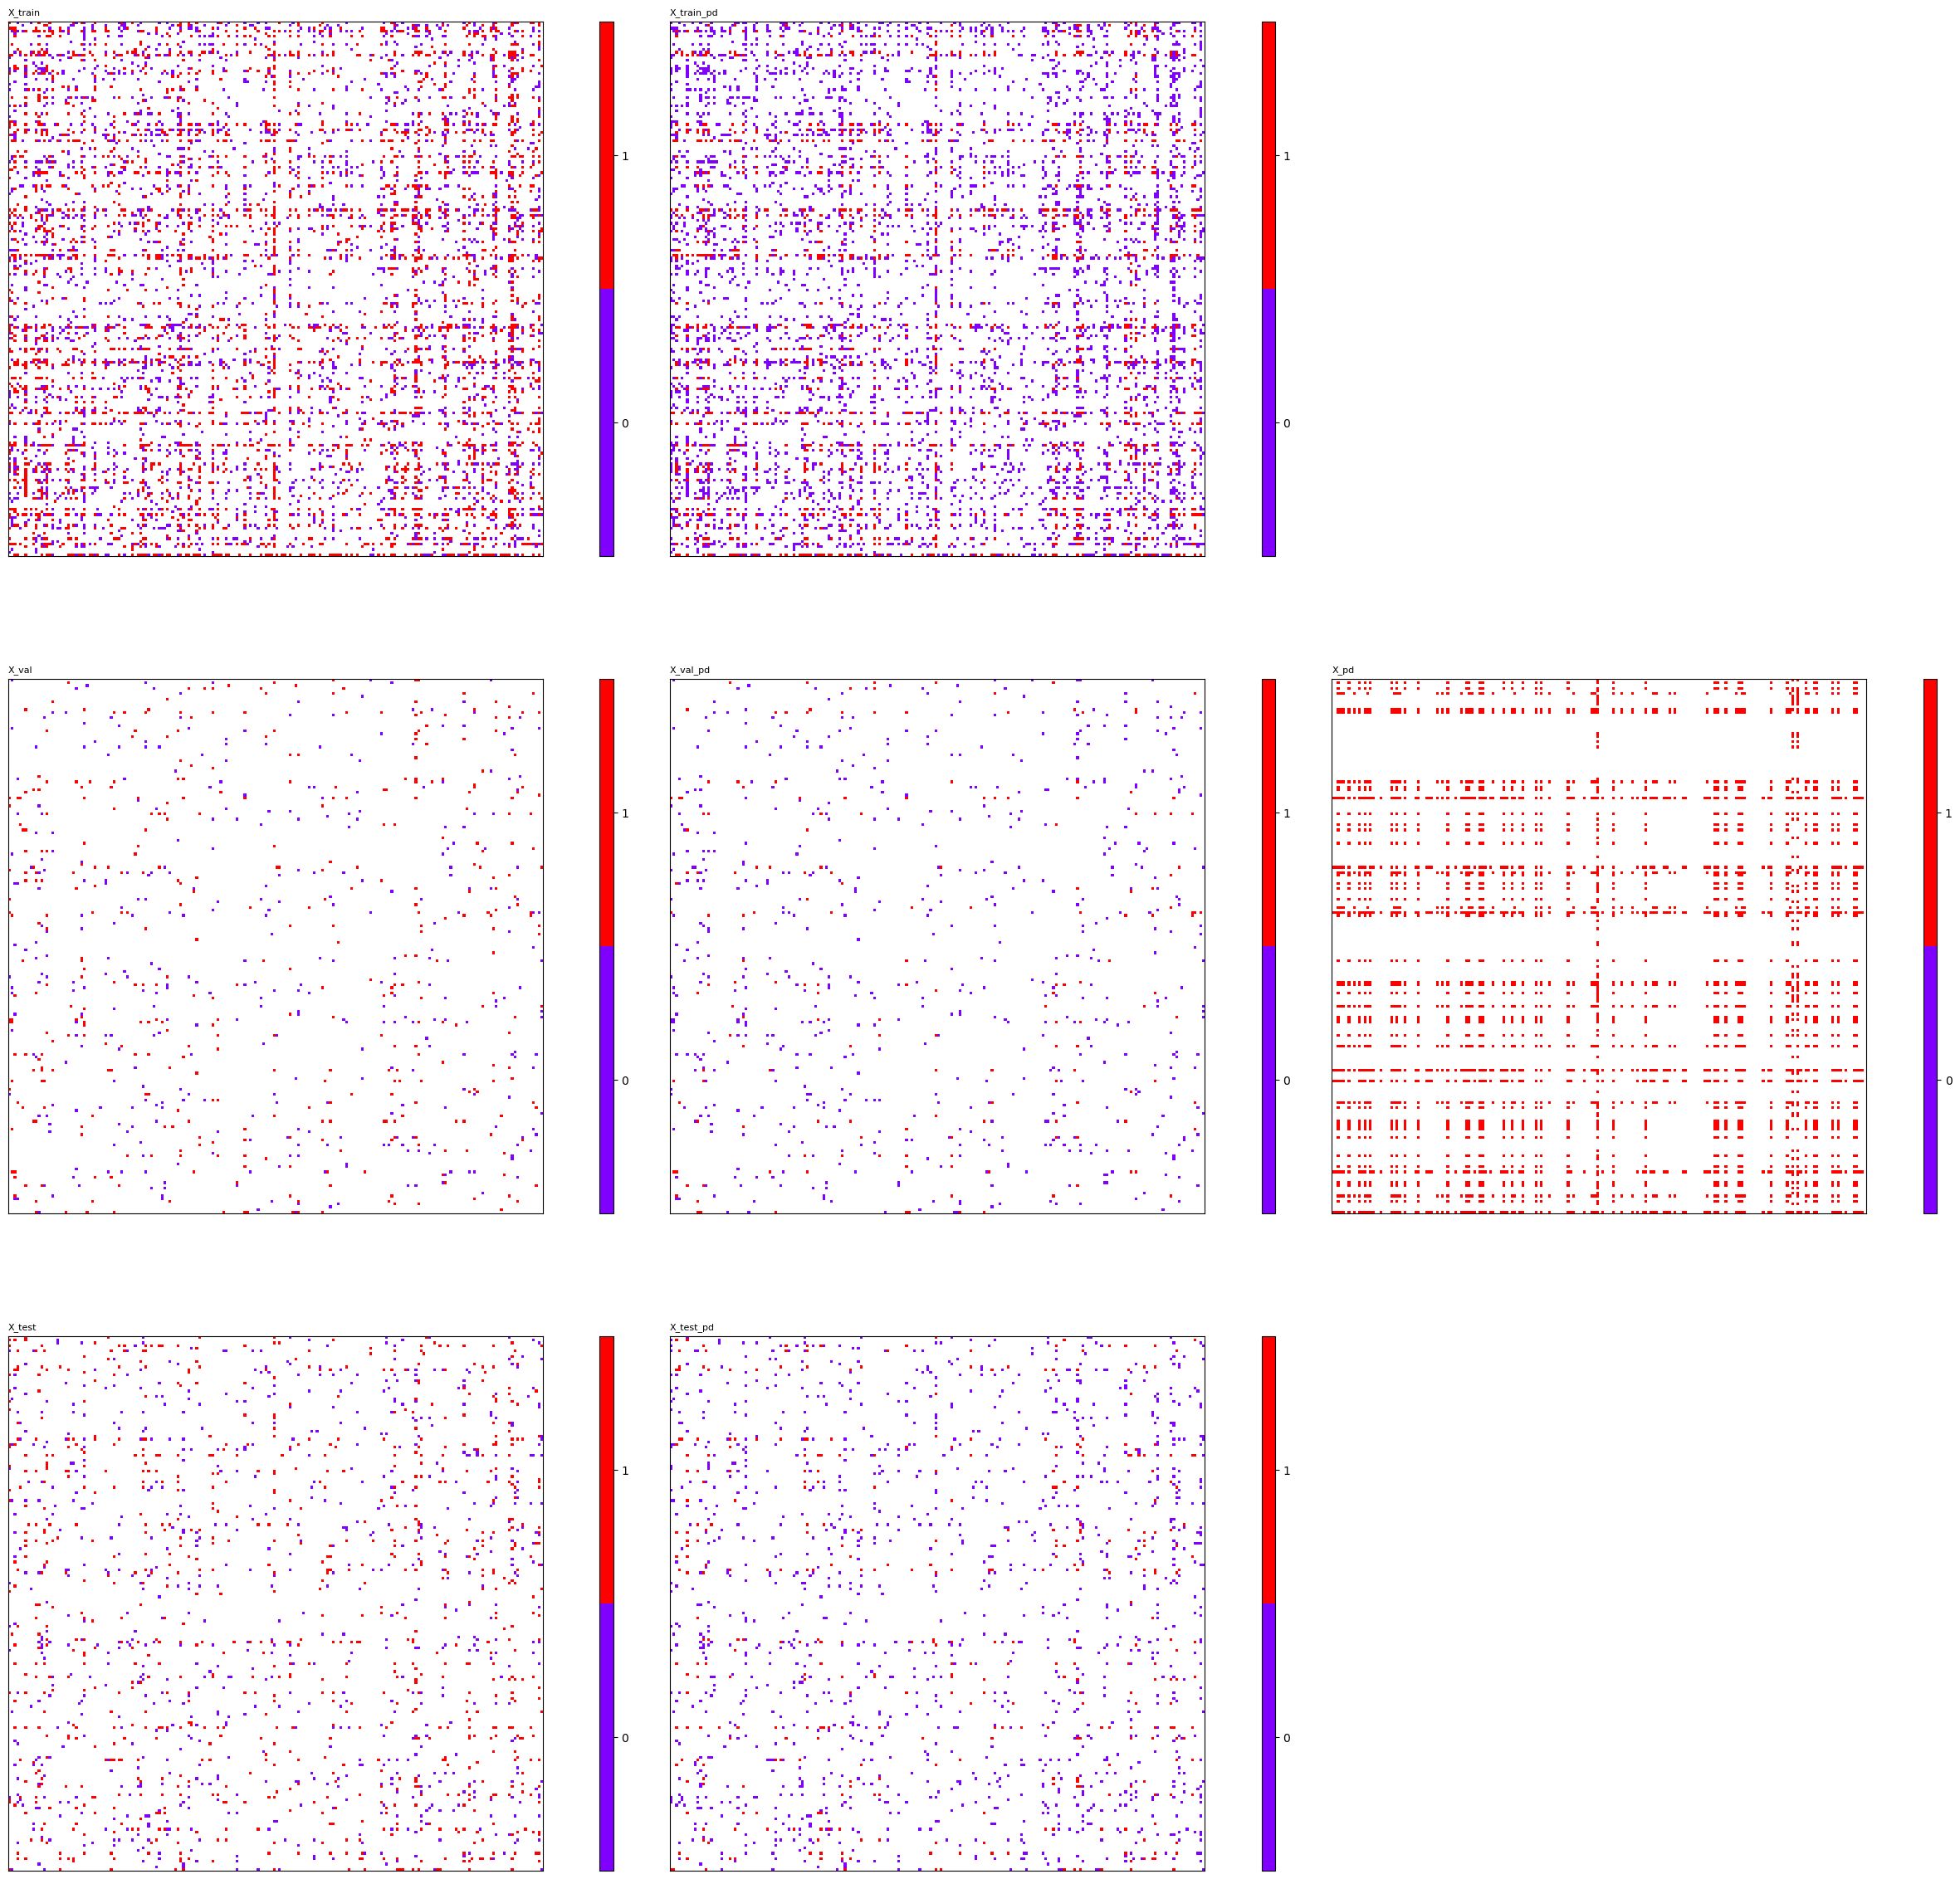

In [69]:
from utils import matmul, fill_nan

U, V = asso.U[:, :4], asso.V[:, :4]
X_pd = matmul(U, V.T, sparse=True, boolean=True)

X_train_pd = fill_nan(X_pd, X_train)
X_val_pd = fill_nan(X_pd, X_val)
X_test_pd = fill_nan(X_pd, X_test)

rng = [200, 200]
settings = [(X_train[:rng[0], :rng[1]],     [0, 0], 'X_train'), 
            (X_train_pd[:rng[0], :rng[1]],  [0, 1], 'X_train_pd'), 
            (X_val[:rng[0], :rng[1]],       [1, 0], 'X_val'), 
            (X_val_pd[:rng[0], :rng[1]],    [1, 1], 'X_val_pd'), 
            (X_test[:rng[0], :rng[1]],      [2, 0], 'X_test'), 
            (X_test_pd[:rng[0], :rng[1]],   [2, 1], 'X_test_pd'), 
            (X_pd[:rng[0], :rng[1]],        [1, 2], 'X_pd'), 
            ]

show_matrix(settings=settings, keep_nan=True, scaling=2, 
            clim=[0, 1], colorbar=True, discrete=True, center=True)

In [24]:
asso.df_validation

time  k  tau  density  X_train_cover  recall_score  \
0 2024-01-26 15:27:57.150927  1  0.3     0.25            0.0           0.0   
1 2024-01-26 15:29:18.126755  1  0.3     0.25            0.0           0.0   

   precision_score  accuracy_score  f1_score  
0              0.0             0.5       0.0  
1              0.0             0.5       0.0

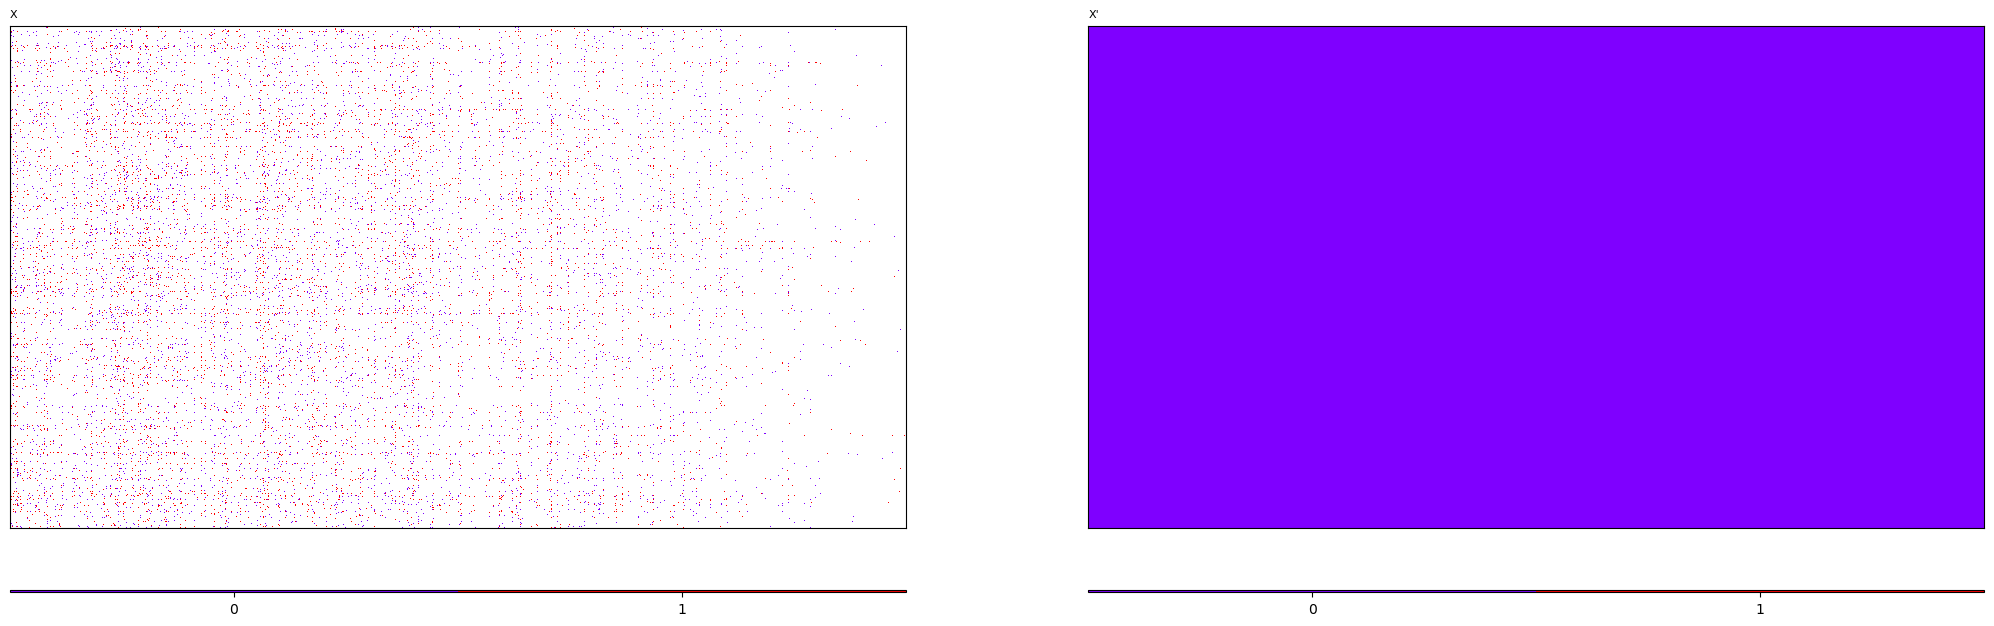

In [27]:
settings = [(X_test, [0, 0], 'X'), 
            (matmul(asso.U, asso.V.T, sparse=False, boolean=True), [0, 1], "X'")]
show_matrix(settings=settings, clim=[0, 1], colorbar=True, discrete=True, center=True)

In [22]:
import numpy as np

len(asso.scores[0])

1682

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


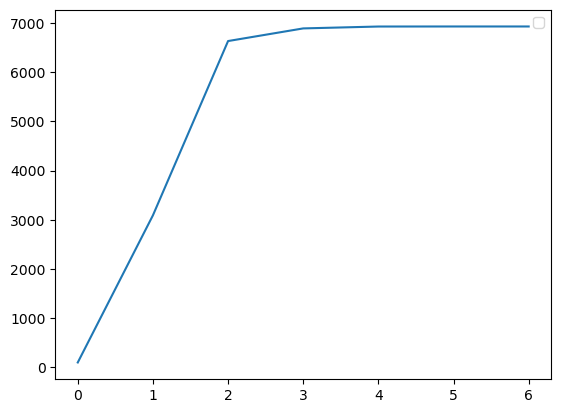

In [23]:
import matplotlib.pyplot as plt

plt.plot(asso.scores[0][10])
plt.legend()

In [26]:
k

0

In [31]:
import matplotlib.pyplot as plt

plt.figure(0, dpi=1200)
for k in range(5):
    # plt.figure(k, dpi=1200)
    plt.plot(asso.scores[k], '.', markersize=1, label=[f"{k+1}_{i}" for i in range(len(asso.scores[k][0]))])
plt.legend()
plt.gca().set_aspect(0.1)